In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
print(os.listdir("../input"))
df= pd.read_csv('../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv',low_memory=False)

['global-commodity-trade-statistics', 'gdp-growth']


Let us have a quick look at this large data set with only first five rows.

1. How diverse are global trade patterns in a wide range of commodities.
2. Determine the major changes and fluctuations in Trade Volume & Value.
3. Discover of potential links between global events and trade flows
4. Eye-catching views of that trade data which made it easier for insights to be clearly communicated.


In [2]:
df.head()

country_or_area  year comm_code  \
0     Afghanistan  2016    010410   
1     Afghanistan  2016    010420   
2     Afghanistan  2008    010210   
3         Albania  2016    010290   
4         Albania  2016    010392   

                                         commodity    flow  trade_usd  \
0                                      Sheep, live  Export       6088   
1                                      Goats, live  Export       3958   
2          Bovine animals, live pure-bred breeding  Import    1026804   
3  Bovine animals, live, except pure-bred breeding  Import    2414533   
4    Swine, live except pure-bred breeding > 50 kg  Import   14265937   

   weight_kg    quantity_name  quantity         category  
0     2339.0  Number of items      51.0  01_live_animals  
1      984.0  Number of items      53.0  01_live_animals  
2      272.0  Number of items    3769.0  01_live_animals  
3  1114023.0  Number of items    6853.0  01_live_animals  
4  9484953.0  Number of items   96040.0  01_live_animals

### Then let's see if there is any null value<sup>[4]</sup></div>

In [3]:
df.shape

(8225871, 10)

In [4]:
df.isnull()

country_or_area   year  comm_code  commodity   flow  trade_usd  \
0                  False  False      False      False  False      False   
1                  False  False      False      False  False      False   
2                  False  False      False      False  False      False   
3                  False  False      False      False  False      False   
4                  False  False      False      False  False      False   
...                  ...    ...        ...        ...    ...        ...   
8225866            False  False      False      False  False      False   
8225867            False  False      False      False  False      False   
8225868            False  False      False      False  False      False   
8225869            False  False      False      False  False      False   
8225870            False  False      False      False  False      False   

         weight_kg  quantity_name  quantity  category  
0            False          False     False     False  
1            False          False     False     False  
2            False          False     False     False  
3            False          False     False     False  
4            False          False     False     False  
...            ...            ...       ...       ...  
8225866       True          False      True     False  
8225867       True          False      True     False  
8225868       True          False      True     False  
8225869       True          False      True     False  
8225870       True          False      True     False  

[8225871 rows x 10 columns]

In [5]:
df.isnull().sum()

country_or_area         0
year                    0
comm_code               0
commodity               0
flow                    0
trade_usd               0
weight_kg          128475
quantity_name           0
quantity           304857
category                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225871 entries, 0 to 8225870
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 627.6+ MB


## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge

## Loading Dataset

In [ ]:
# Load the dataset
trade_data = pd.read_csv('../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv', low_memory=True)


## Dropping Null Rows

In [ ]:
# Drop rows with NaN values
trade_data = trade_data.dropna()


## Downsampling the Dataset because its Very Large****

In [ ]:
# Downsample the dataset
trade_data = trade_data.sample(frac=0.01, random_state=42)

## Checking Data info

In [ ]:
# Check data info
trade_data.info()


## Extracting Relevant Features and Target

In [ ]:
# Extracting relevant features and target
X = trade_data[['commodity', 'weight_kg', 'quantity']]
y = trade_data['trade_usd']


## Encoding categorical variables

In [ ]:
# Encoding categorical variables 
X = pd.get_dummies(X, columns=['commodity'], drop_first=True)

## Check for NaN values in the features after encoding

In [ ]:
# Check for NaN values in the features after encoding
print(X.isnull().sum())


## Ensure no NaN values are present

In [ ]:
# Ensure no NaN values are present
X = X.fillna(0)


## Splitting the data into training and testing sets

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standardizing the features

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Instantiate and fit the Bayesian Ridge Regression model

In [ ]:
# Instantiate and fit the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, y_train)

## Prediction

In [ ]:
# Make predictions
y_pred_train = bayesian_ridge.predict(X_train_scaled)
y_pred_test = bayesian_ridge.predict(X_test_scaled)


In [5]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78761 entries, 7256666 to 491170
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  78761 non-null  object 
 1   year             78761 non-null  int64  
 2   comm_code        78761 non-null  object 
 3   commodity        78761 non-null  object 
 4   flow             78761 non-null  object 
 5   trade_usd        78761 non-null  int64  
 6   weight_kg        78761 non-null  float64
 7   quantity_name    78761 non-null  object 
 8   quantity         78761 non-null  float64
 9   category         78761 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.6+ MB
weight_kg                                                          0
quantity                                                           0
commodity_1,2-dichloropropane and dichlorobutanes                  0
commodity_1-chloro-2,3-epoxypropane(epichlorohy-drin)          

### Well, it seems that we have plenty of records in weight and quantity columns with null values, but we are not going to drop them for now since it will affect some of our analysis and visualizations. Also since there are their records in the trade values, categories and commodities columns it is better to maintain these values to be able to have those results.




### First I would like to <b>rename</b> the column name of the <b>"country_or_area"</b> to <b>"country"</b>, which would facilitate our work, also dropping some items that are not going to help me for a clean and biased analysis.</div>

In [6]:
df.rename(columns = {'country_or_area':'country'}, inplace = True)
df.drop(df[df['category'] == 'all_commodities'].index, inplace = True)
df.drop(df[df['category'] == '99_commodities_not_specified_according_to_kind'].index, inplace = True)
df.drop(df[df['country'] == 'EU-28'].index, inplace = True)



### Also, we want to know the trade values in million dollars units, so we will divide all of the records by million.</div>

In [7]:
df['trade_usd']=(df['trade_usd']/1000000).round(2)
df.head()

country  year comm_code  \
0  Afghanistan  2016    010410   
1  Afghanistan  2016    010420   
2  Afghanistan  2008    010210   
3      Albania  2016    010290   
4      Albania  2016    010392   

                                         commodity    flow  trade_usd  \
0                                      Sheep, live  Export       0.01   
1                                      Goats, live  Export       0.00   
2          Bovine animals, live pure-bred breeding  Import       1.03   
3  Bovine animals, live, except pure-bred breeding  Import       2.41   
4    Swine, live except pure-bred breeding > 50 kg  Import      14.27   

   weight_kg    quantity_name  quantity         category  
0     2339.0  Number of items      51.0  01_live_animals  
1      984.0  Number of items      53.0  01_live_animals  
2      272.0  Number of items    3769.0  01_live_animals  
3  1114023.0  Number of items    6853.0  01_live_animals  
4  9484953.0  Number of items   96040.0  01_live_animals

# (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8139480 entries, 0 to 8209661
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   country        object 
 1   year           int64  
 2   comm_code      object 
 3   commodity      object 
 4   flow           object 
 5   trade_usd      float64
 6   weight_kg      float64
 7   quantity_name  object 
 8   quantity       float64
 9   category       object 
dtypes: float64(3), int64(1), object(6)
memory usage: 683.1+ MB




### We can see that the column "year" is parsed as <code>integer</code>, so we will convert it to <code>datetime</code> format and then verify the description of this dataset</div>

In [9]:
df['year']= pd.to_datetime(df['year'], format='%Y')

In [10]:
df.describe(include='all', datetime_is_numeric=True)

country                           year comm_code  \
count     8139480                        8139480   8139480   
unique        206                            NaN      5037   
top     Australia                            NaN    210690   
freq       307453                            NaN      8016   
mean          NaN  2004-09-29 06:27:20.611537152       NaN   
min           NaN            1988-01-01 00:00:00       NaN   
25%           NaN            1999-01-01 00:00:00       NaN   
50%           NaN            2005-01-01 00:00:00       NaN   
75%           NaN            2011-01-01 00:00:00       NaN   
max           NaN            2016-01-01 00:00:00       NaN   
std           NaN                            NaN       NaN   

                    commodity     flow     trade_usd     weight_kg  \
count                 8139480  8139480  8.139480e+06  8.025617e+06   
unique                   5029        4           NaN           NaN   
top     Food preparations nes   Import           NaN           NaN   
freq                     8016  4806471           NaN           NaN   
mean                      NaN      NaN  1.865444e+01  3.222142e+07   
min                       NaN      NaN  0.000000e+00  0.000000e+00   
25%                       NaN      NaN  1.000000e-02  1.054000e+03   
50%                       NaN      NaN  1.500000e-01  2.577500e+04   
75%                       NaN      NaN  1.760000e+00  4.193760e+05   
max                       NaN      NaN  2.282885e+05  1.860133e+12   
std                       NaN      NaN  4.435331e+02  2.343566e+09   

              quantity_name      quantity                  category  
count               8139480  7.850630e+06                   8139480  
unique                   12           NaN                        96  
top     Weight in kilograms           NaN  55_manmade_staple_fibres  
freq                6557988           NaN                    100000  
mean                    NaN  2.646111e+08                       NaN  
min                     NaN  0.000000e+00                       NaN  
25%                     NaN  1.030000e+03                       NaN  
50%                     NaN  2.600000e+04                       NaN  
75%                     NaN  4.336570e+05                       NaN  
max                     NaN  1.026357e+15                       NaN  
std                     NaN  3.755888e+11                       NaN



This function gives us very interesting information and description about this dataset, such as: 
    <ul><li> The number of countries recorded in this dataset is counted as <b>206 distinct countries</b>.</li> 
    <li> Also, we can see the interval of these records which is between <b>1988 to 2016</b>.</li>
    <li> The top country in all segments appears to be <b>Australia</b>.</li>
    <li> The import records seem to be more applied than exports.</li>
    <li> There are 8,139,480 product categories recorded, and the <b>category code 55</b> which is <em>Man-made staple fibre yarns and woven fabrics</em> are in the highest records of deals. For more information about this category code see <a href="https://www.international.gc.ca/controls-controles/report-rapports/list_liste/handbook-manuel/e-55.aspx?lang=eng">here</a>.</li>
    <li> The mean value<sup>[5]</sup> of trade values is: with the median and standard deviation<sup>[6][7]</sup> of: .</li>
    <li> The mean value of weight and quantities are: and .</li>
    <li> There are 8,139,480 commodity codes recorded, and the <b>commodity code 2106.90</b> which is <em> Food preparations, n.e.s.</em> has the highest frequency. For having more information about this commodity code see <a href="https://www.dripcapital.com/hts-code/21/06/90">here</a>.</li>
    </ul>

We will dive deeper into other items later in other sections.</div>

<br>

***

<br>

# which countries are in the top ranking of the trading world?
## Countries rank in all trading flows


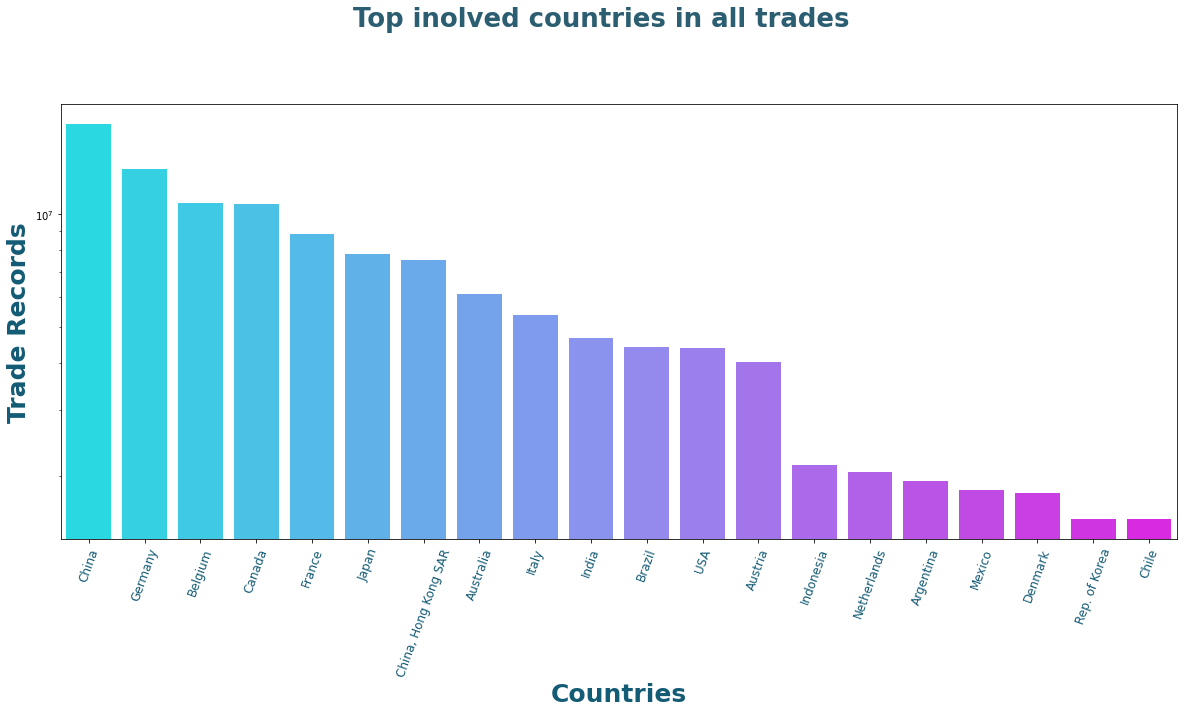

In [16]:
ct=df.groupby('country', as_index=False).sum()
cts=ct.sort_values(by='trade_usd', ascending=False).head(20)

plt.subplots(figsize=(20, 8))
sns.barplot(data=cts, x='country', y='trade_usd', palette='cool')
plt.xticks(rotation=70, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yticks([])
plt.yscale('log')

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records',
          fontsize=25,
           fontfamily='DejaVu Sans',
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top inolved countries in all trades",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

### *Alright, we need to interpret this graph. As we can see the top 20 countries in all trading segments including import, export, re-import<sup>[9]</sup>, and re-export<sup>[10]</sup>, and during all time available in this dataset are listed in this figure and indicates that China is in the first place following by Germany, Belgium and Canada and others.<br>*

## When we had the most trading flows?

In [17]:
cty=df.groupby('year', as_index=False).sum()
ctys=cty.sort_values(by='trade_usd', ascending=False)

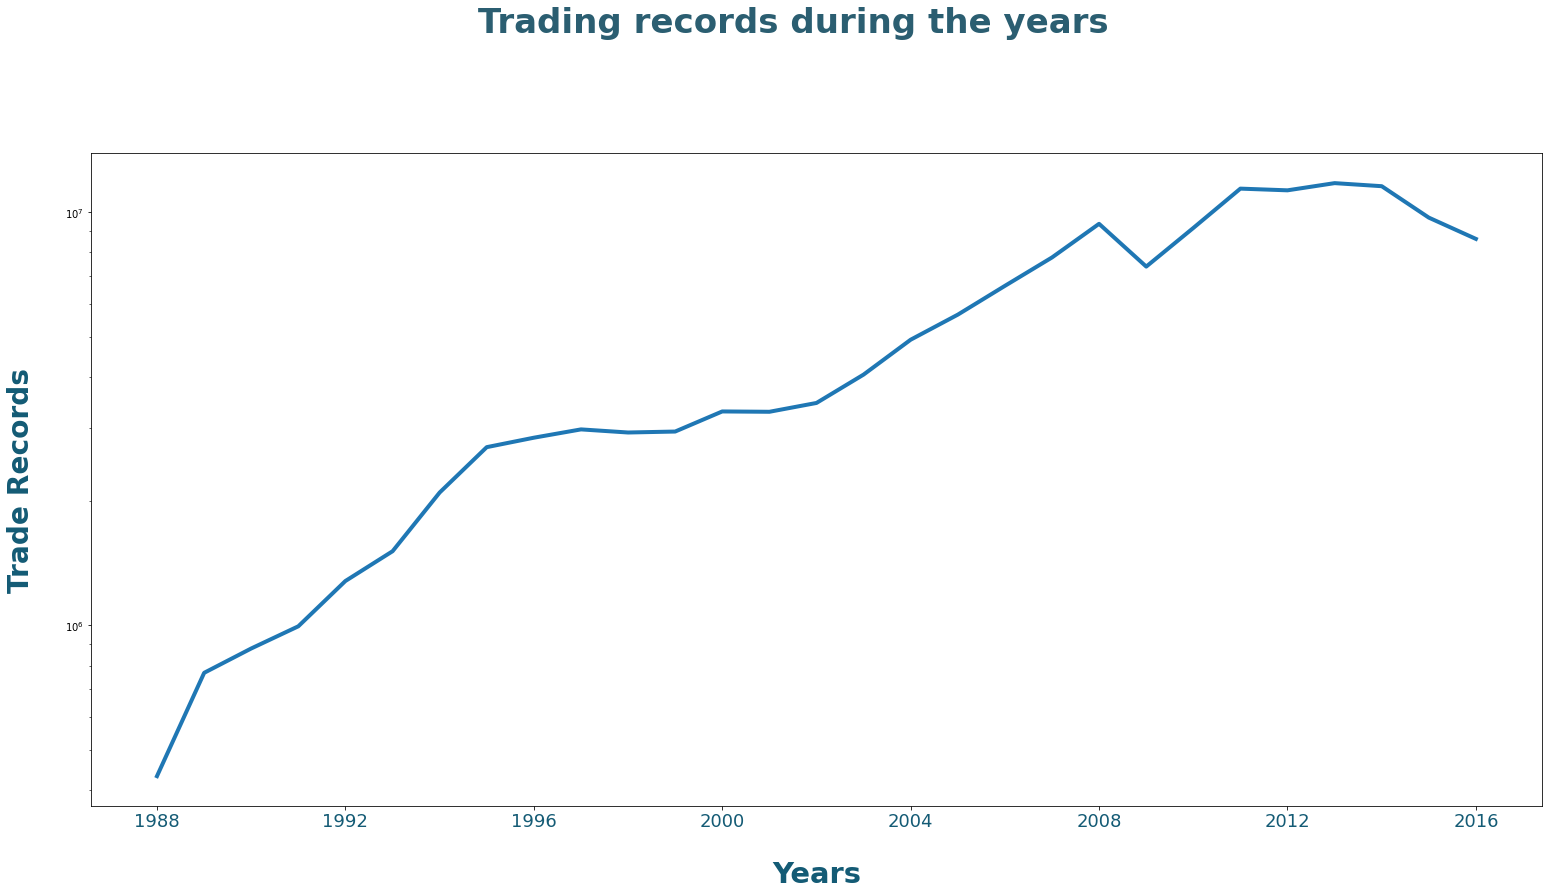

In [18]:
plt.subplots(figsize=(26, 12))
sns.lineplot(data=ctys, x='year', y='trade_usd',linewidth=4)
plt.xticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=18)
plt.yticks([])
plt.yscale('log')

plt.xlabel('Years', 
           fontsize=29,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=28,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Trading records during the years",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.05,
    color='#2B5E71')
#plt.grid(axis='y', color = 'gray', linestyle = '--', linewidth = 0.5, alpha=0.5)
plt.show()


## *This is telling us a very interesting and important information in such that it is showing us that we apparently are in a down trend with the trade values.*
## *It is interesting because after increasing the value of almost all the goods in the global trading market this down trend is something interesting that shold be investigated further.*

# *Matching our analysis with the world population data*</div>

    
## *look at this trend, it shows the population growth. This visualization here shows the annual global population increase from 1950 to today and the projection until the end of this century.*

<br>

<img src="https://i.ibb.co/NKwV8H5/population-growth-the-annual-change-of-the-population-2.png" alt="population-growth-the-annual-change-of-the-population-2" border="0" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;; max-width: 60%; width:100%; vertical-align: middle;horizontal-align: middle;height: auto;">    
<br>

## *The absolute increase of the population per year peaked in the late 1980s at over 90 million additional people each year. But it stayed high until recently. From now on the UN expects the annual increase to decline by around 1 million every year.*

## Global trades are mostly in which flow?

    
*One of the most important elements of understanding the economic trend for a country or for the entire planet is knowing that most of the trades have been done in importation or exportation.*

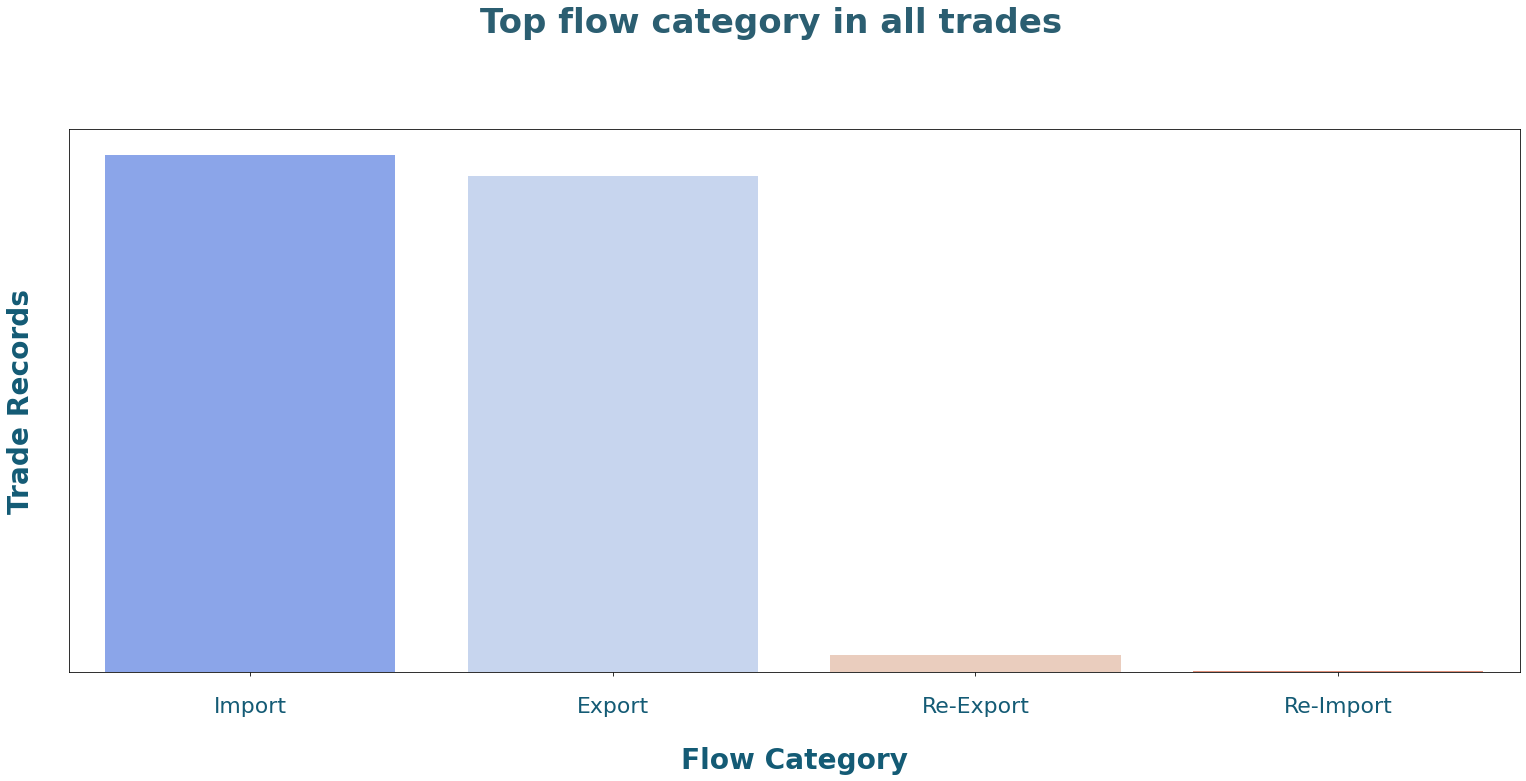

In [19]:
plt.subplots(figsize=(26, 10))
fl=df.groupby('flow', as_index=False).sum()
fls=fl.sort_values(by='trade_usd', ascending=False)
sns.barplot(data=fls, x='flow', y='trade_usd', palette='coolwarm')

plt.xticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=22, y=-0.03)
plt.yticks([])

plt.xlabel('Flow Category', 
           fontsize=28,
          fontweight='bold',
          color='#145B75',
          fontfamily='DejaVu Sans',
          labelpad=30)
plt.ylabel('Trade Records',
          fontsize=28,
           fontfamily='DejaVu Sans',
          fontweight='bold',
          color='#145B75',
          labelpad=30)

plt.suptitle(
    "Top flow category in all trades",
    fontsize=34,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

## *We can see that importation has an slight advantage over exportation. We also can see that how much is the difference between their values:*


<table style="border: 0.1px solid gray; display:table; text-align:center; width:100%; font-family:Optima; overflow: auto; table-layout: fixed; text-align:center">
    <caption style="background-color:#166E92; font-size:25px; color:white; text-align:center">Flow differences in values</caption>
        <thead style="color:white; font-size:18px; text-align:center">
            <tr>
                <th style="text-align:center;background-color:#158EB1">Flow Category</th>
                <th style="text-align:center;background-color:#158EB1">Trade Value (million USD)</th>
            </tr>
        </thead>
        <tbody style="font-size:15px; color:#115C72; text-align:center">
            <tr>
                <th style="text-align:center">Import</th>
                <td style="text-align:center">388, 178, 187. 48</td>
            </tr>
            <tr>
                <th style="text-align:center">Export</th>
                <td style="text-align:center"> 377, 433, 145. 00</td>
            </tr>
        </tbody>
</table>


<br>

<center style="font-size:25px">$(388,178,187.48 \times 10^6) - (377,433,145.0 \times 10^6)$</center><br>
<center style="font-size:26px">$= 10,745,042.48 \times 10^6$</center>
    
<br>

## *Which is almost <b>10 trillion dollars</b>, and <em>considering the 28 years of trading records</em>, this number can be considered as an slight difference between the two major categories. We also can show the equation with a simple line of code as below:*

In [20]:
fls.iloc[0,1]-fls.iloc[1,1]

3135303.3900000006

# Which are the top <b>categories</b> in all trading segments?</div>

## *Now we want to know which product categories are in the highest trade records. We will analyze both segments of import and export to see the categories and then commodities in the next chapter.*
## *But first, we might need to understand what is the category in the trading world. The economical term for categories is being used by the name of HS Codes.*
</div>

<br>
<br>

## Harmonized System</div>

<div style="width:100%;font-family: Optima; font-size: 20px; font-weight: 400; line-height: 1.5; text-align: justify;"><em>From <a href="https://www.wikipedia.org">Wikipedia</a> encyclopedia</em></div>

<br>

<div style="width:100%;font-family: Optima; font-size: 20px; font-weight: 400; line-height: 1.5; text-align: justify;"><blockquote>The Harmonized Commodity Description and Coding System, also known as the Harmonized System <b>(HS)</b> of <b>tariff nomenclature</b> is an internationally standardized system of names and numbers to classify traded products. It came into effect in 1988 and has since been developed and maintained by the <b>World Customs Organization (WCO)</b> (formerly the Customs Co-operation Council), an independent intergovernmental organization based in Brussels, Belgium, with over 200 member countries.</blockquote></div>
    
<br>

## *Now we will discover which HS Codes are in the top tier trading levels in all segments. For achieving this goal I created a new segment named <b>Overall Trades</b> which contains all the trading segments, including import, export, re-import and re-export.*

<br>
<br>

# Overall Trades</div>

## Product Categories in <b>overall trades</b>, ordered by <b>trade values</b></div>

<br>
<br>
<br>

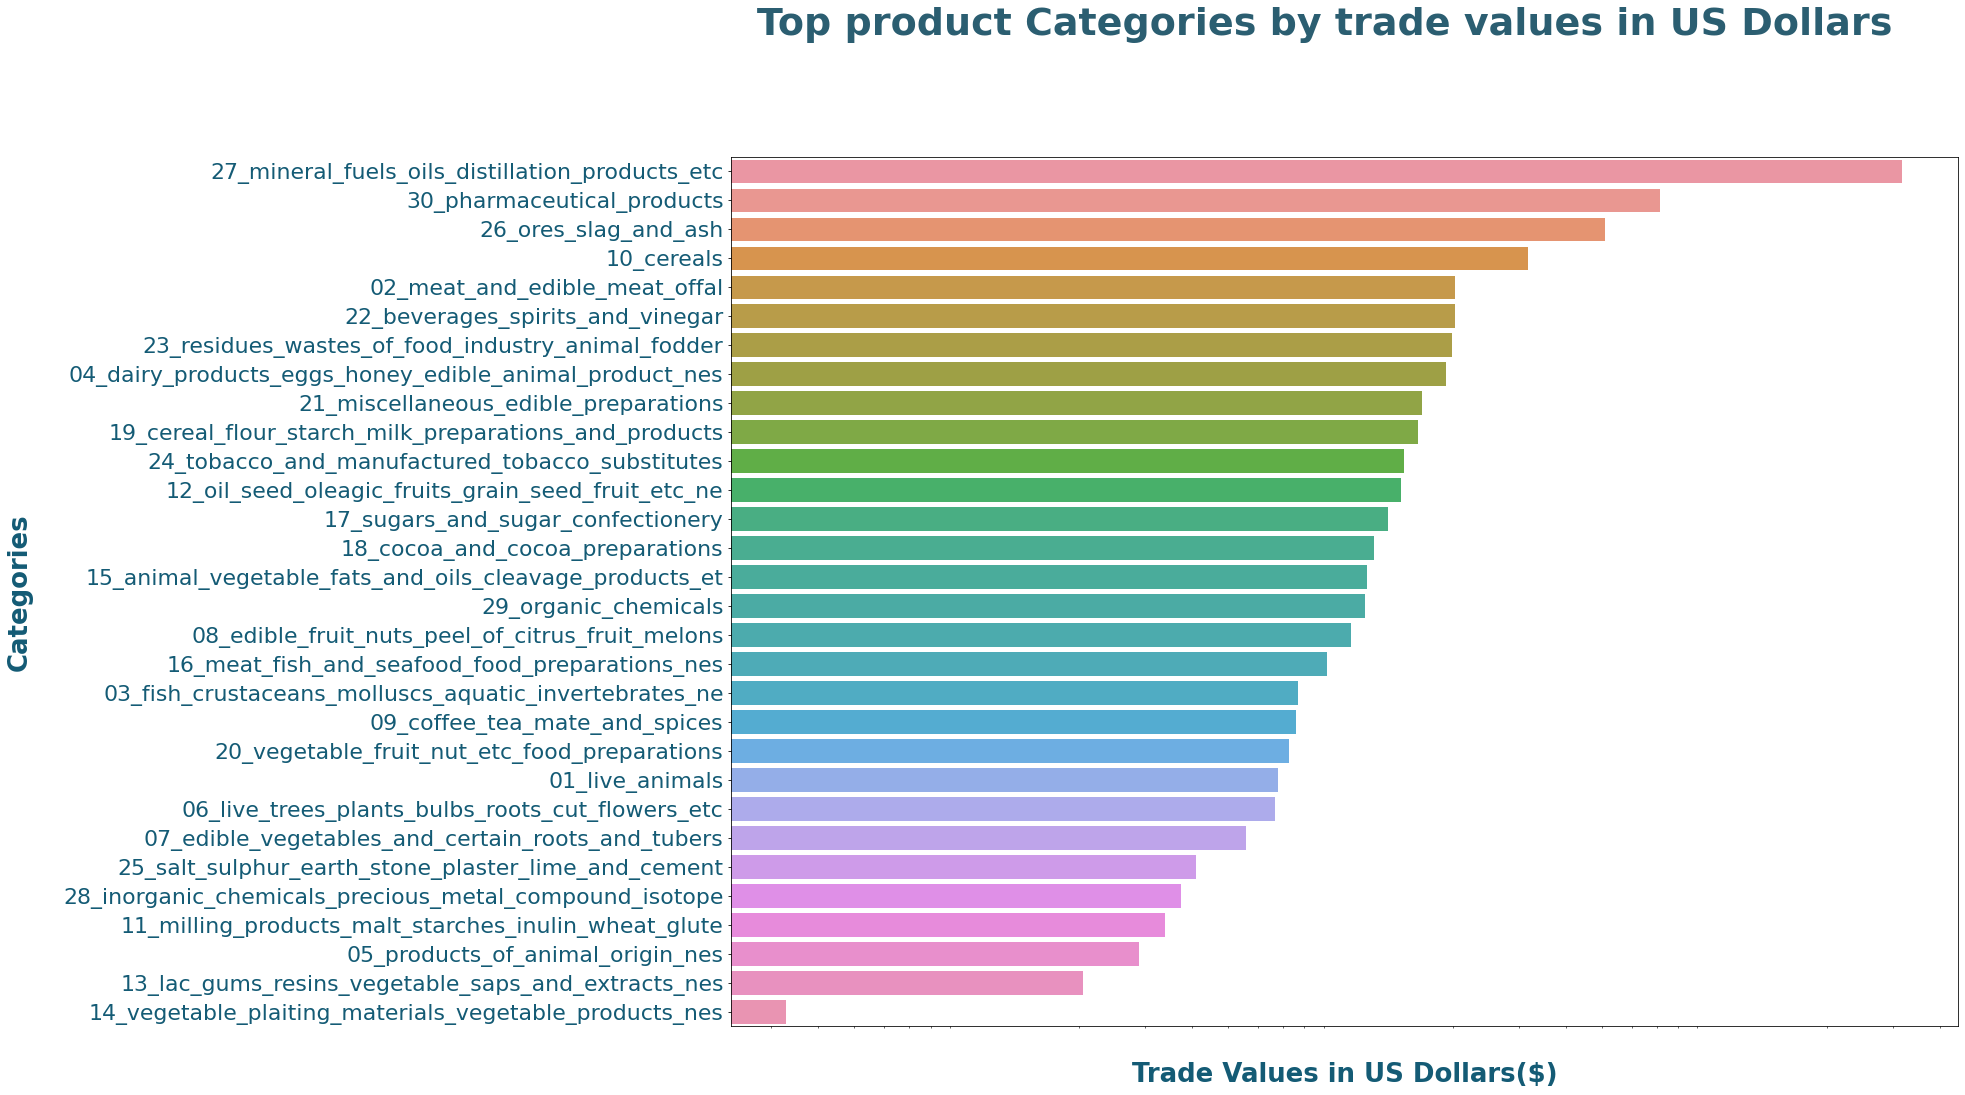

In [21]:
ctg=df.groupby('category', as_index=False).sum().head(30)
ctgv=ctg.sort_values(by='trade_usd', ascending=False)
ctgw=ctg.sort_values(by='weight_kg', ascending=False)
ctgq=ctg.sort_values(by='quantity', ascending=False)

plt.subplots(figsize=(22,16))
sns.barplot(data=ctgv, x='trade_usd', y='category')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=22)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top product Categories by trade values in US Dollars",
    fontsize=38,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## *We can see the top 30 products ordered by trade values in US Dollars, with the top three of HS parent codes of:*
<ul><li><b>27:</b> Mineral fuels, Mineral oils and products of their distillation. See the sub-products <a href= "https://www.datamyne.com/hts/27">here</a></li>
<li><b>30:</b> Pharmaceutical products. See the sub-products <a href="https://www.datamyne.com/hts/30">here</a></li>
<li><b>26</b> Ores, Slag and Ash. See the sub-products <a href="https://www.datamyne.com/hts/26">here</a></li></ul>

<br>

Now we let's see the ranks in order to weight and quantities as well.</div>

# Product Categories in overall trades, ordered by their weights

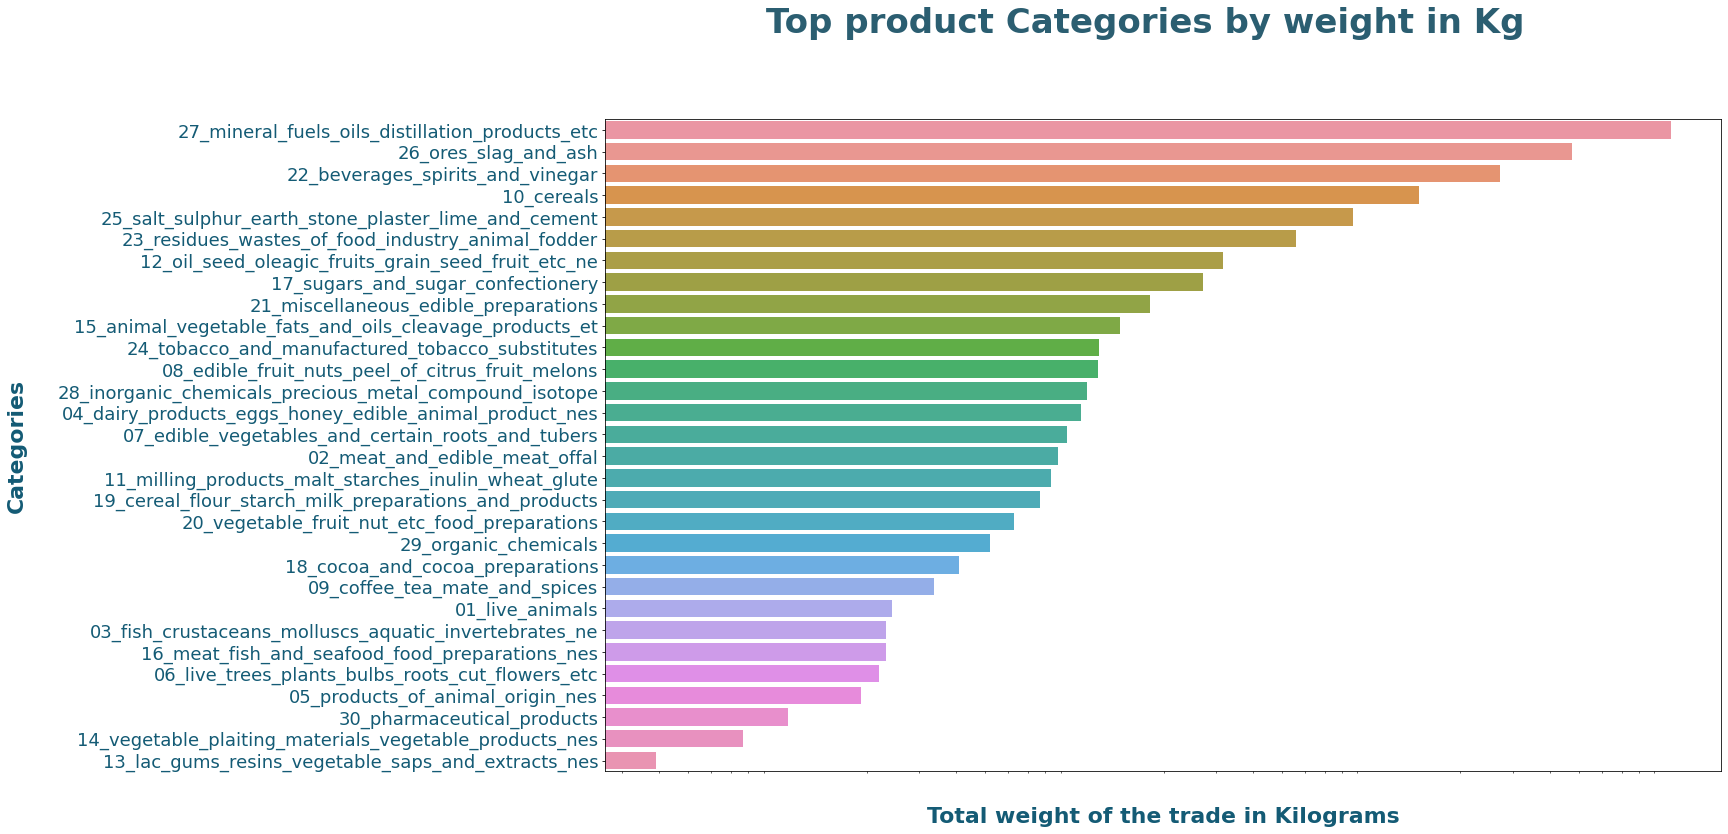

In [22]:
plt.subplots(figsize=(20,12))
sns.barplot(data=ctgw, x='weight_kg', y='category')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=18)
plt.xticks([])

plt.xlabel('Total weight of the trade in Kilograms', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top product Categories by weight in Kg",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

# Product Categories in overall trades, ordered by their quantities</div>


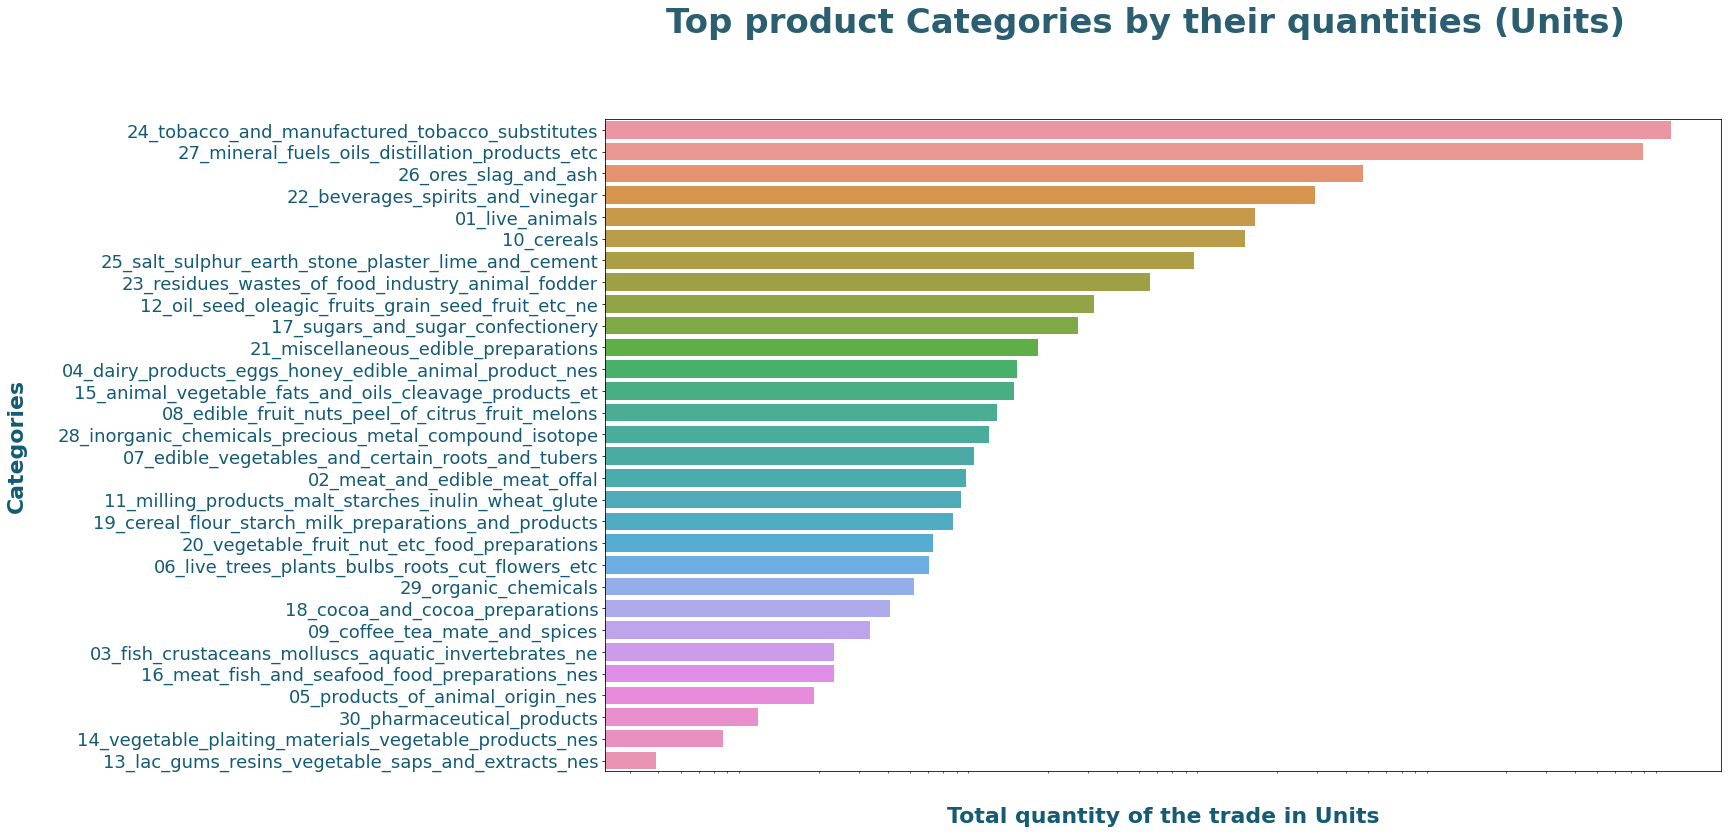

In [25]:
plt.subplots(figsize=(20,12))
sns.barplot(data=ctgq, x='quantity', y='category')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=18)
plt.xticks([])

plt.xlabel('Total quantity of the trade in Units', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top product Categories by their quantities (Units)",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## *As we can see the way we express our data the results will be different. for instance someone could say the top traded products are tobacco and cigarettes, well it's not wrong, it's just not defined in which scale this information is being presented.*

# Export</div>

## Product Categories in <b>exportation</b>, ordered by <b>trade values</b></div>


### *One of the most important indicators of the economic power of a commodity is the amount of exportation on the trade value scale. Here we will investigate this subject but for more informative answers which might help some commercial professionals and economists, we will present the information in weight and quantity scales as well.*

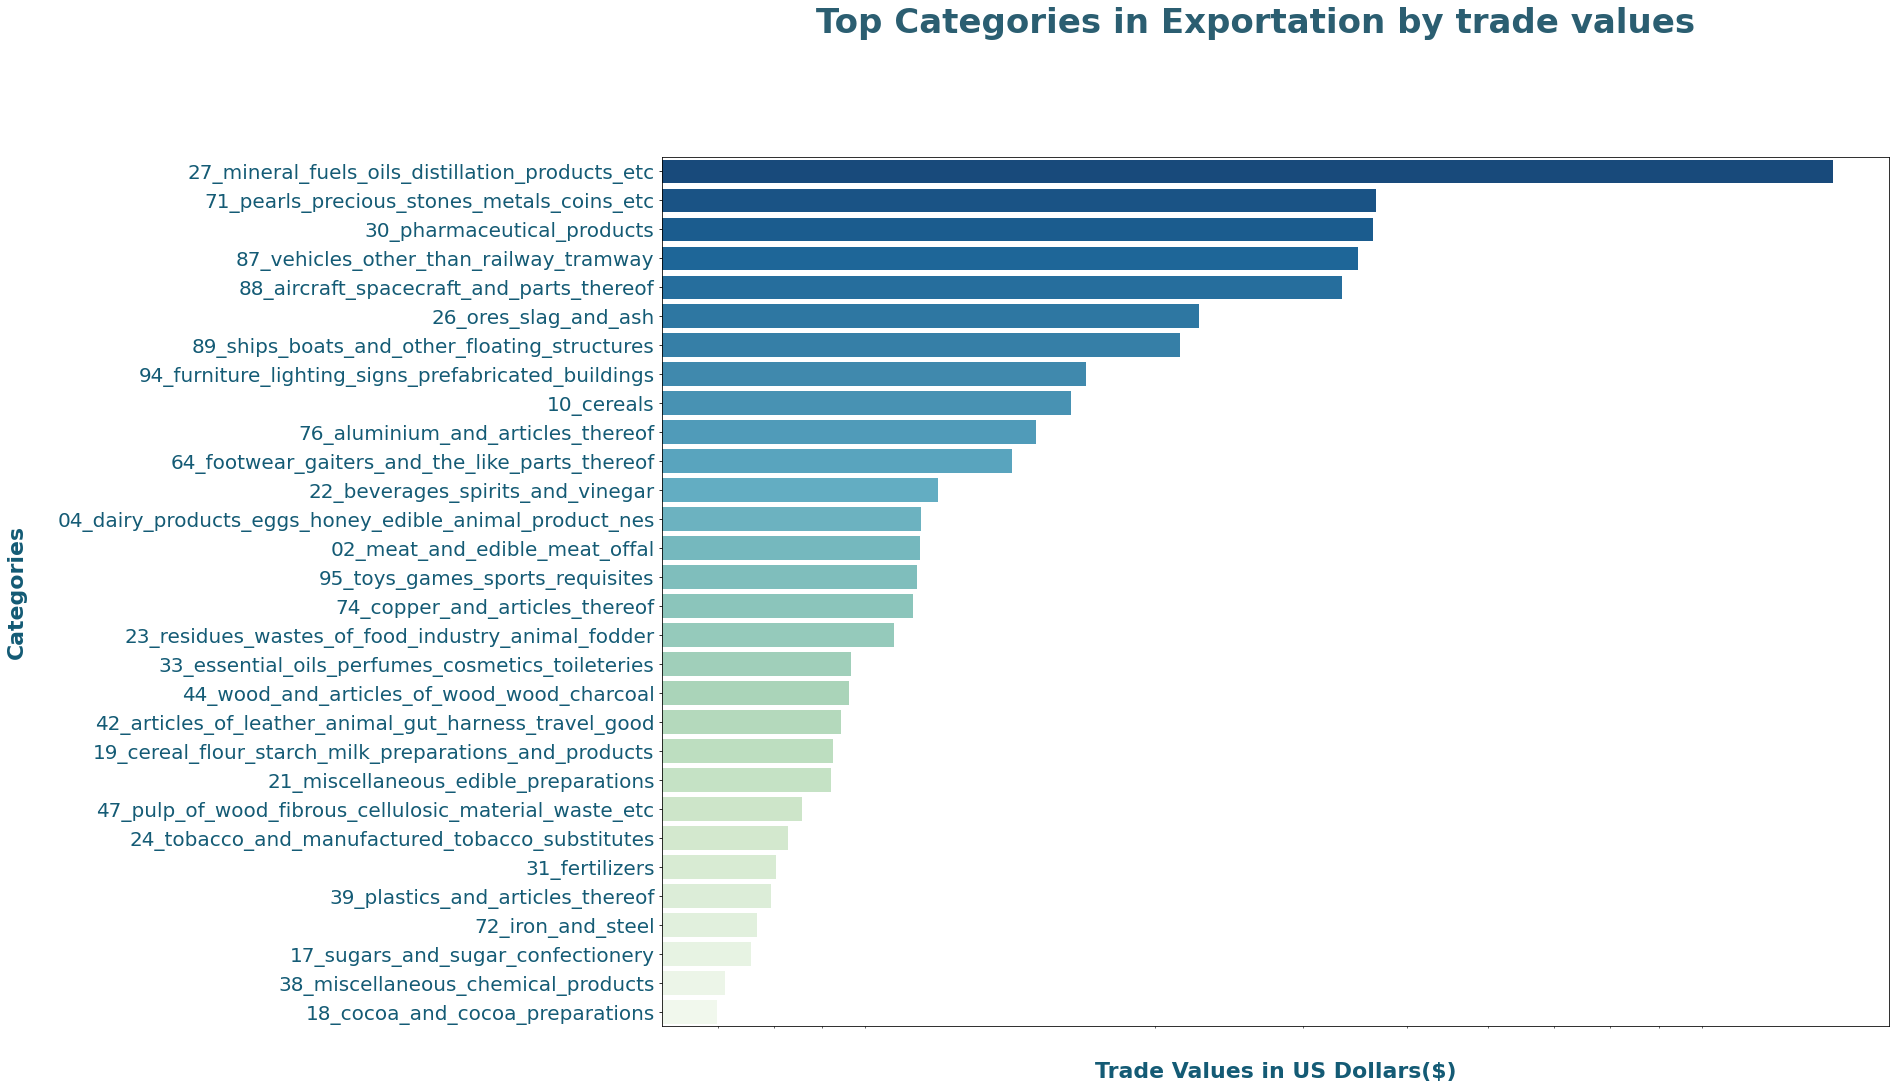

In [26]:
ctf=df.groupby(['category','flow'], as_index=False).sum()
ctf_ex=ctf[(ctf['flow']=='Export')]

ctf_exs=ctf_ex.sort_values(by='trade_usd', ascending=False).head(30)
ctfq_exs=ctf_ex.sort_values(by='quantity', ascending=False).head(30)
ctfw_exs=ctf_ex.sort_values(by='weight_kg', ascending=False).head(30)

ctf_im=ctf[(ctf['flow']=='Import')]
ctf_ims=ctf_im.sort_values(by='trade_usd', ascending=False).head(30)
ctfq_ims=ctf_im.sort_values(by='quantity', ascending=False).head(30)
ctfw_ims=ctf_im.sort_values(by='weight_kg', ascending=False).head(30)

plt.subplots(figsize=(22,16))
sns.barplot(data=ctf_exs, x='trade_usd', y='category', palette='GnBu_r')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Exportation by trade values",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## Product Categories in <b>exportations</b>, ordered by <b>quantities</b></div>


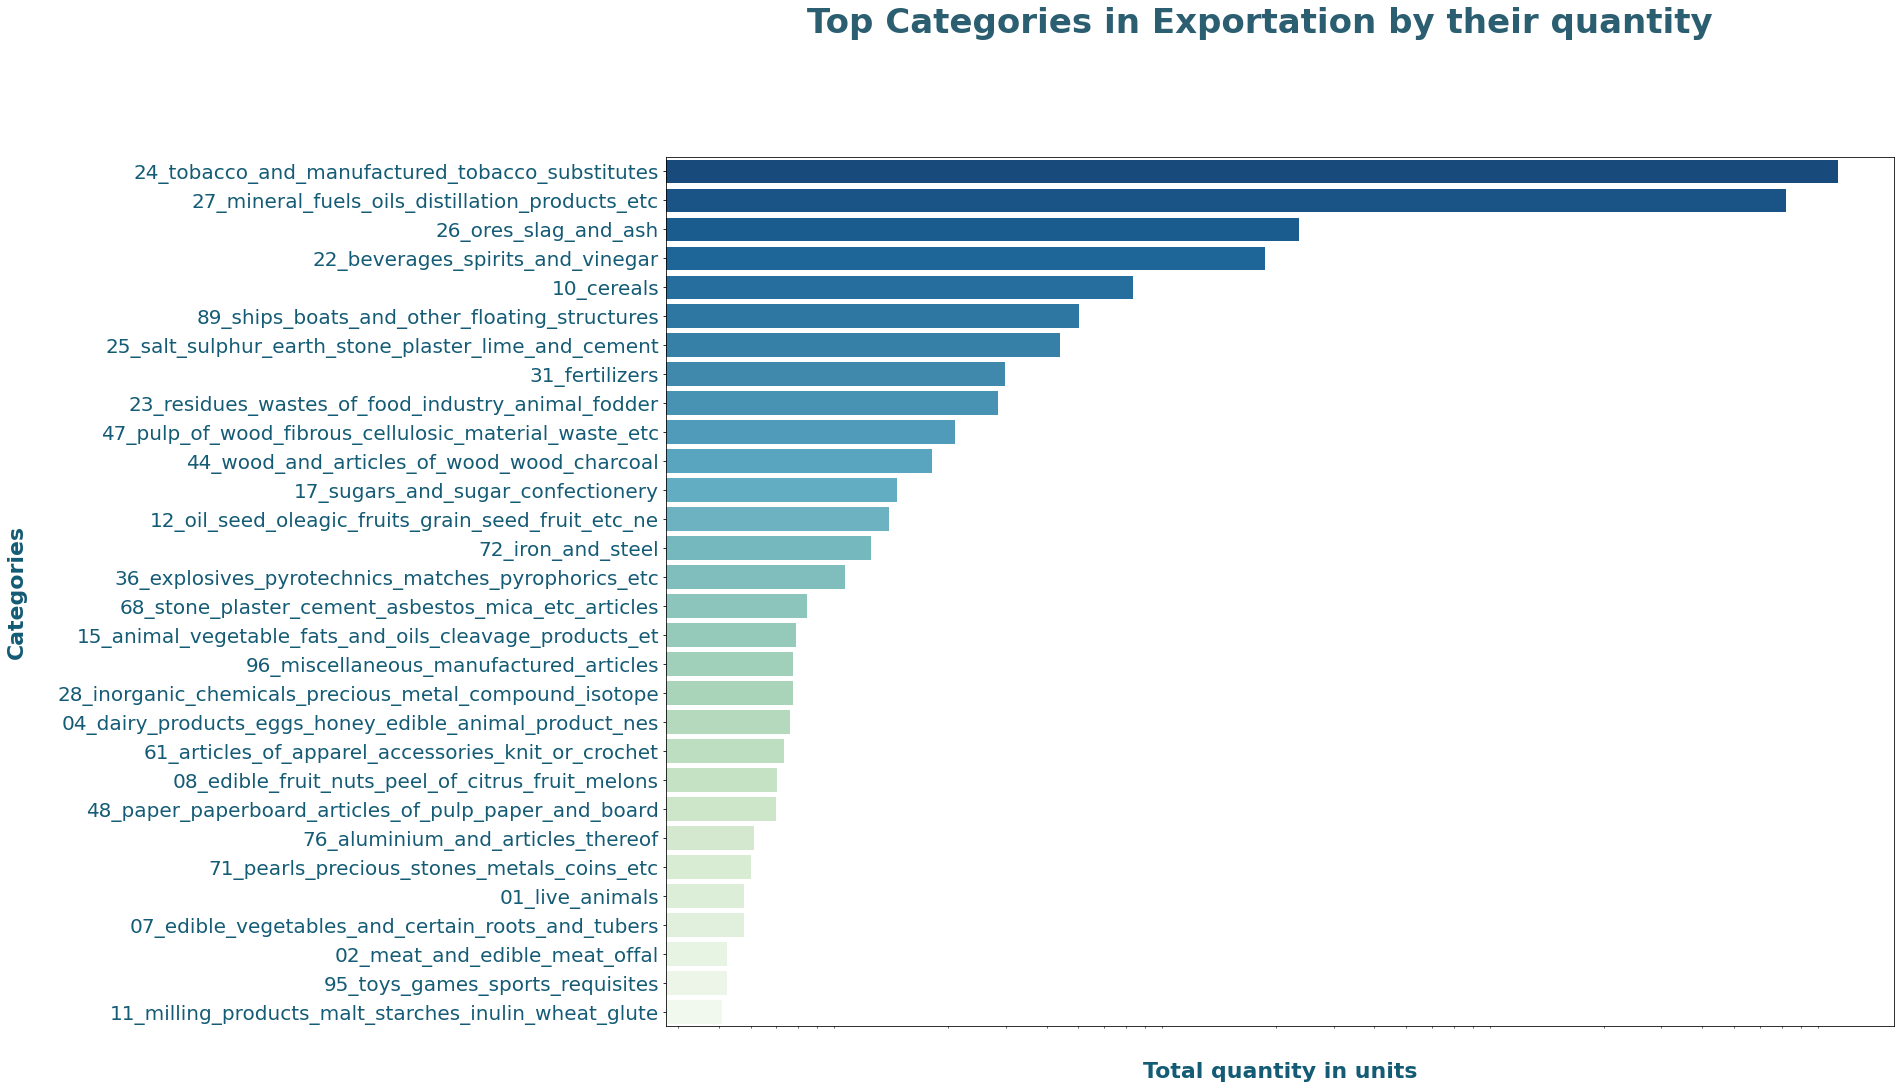

In [27]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctfq_exs, x='quantity', y='category', palette='GnBu_r')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Total quantity in units', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Exportation by their quantity",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## Product Categories in <b>exportations</b>, ordered by <b>weight</b></div>

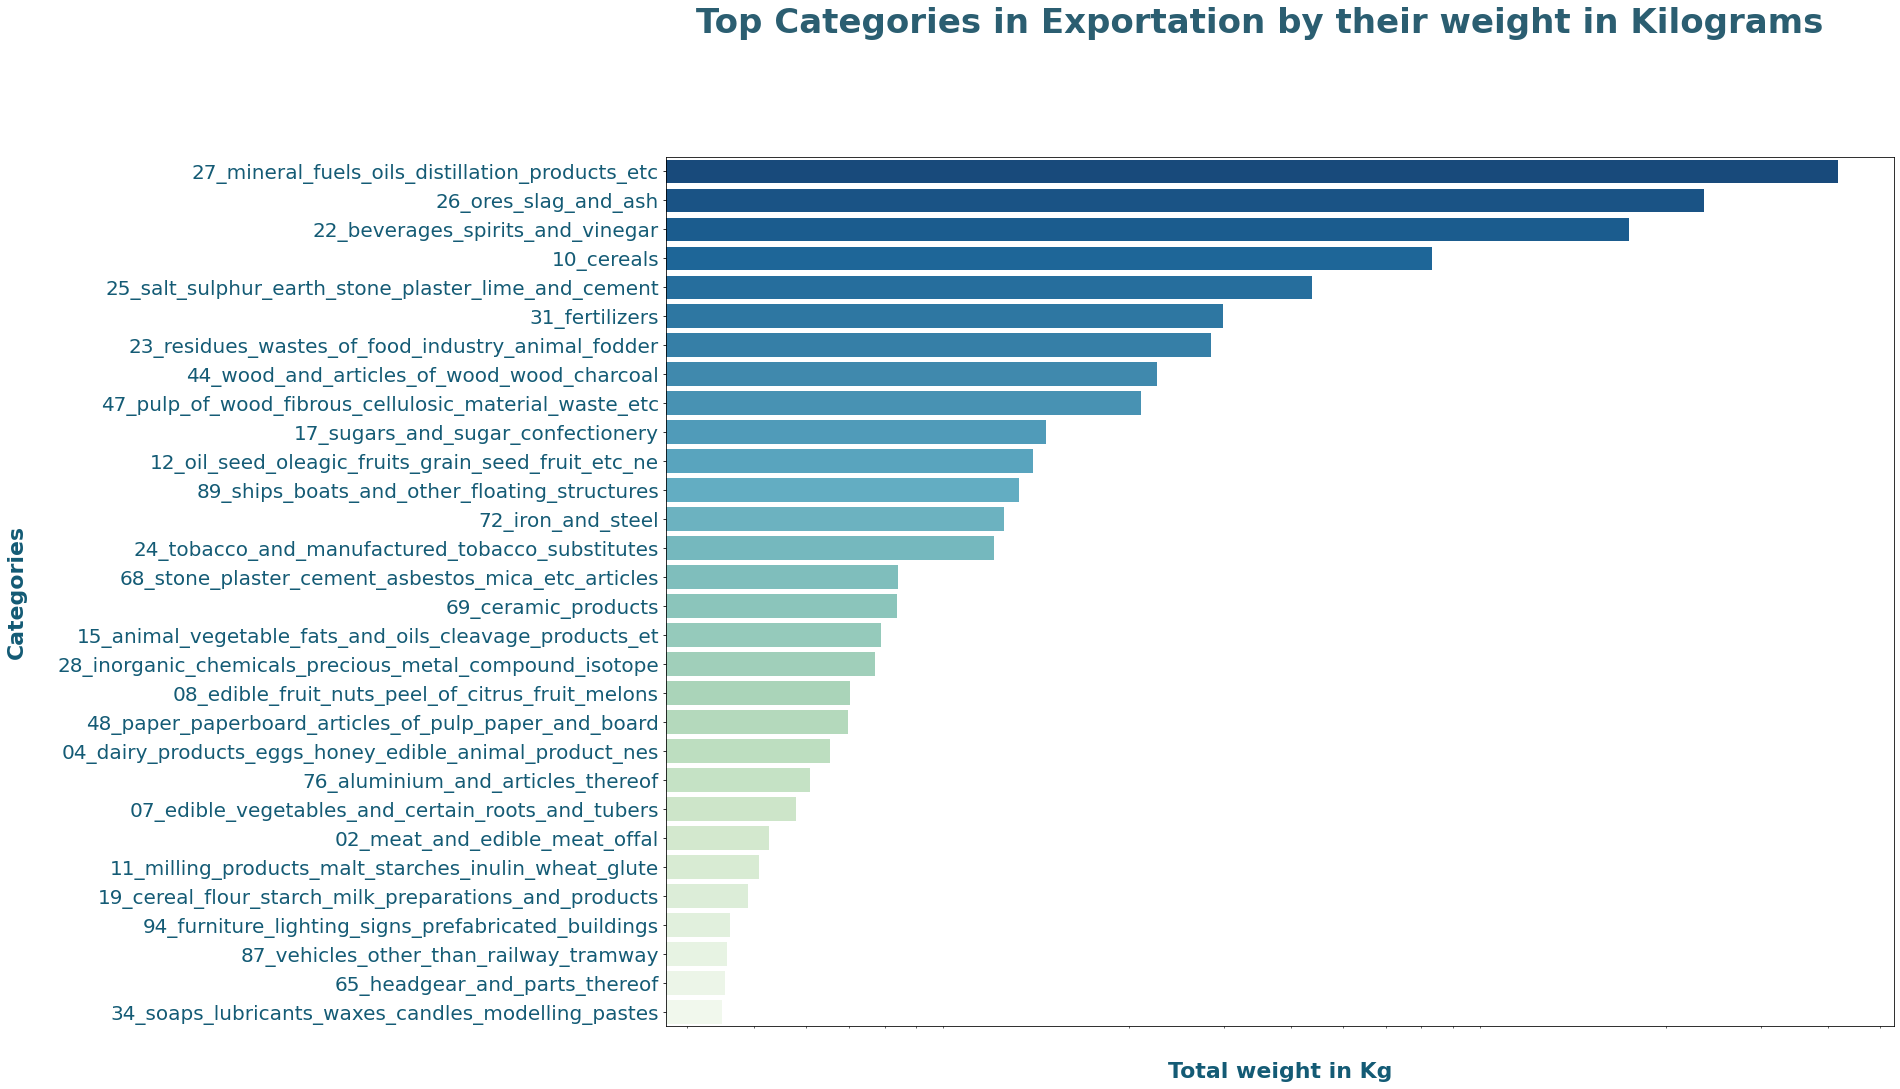

In [28]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctfw_exs, x='weight_kg', y='category', palette='GnBu_r')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Total weight in Kg', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Exportation by their weight in Kilograms",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

### *Now we have a piece of useful information about the trading categories' ranking, and we can see that almost the same changing pattern for overall trading is repeating here too.*
Now let's see the same process for the importation segment.</div>

# Imports</div>

## Product Categories in <b>importations</b>, ordered by <b>trade values</b></div>

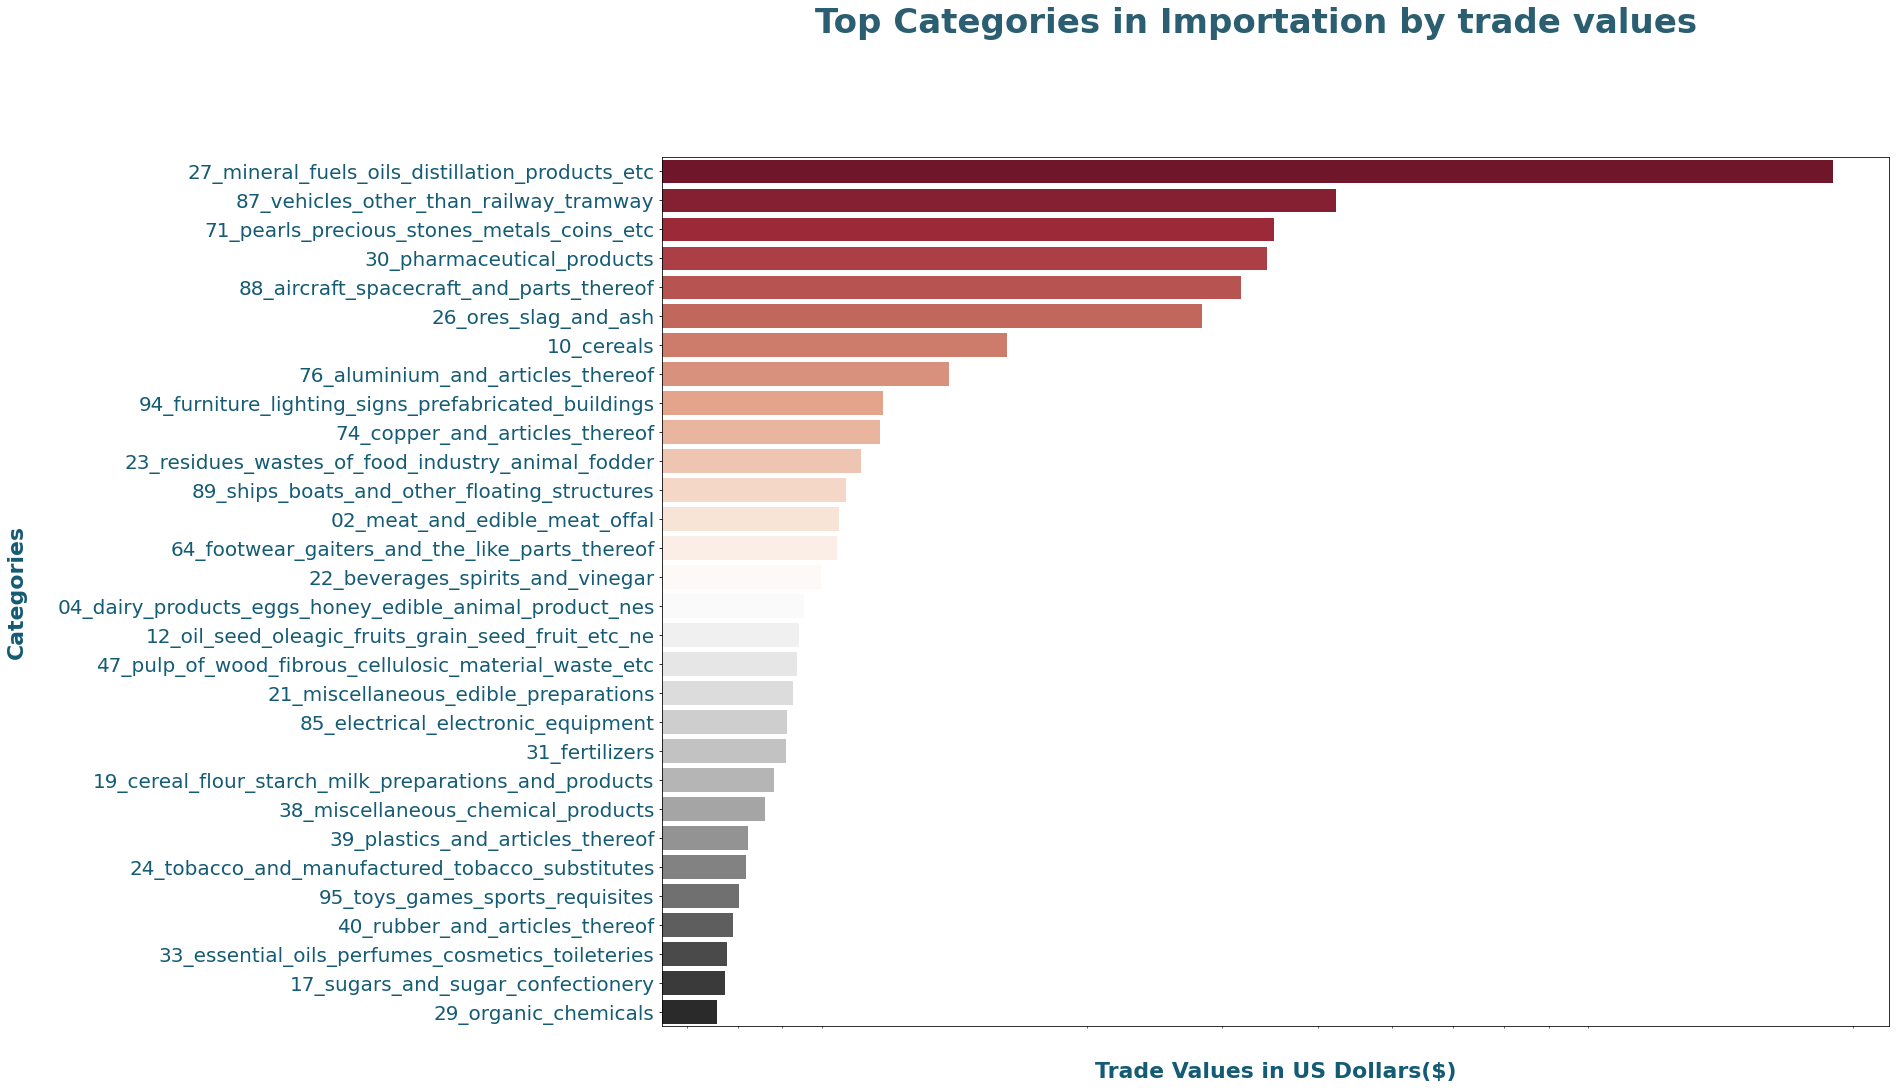

In [29]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctf_ims, x='trade_usd', y='category', palette='RdGy')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Importation by trade values",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## Product Categories in <b>importations</b>, ordered by <b>weight</b></div>

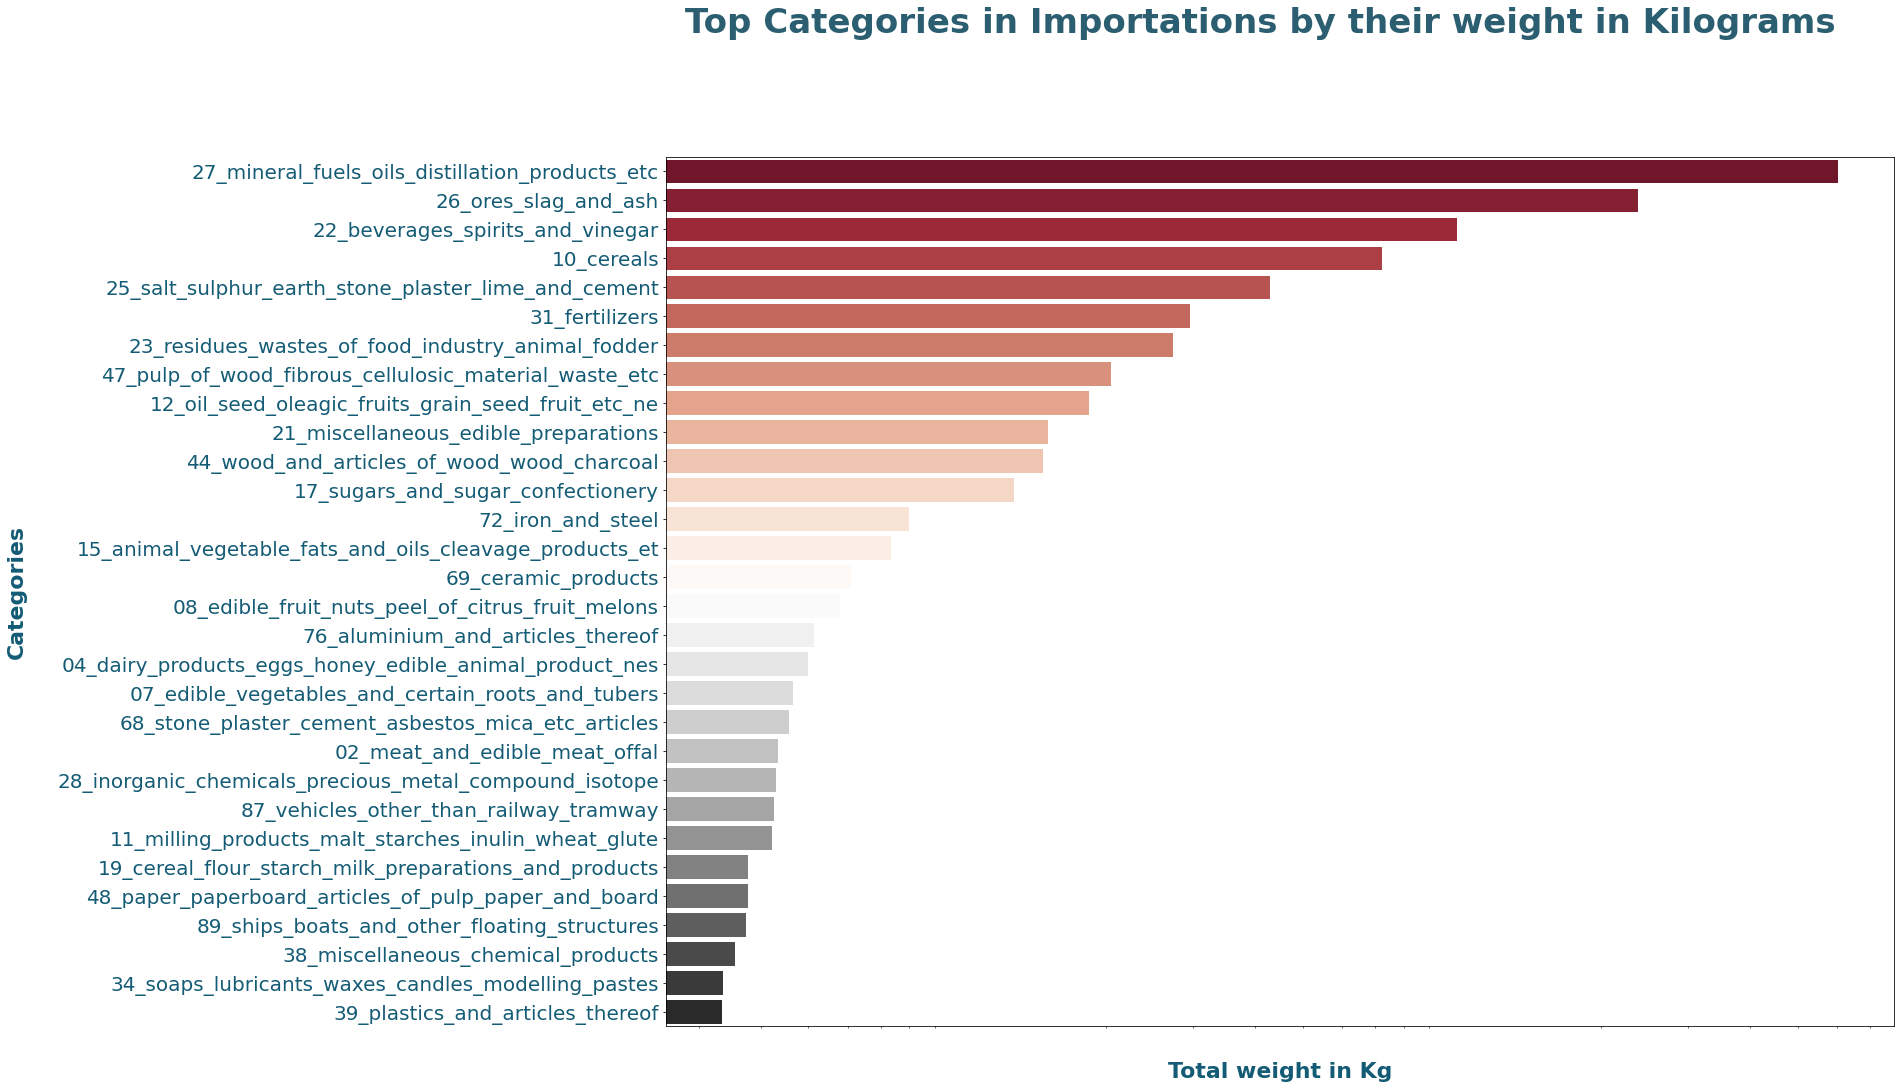

In [30]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctfw_ims, x='weight_kg', y='category', palette='RdGy')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Total weight in Kg', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Importations by their weight in Kilograms",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

## Product Categories in <b>importations</b>, ordered by <b>quantities</b></div>

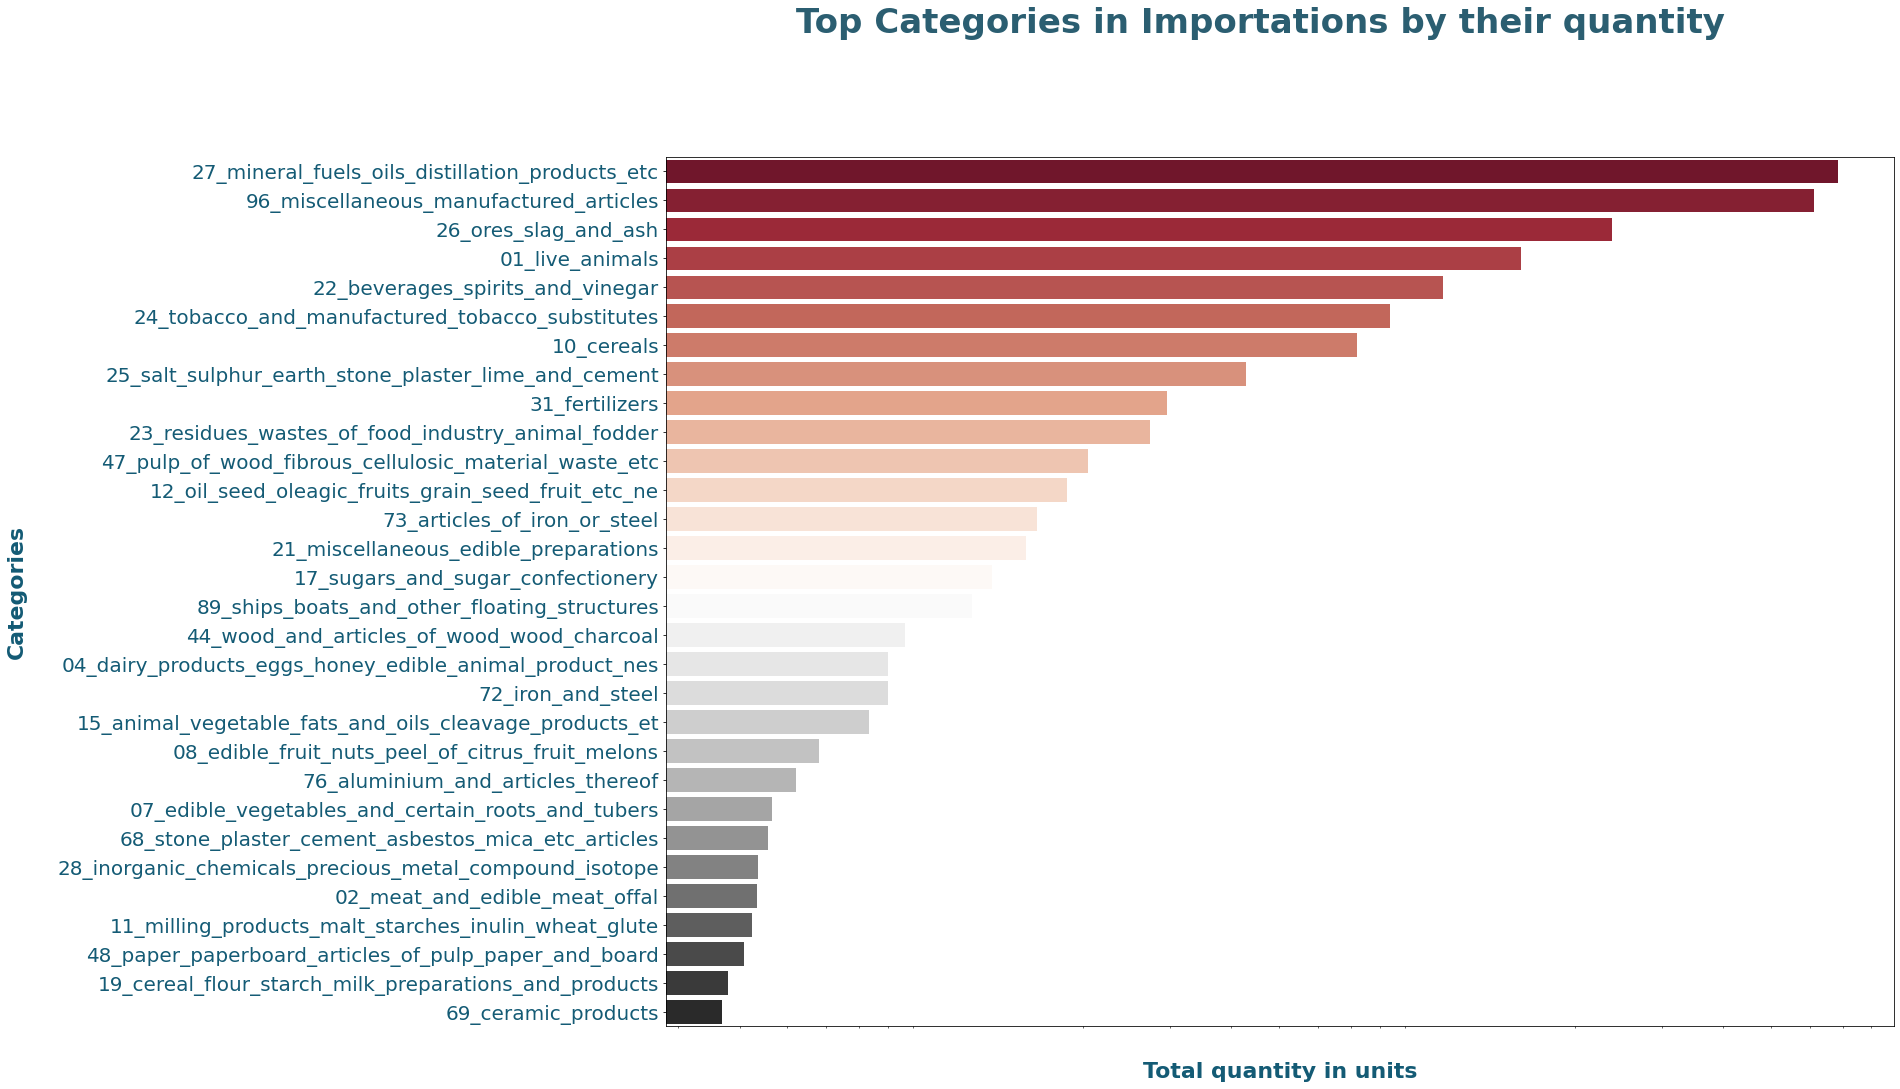

In [31]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctfq_ims, x='quantity', y='category', palette='RdGy')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Total quantity in units', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Importations by their quantity",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()



These plots are interesting since they reveals such important informations in which I can indicate some of the below:<br>
<ol>
    <li> Mineral fuels..... is by far the top category in all of the segments and classifications. </li>
    <li> Pharmaceutical catgory seem a highly profitable business since it stands in the second place by trade values, however the quantity and weight of the trades are not even close to the top10 categories.</li>
    <li> Eventhough it's been decades that consuming tobacco is reduced in the whole world, but it is still one of the most valuable trading categories.</li>
    <li> Most of the imported and exported trade categories appears to be aimed for feeding people.</li></ol>

Can you see the difference between segments and classifications? This is why statistics and correct visualization are so important when we want to deliver correct information to the public. For example, if in TV News, papers, or even political debates someone is talking about the economical stats, trading ranks, or anything similar, it is important to ask: what is the scale you measured this data?<br>
As we can see in each scale such as weight, quantity, and trade values show some different results and ranks. So it is not too simple that we could brief the results in just a sentence and say for example pharmaceutical products are always in the top 3 categories of traded goods.<br>
    
Now the question here is that can we reach to a solid conclusion based on the categories only? Do we need further investigation? In what field and which scale? To answer this question I will investigate further with commodities ranking which are the child directory of these categories to see which products exactly are being traded.
</div>

<br>


# What are top <b>commodities</b> in all trading segments?</div>

### *Now it's time to verify the products in each segment (overall, imports and exports) separately and see which items are in the highest supply and demand ranking. We are going to analyze them exactly like before scaled by their trade values, weight, and quantities and see the differences and reach some conclusions based on data and the visualizations.*

# Overall Trades</div>


In [33]:
ctc=df.groupby(['commodity'], as_index=False).sum()
ctcv=ctc.sort_values(by='trade_usd', ascending=False).head(30)
ctcw=ctc.sort_values(by='weight_kg', ascending=False).head(30)
ctcq=ctc.sort_values(by='quantity', ascending=False).head(30)

ctq=df.groupby(['commodity','flow'], as_index=False).sum()
ctqv=ctq.sort_values(by='trade_usd', ascending=False).head(30)
ctqw=ctq.sort_values(by='weight_kg', ascending=False).head(30)
ctqq=ctq.sort_values(by='quantity', ascending=False).head(30)

ctq_ex=ctq[(ctq['flow']=='Export')]
ctqv_exs=ctq_ex.sort_values(by='trade_usd', ascending=False).head(30)
ctqw_exs=ctq_ex.sort_values(by='weight_kg', ascending=False).head(30)
ctqq_exs=ctq_ex.sort_values(by='quantity', ascending=False).head(30)

ctq_im=ctq[(ctq['flow']=='Import')]
ctqv_ims=ctq_im.sort_values(by='trade_usd', ascending=False).head(30)
ctqw_ims=ctq_im.sort_values(by='weight_kg', ascending=False).head(30)
ctqq_ims=ctq_im.sort_values(by='quantity', ascending=False).head(30)

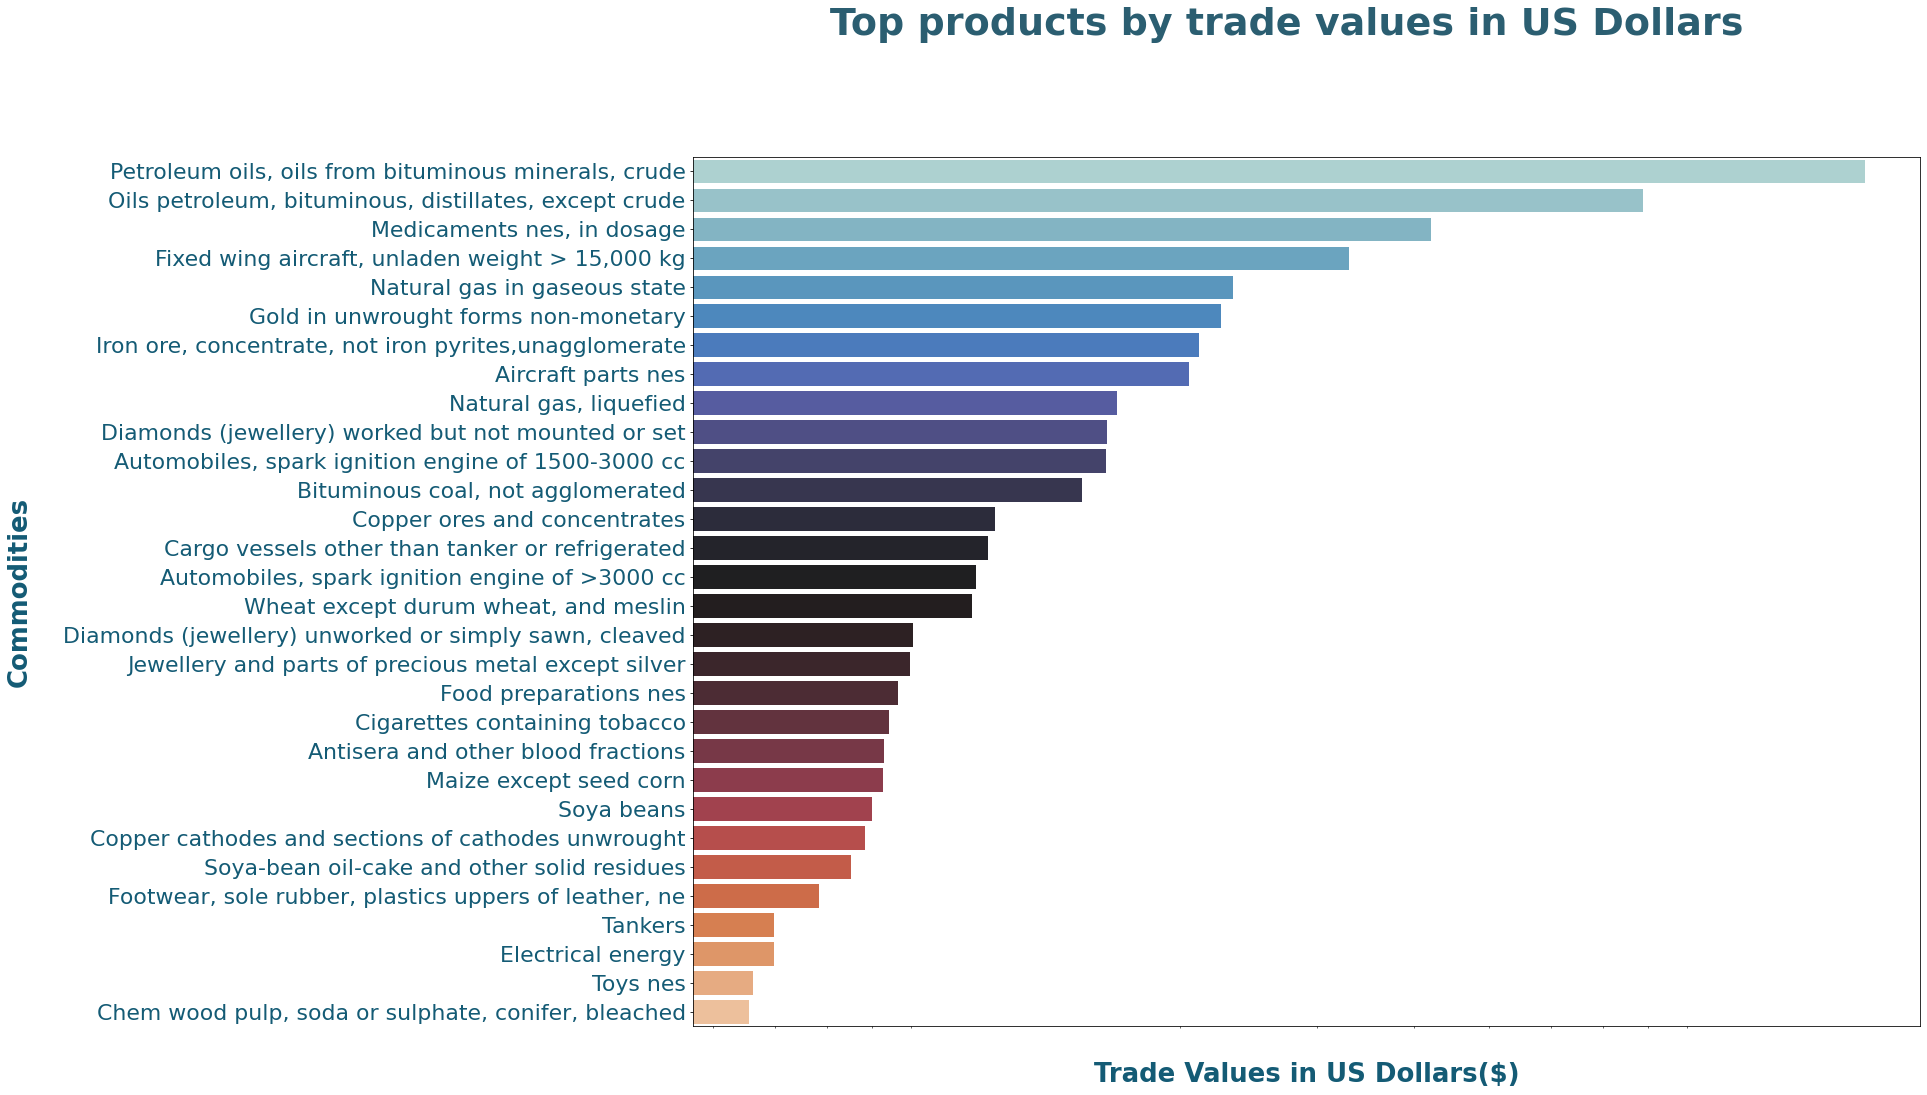

In [34]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctcv, x='trade_usd', y='commodity', palette='icefire')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by trade values in US Dollars",
    fontsize=38,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

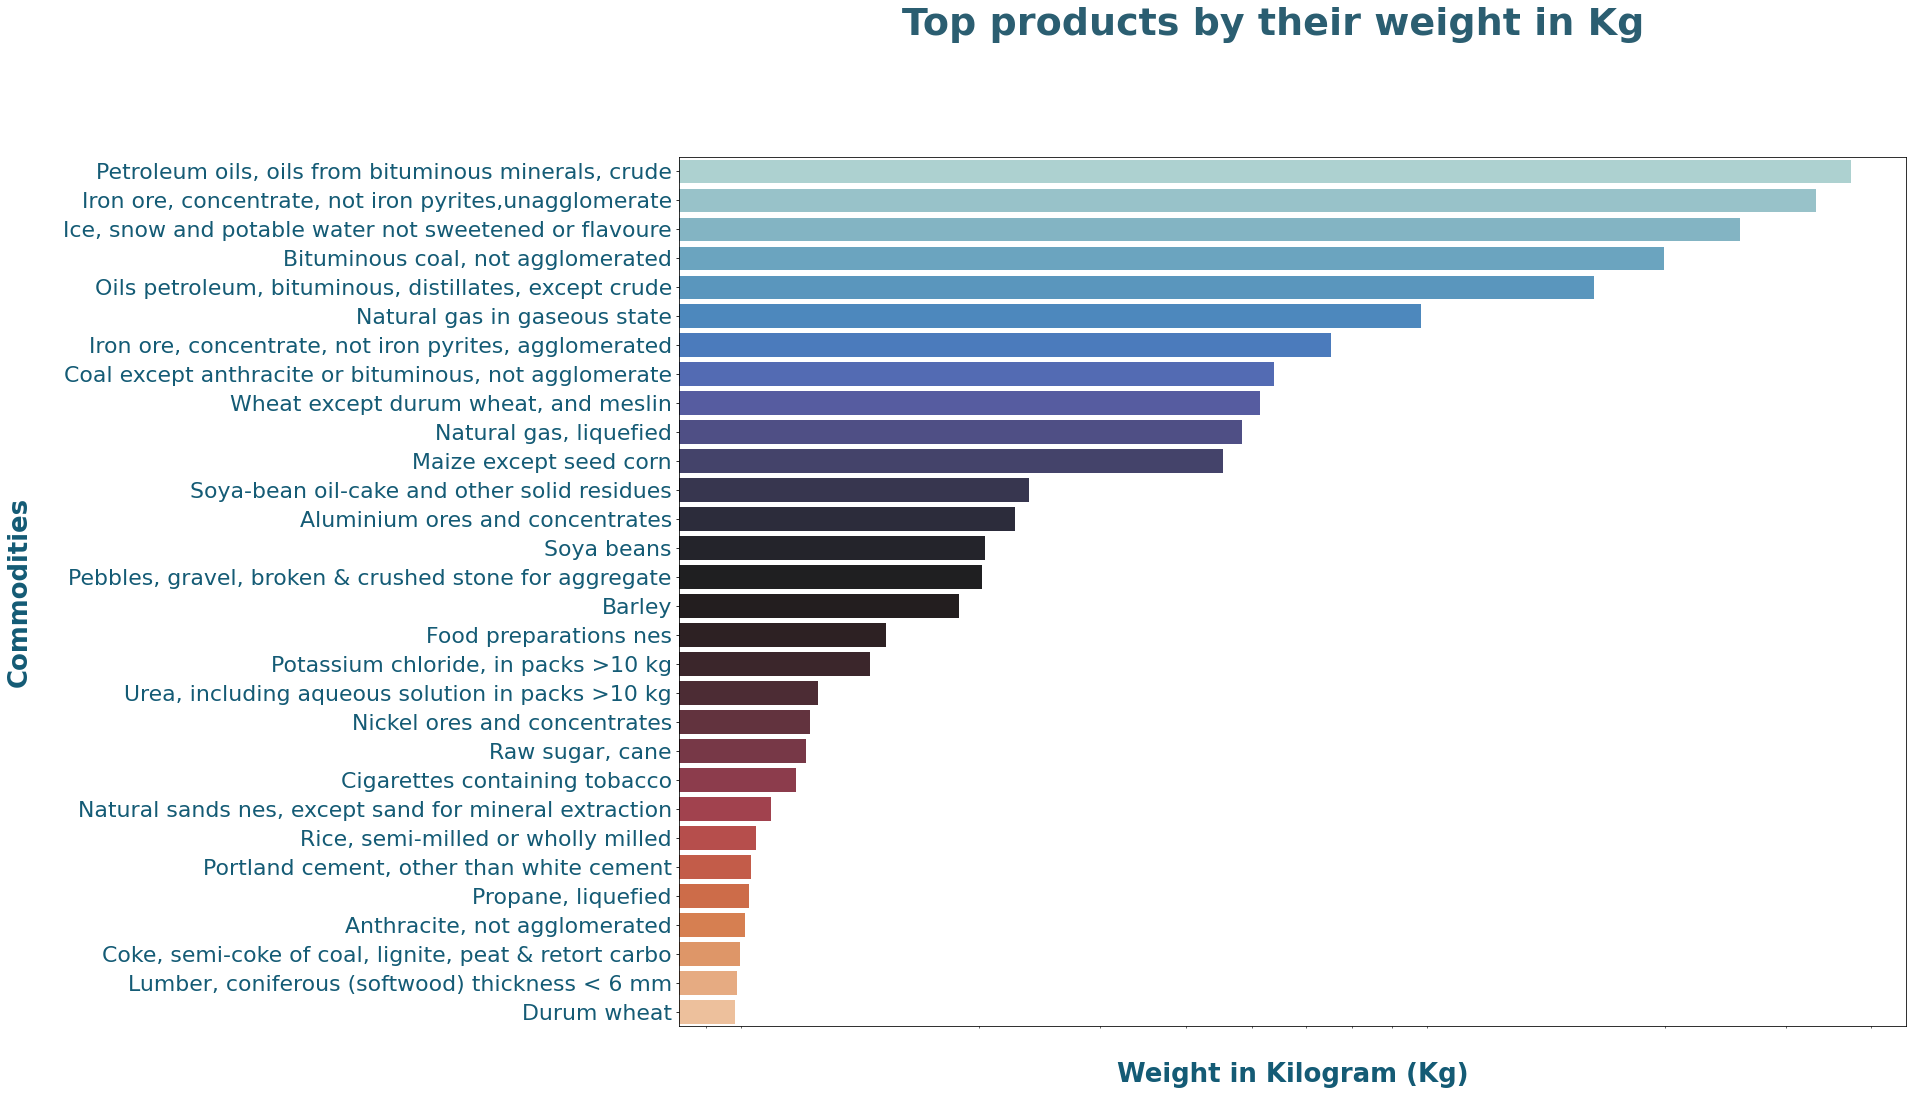

In [35]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctcw, x='weight_kg', y='commodity', palette='icefire')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Weight in Kilogram (Kg)', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by their weight in Kg",
    fontsize=38,
    fontweight='bold',
    ha="center",
    fontfamily='DejaVu Sans',
    y=1.01,
    color='#2B5E71')

plt.show()

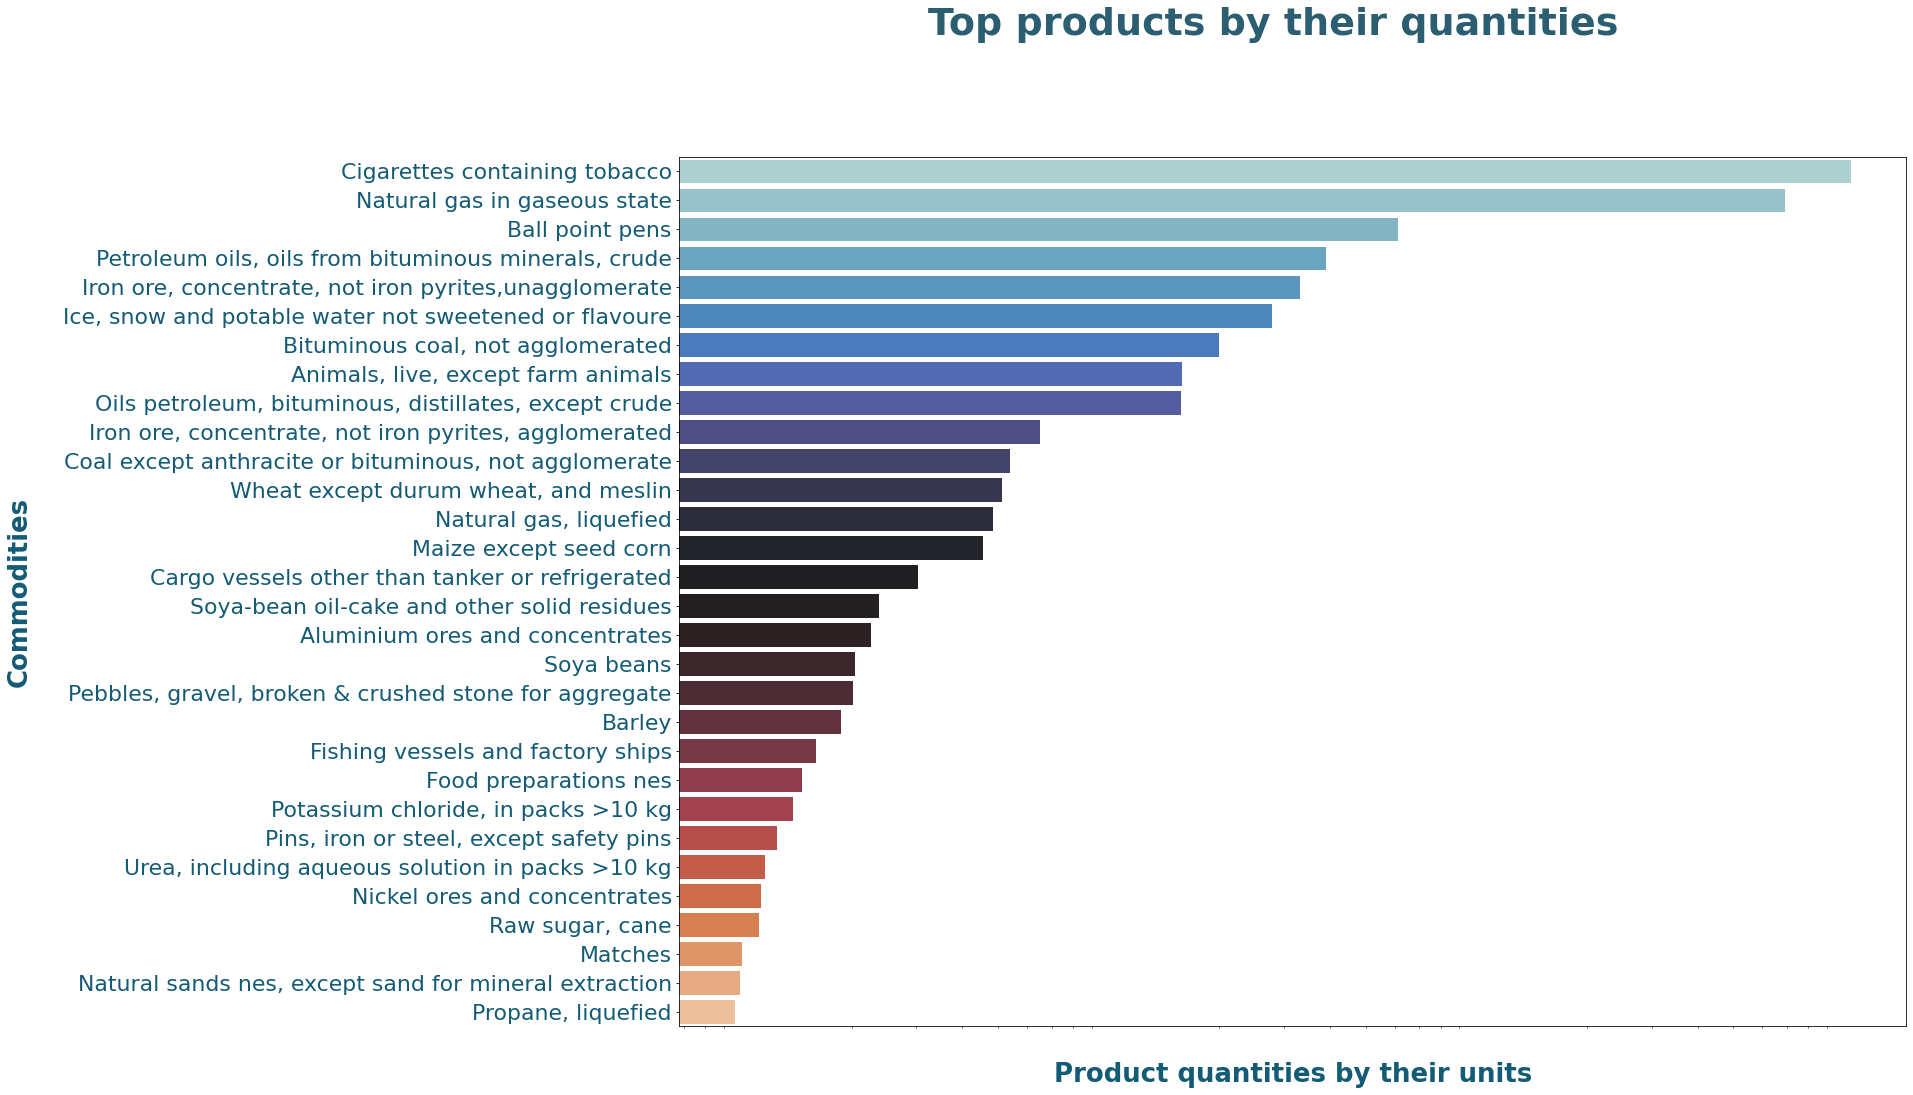

In [36]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctcq, x='quantity', y='commodity', palette='icefire')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Product quantities by their units', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by their quantities",
    fontsize=38,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

<div style="width:100%;font-family: Optima; font-size: 20px; font-weight: 400; line-height: 1.5; text-align: justify;">Super interesting again, we can see every time we receive some new information. However, trust issues are something we all have to absorb when it comes to data, even if it is from such a trustable source as the UN. But I never imagined that the ballpoint pen is one of the highest goods in the trading records, not at all!<br>
We will continue our analysis to be able to reveal a solid conclusion in the end, so let's begin.</div>

# Export</div>



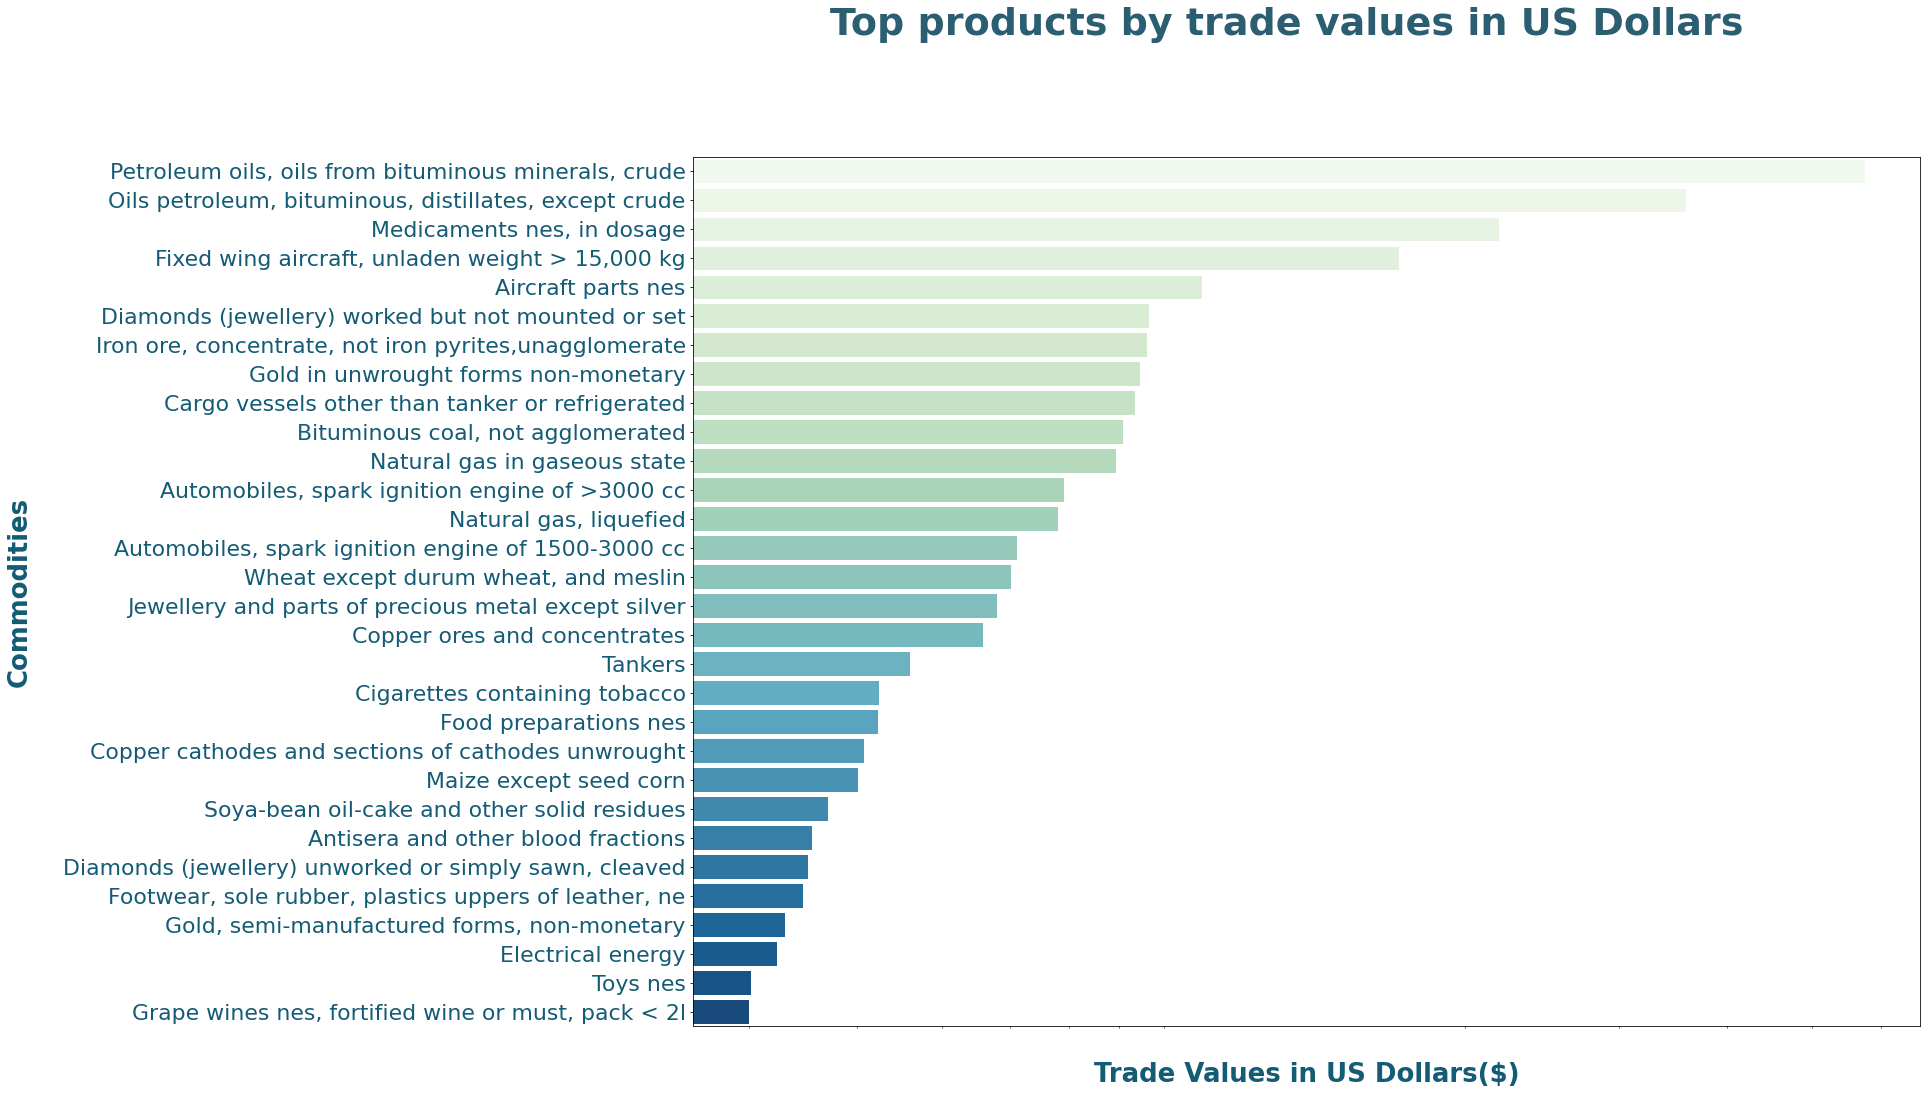

In [37]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqv_exs, x='trade_usd', y='commodity', palette='GnBu')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by trade values in US Dollars",
    fontsize=38,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

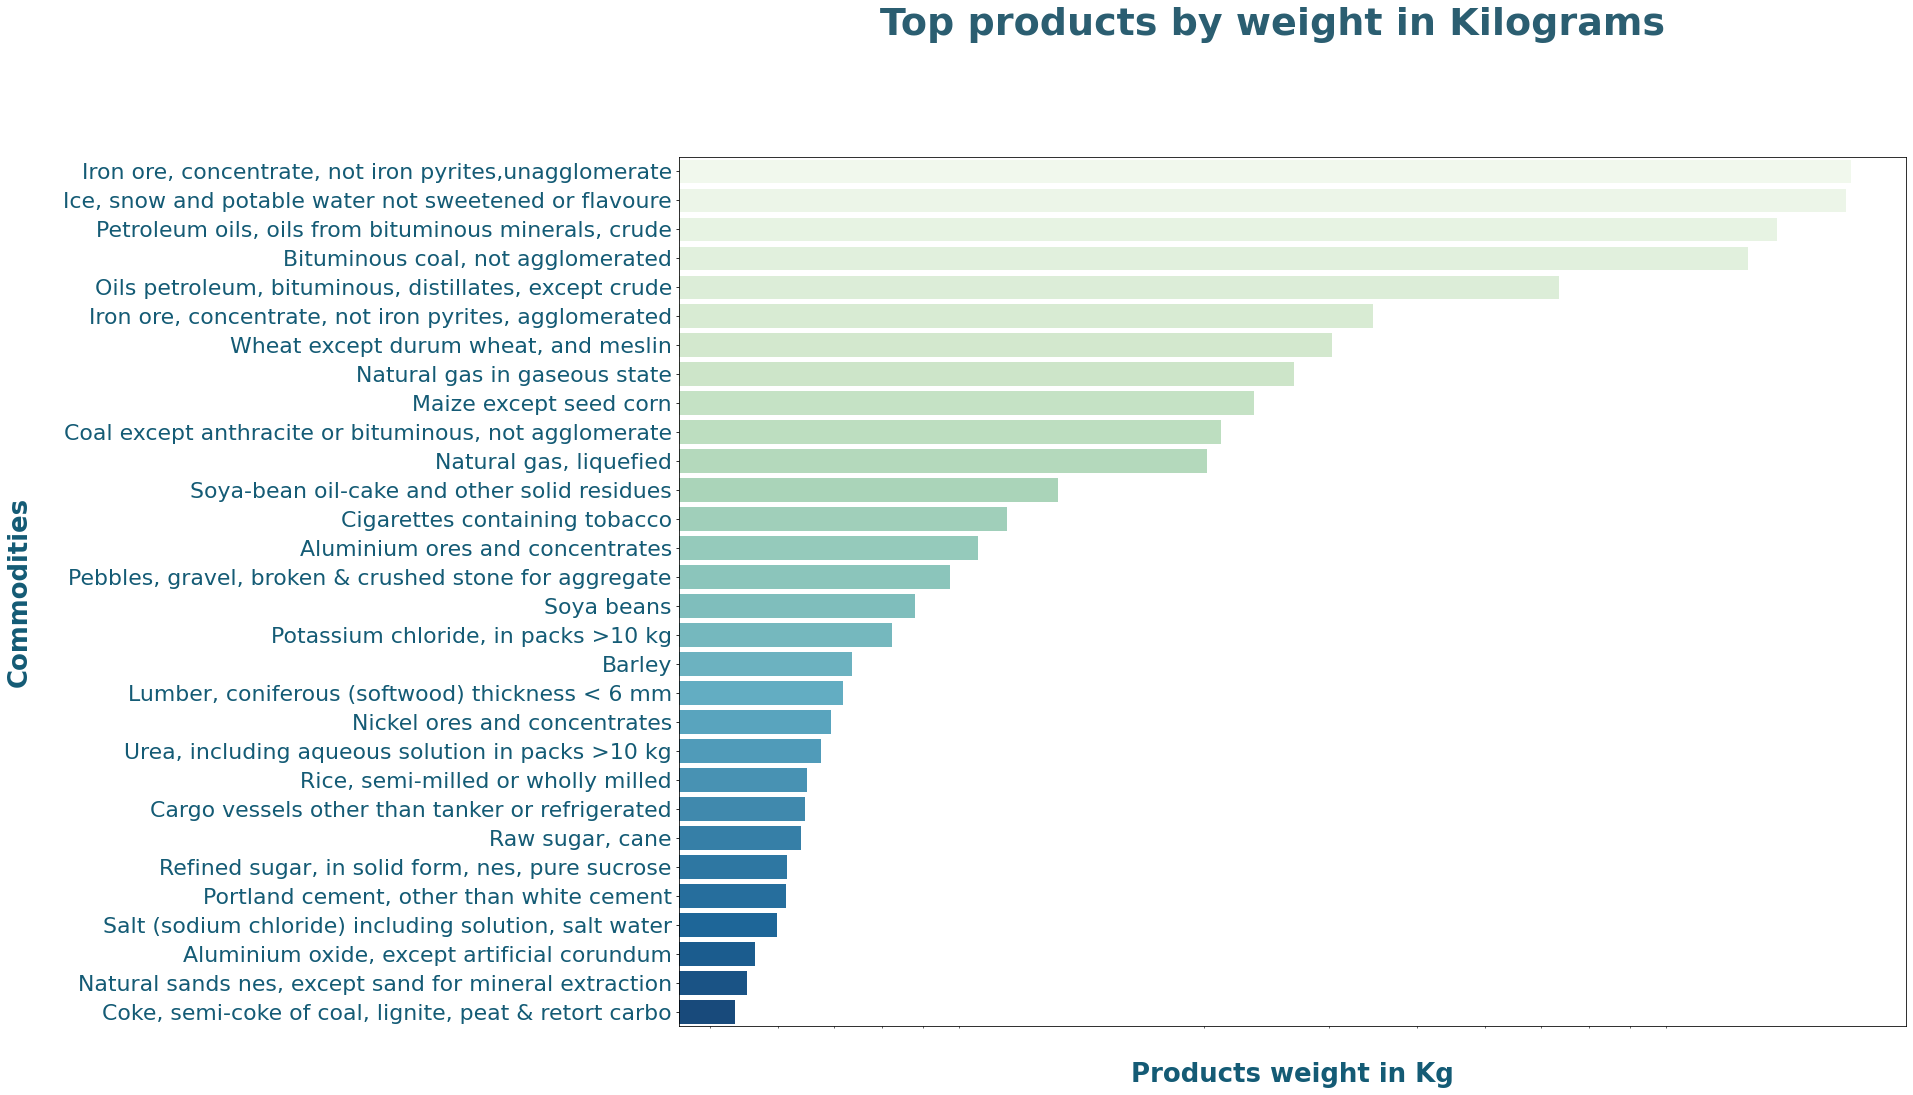

In [38]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqw_exs, x='weight_kg', y='commodity', palette='GnBu')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Products weight in Kg', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by weight in Kilograms",
    fontsize=38,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

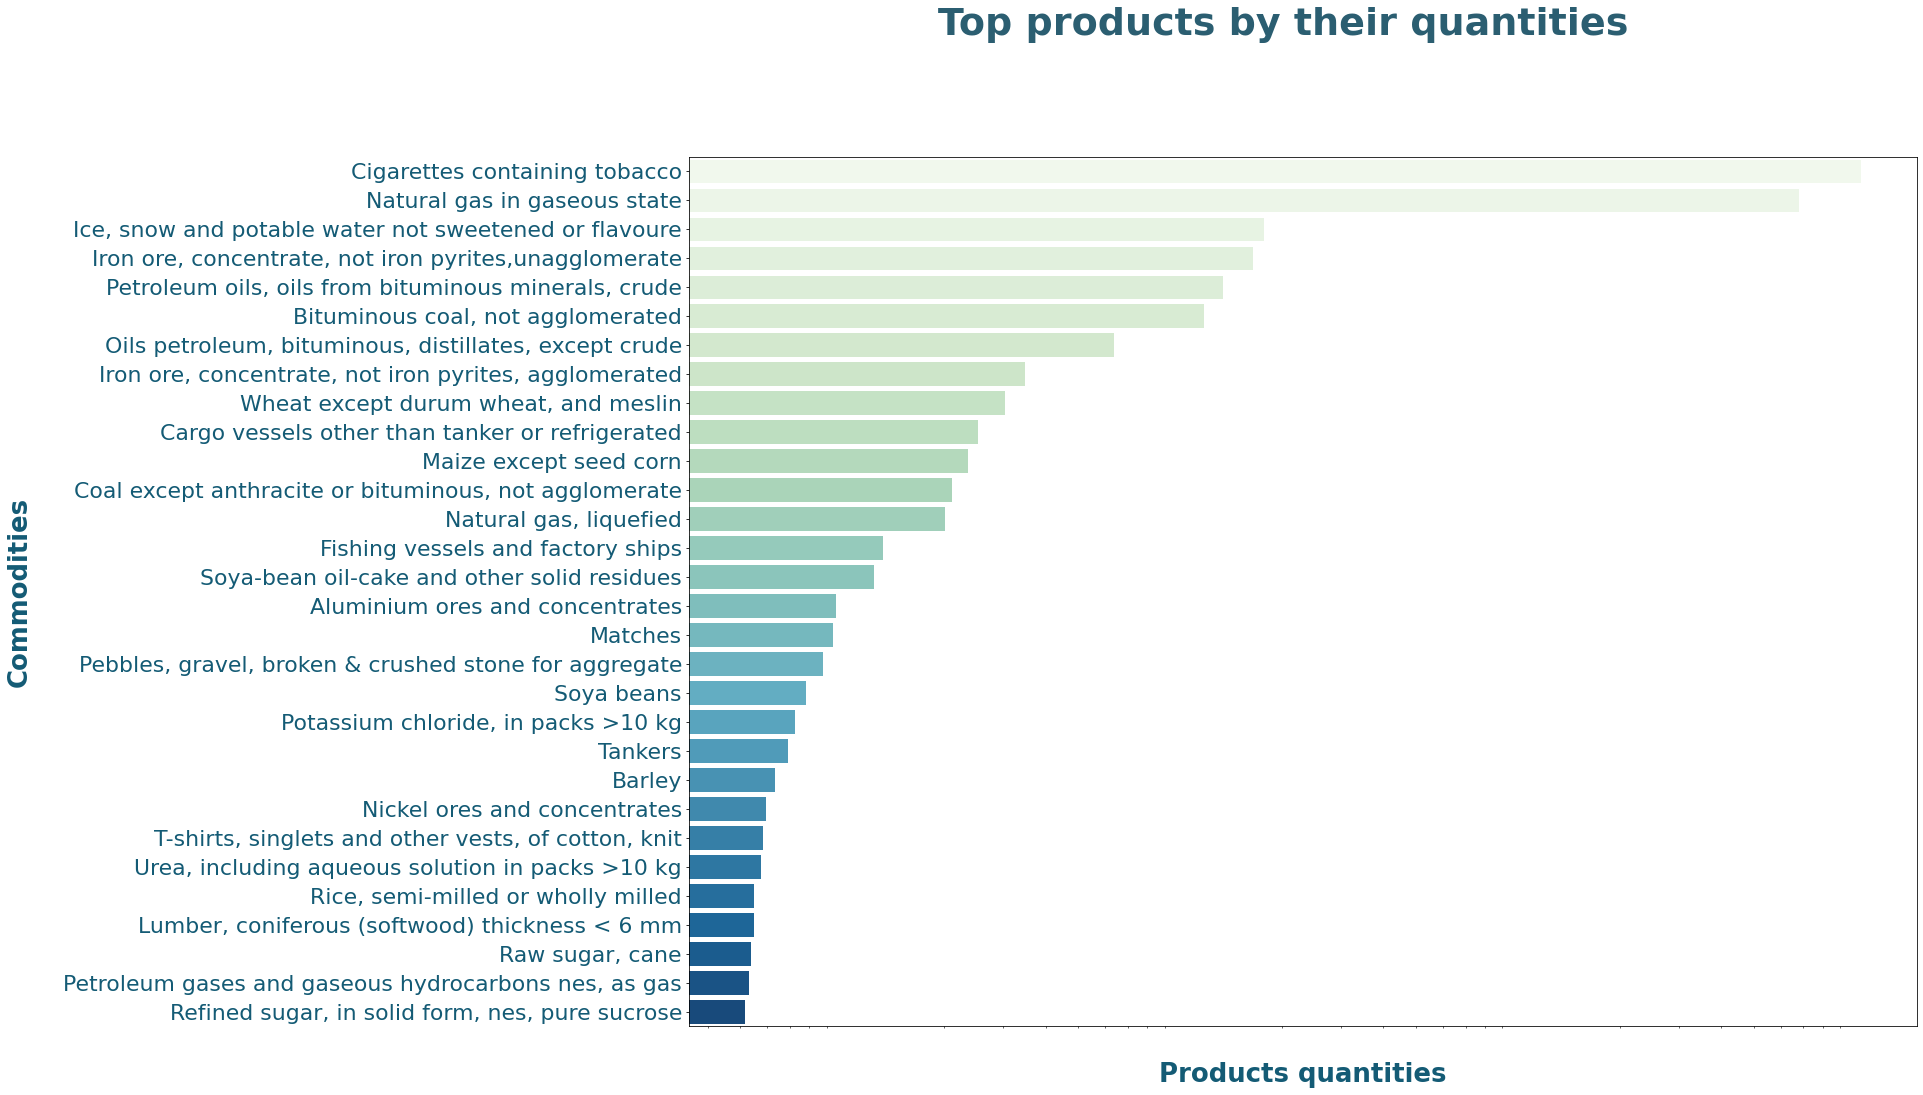

In [39]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqq_exs, x='quantity', y='commodity', palette='GnBu')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Products quantities', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by their quantities",
    fontsize=38,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

# Imports

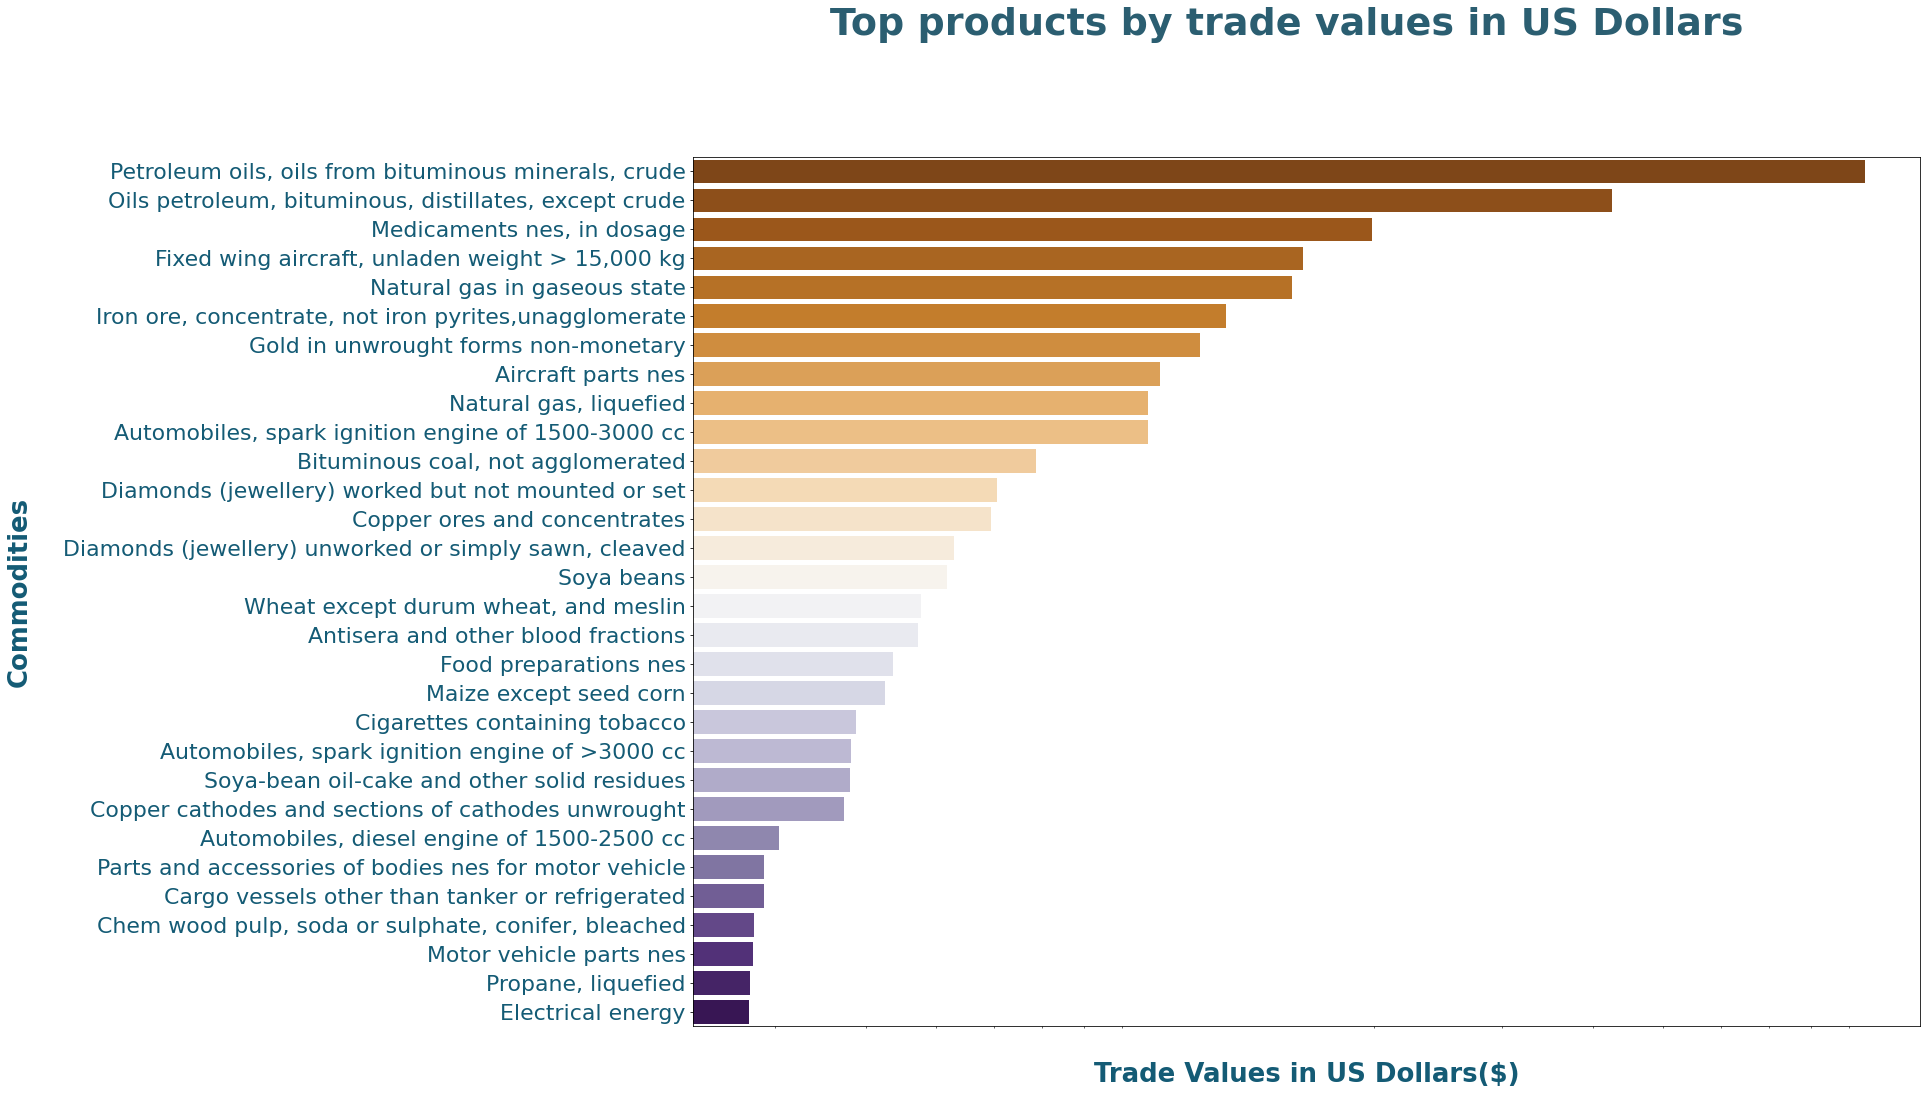

In [40]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqv_ims, x='trade_usd', y='commodity', palette='PuOr')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by trade values in US Dollars",
    fontsize=38,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

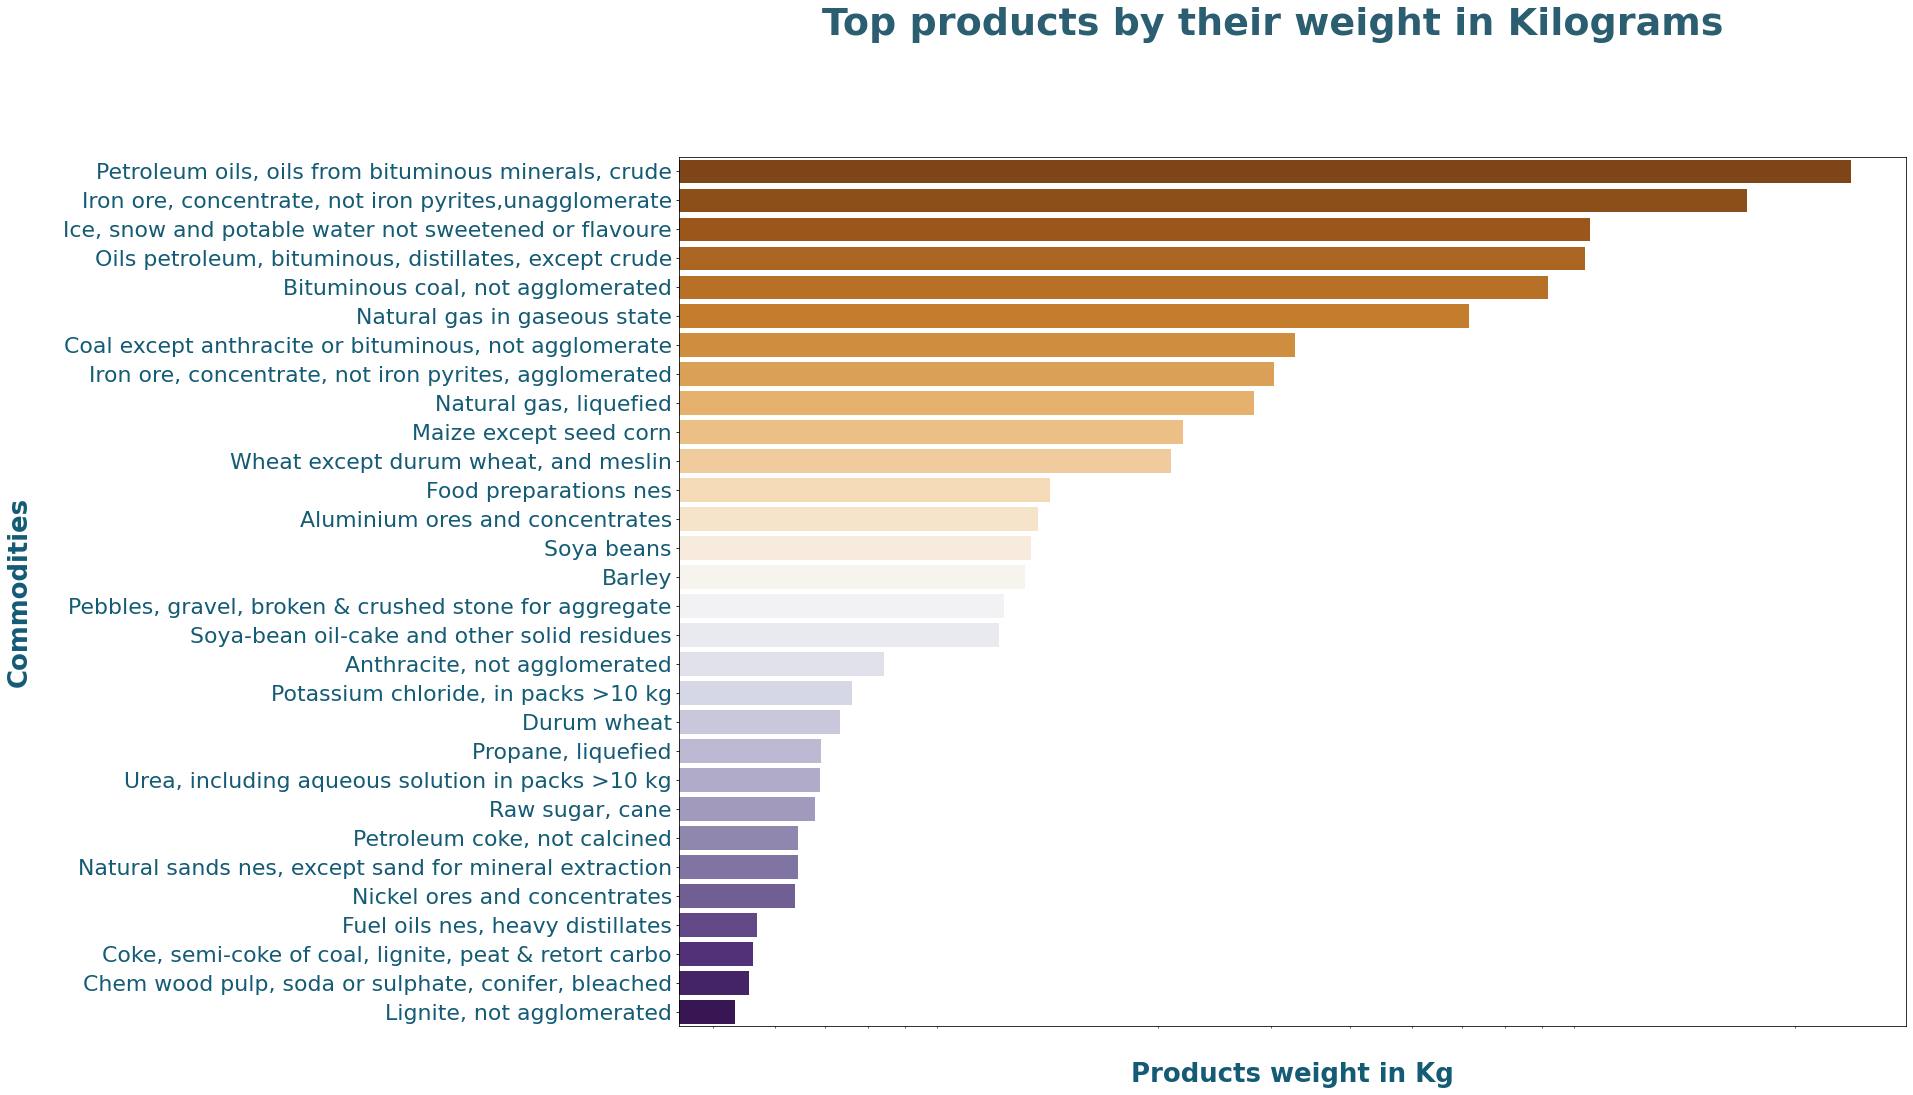

In [41]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqw_ims, x='weight_kg', y='commodity', palette='PuOr')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Products weight in Kg', 
           fontsize=26,
          fontweight='bold',
           labelpad=30,
           fontfamily='DejaVu Sans',
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by their weight in Kilograms",
    fontsize=38,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

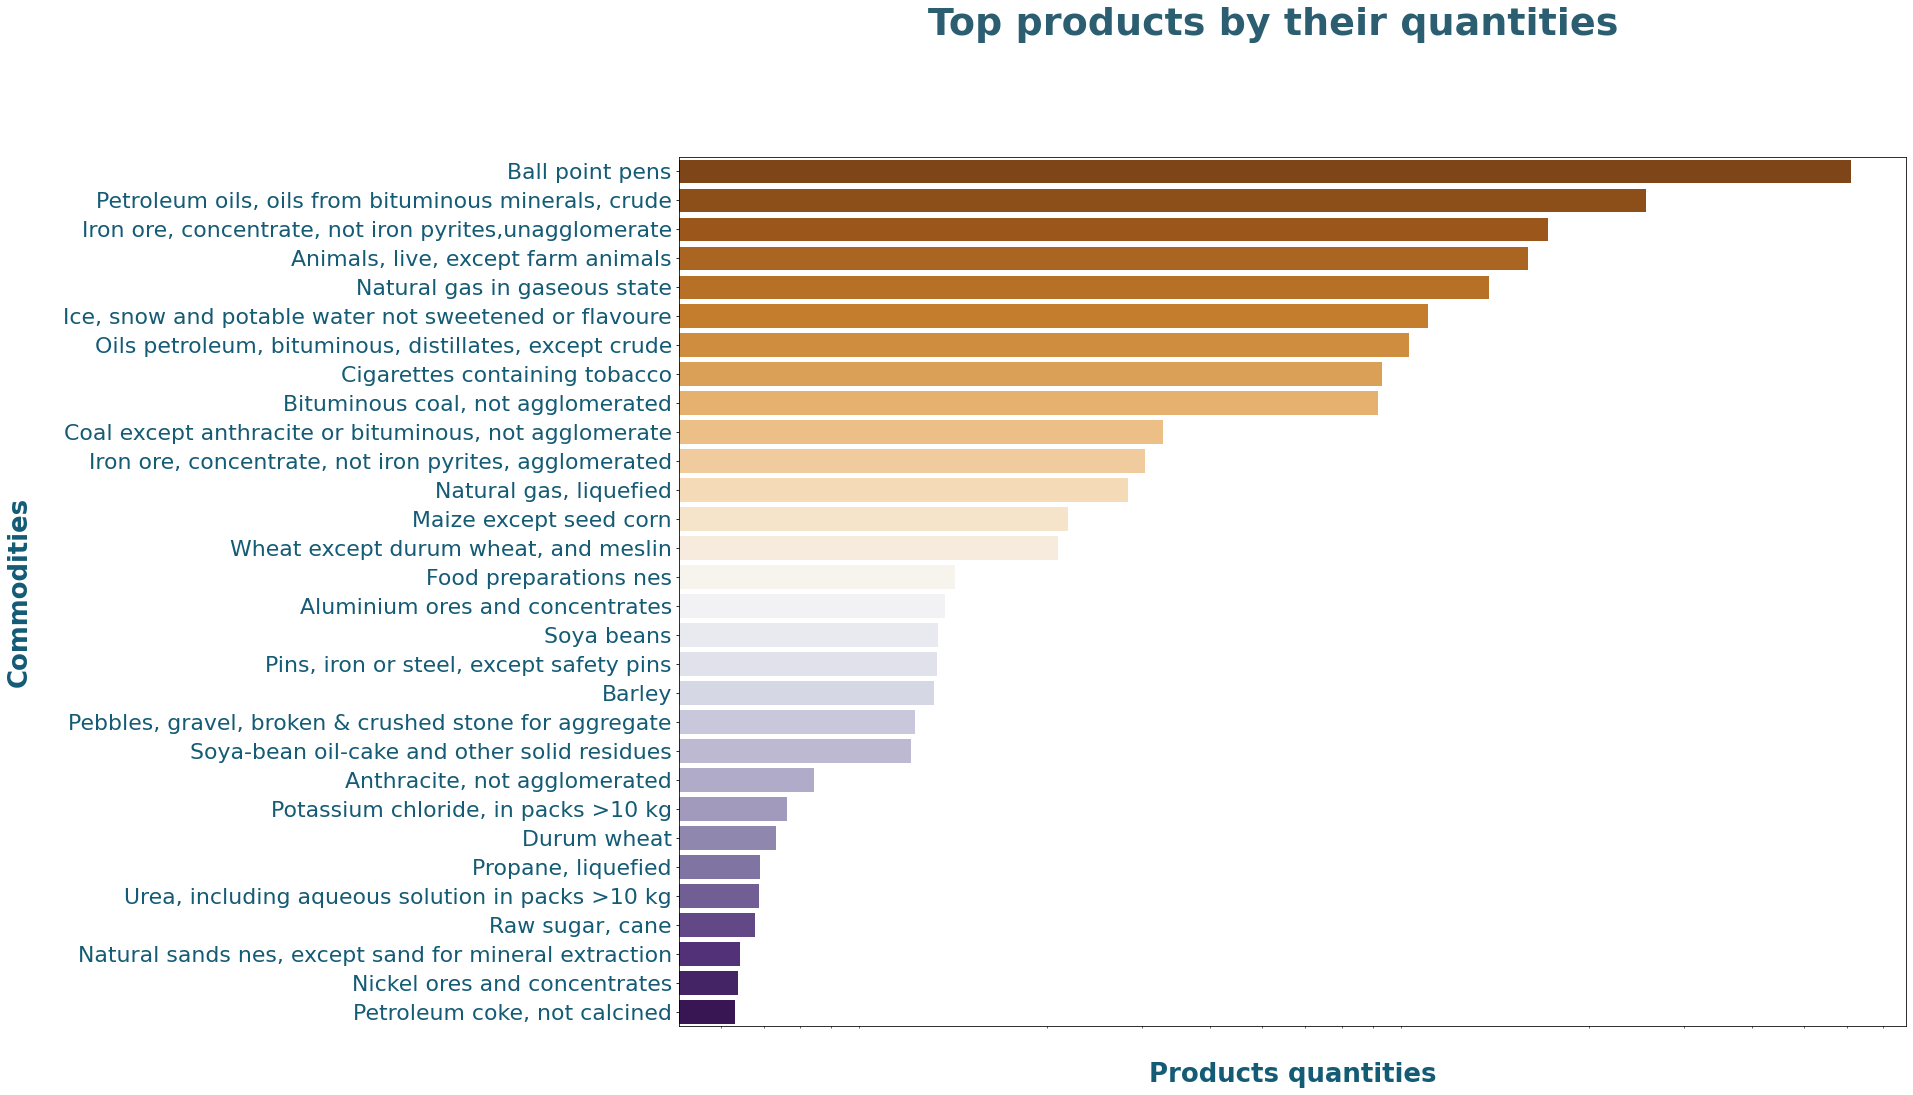

In [42]:
plt.subplots(figsize=(22,16))
sns.barplot(data=ctqq_ims, x='quantity', y='commodity', palette='PuOr')
plt.xscale('log')

plt.yticks(rotation=0, color='#145B75', ticks=None, fontsize=22,fontfamily='DejaVu Sans')
plt.xticks([])

plt.xlabel('Products quantities', 
           fontsize=26,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Commodities',
          fontsize=26,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top products by their quantities",
    fontsize=38,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()



Now we have a better and clearer vision about what's inside this dataset. These results are telling us such important points, most importantl is that from trading categories we can't have any kind of conclusion.<br>
Based on the results we can see that most of the trading activity focused on these categories:
<ul>
    <li>Energy</li>
    <li>Transportation and logistics(parts)</li>
    <li>Gold</li>
    <li>Iron</li>
    <li>Diamond</li>
    <li>Vehicles</li>
    <li>Human feeding</li>
</ul>    


# What are top <b>countries</b> in import and export segments?</div>

### *Earlier we saw the countries' ranks for their trading activities, but as I mentioned it wasn't a clear picture of what was going on exactly and it was just like what most of the politicians and media show to the public about economic activities. Here I want to take this analysis an step further which is the trade segments for all countries, and then we will take it even under more investigation with the yearly analysis and other factors in other sections.*

# Export

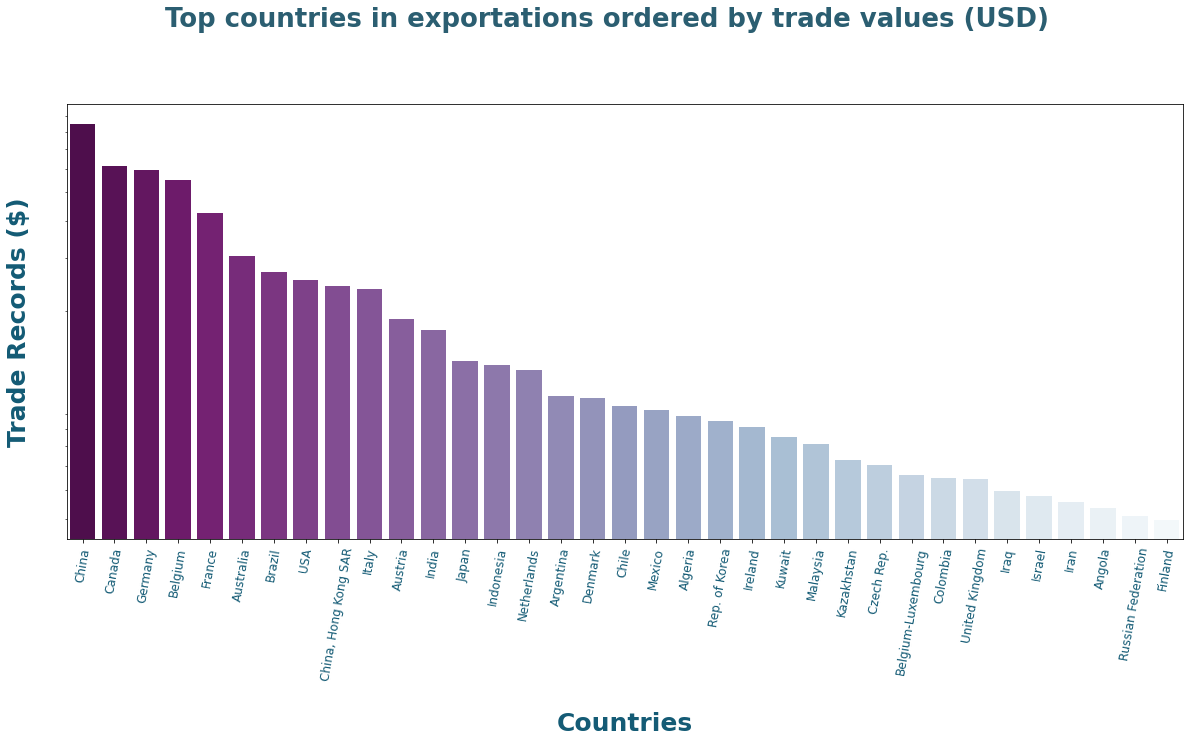

In [43]:
# Defining segments for countries

ctf=df.groupby(['country', 'flow'], as_index=False).sum()
ctfv=ctf.sort_values(by='trade_usd', ascending=False).head(35)
ctfw=ctf.sort_values(by='weight_kg', ascending=False).head(35)
ctfq=ctf.sort_values(by='quantity', ascending=False).head(35)

ctf_ex=ctf[(ctf['flow']=='Export')]
ctfv_exs=ctf_ex.sort_values(by='trade_usd', ascending=False).head(35)
ctfw_exs=ctf_ex.sort_values(by='weight_kg', ascending=False).head(35)
ctfq_exs=ctf_ex.sort_values(by='quantity', ascending=False).head(35)

ctf_im=ctf[(ctf['flow']=='Import')]
ctfv_ims=ctf_im.sort_values(by='trade_usd', ascending=False).head(35)
ctfw_ims=ctf_im.sort_values(by='weight_kg', ascending=False).head(35)
ctfq_ims=ctf_im.sort_values(by='quantity', ascending=False).head(35)

###
###
### 

#Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfv_exs, x='country', y='trade_usd', palette='BuPu_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in exportations ordered by trade values (USD)",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

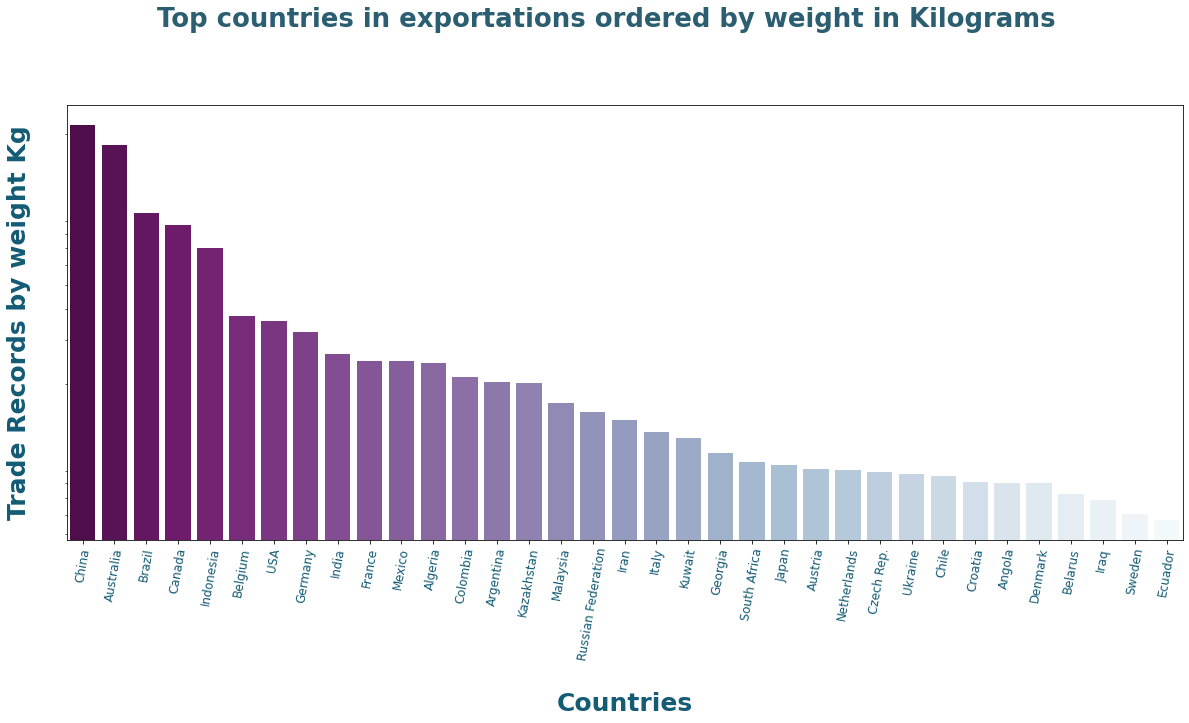

In [44]:
# Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfw_exs, x='country', y='weight_kg', palette='BuPu_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records by weight Kg',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in exportations ordered by weight in Kilograms",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

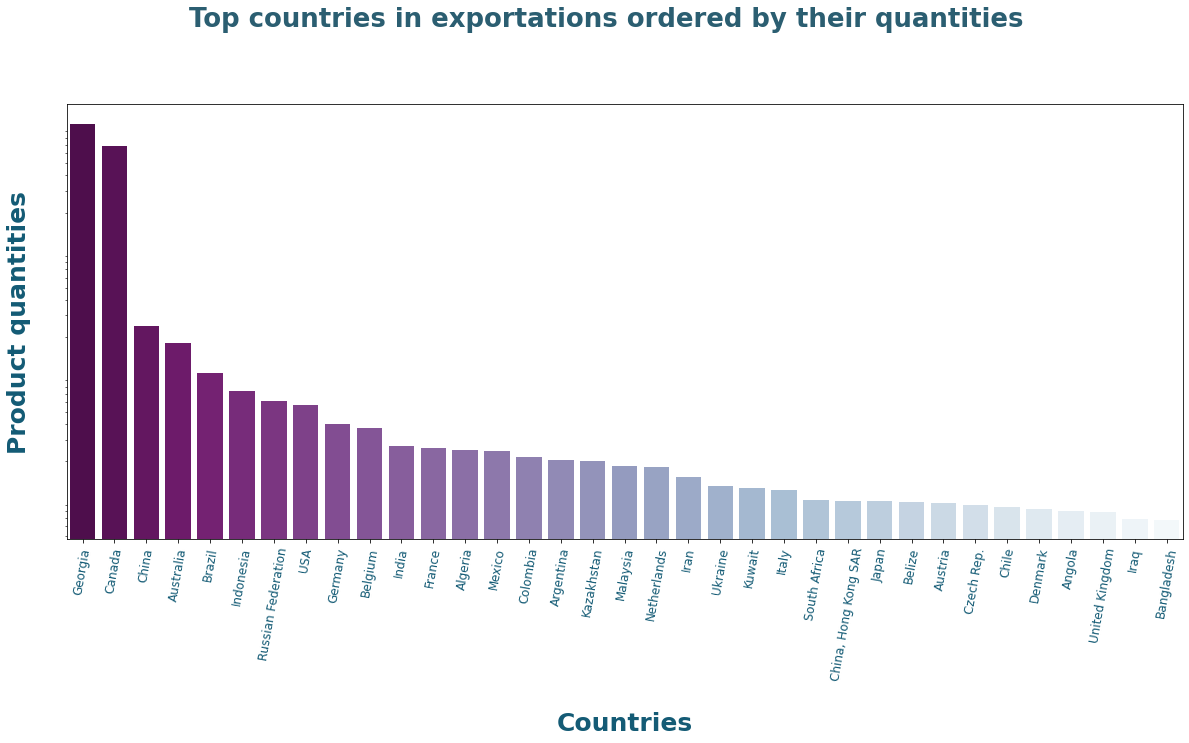

In [45]:
# Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfq_exs, x='country', y='quantity', palette='BuPu_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Product quantities',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in exportations ordered by their quantities",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

# Imports

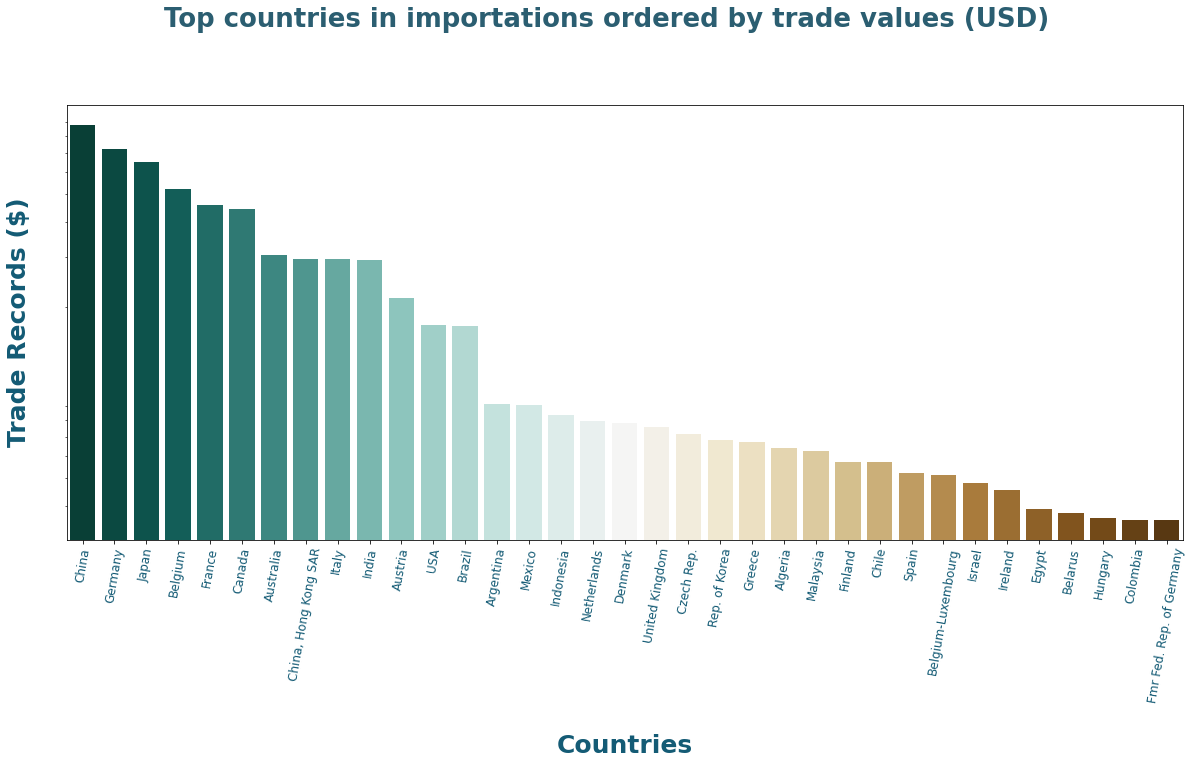

In [46]:
# Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfv_ims, x='country', y='trade_usd', palette='BrBG_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in importations ordered by trade values (USD)",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

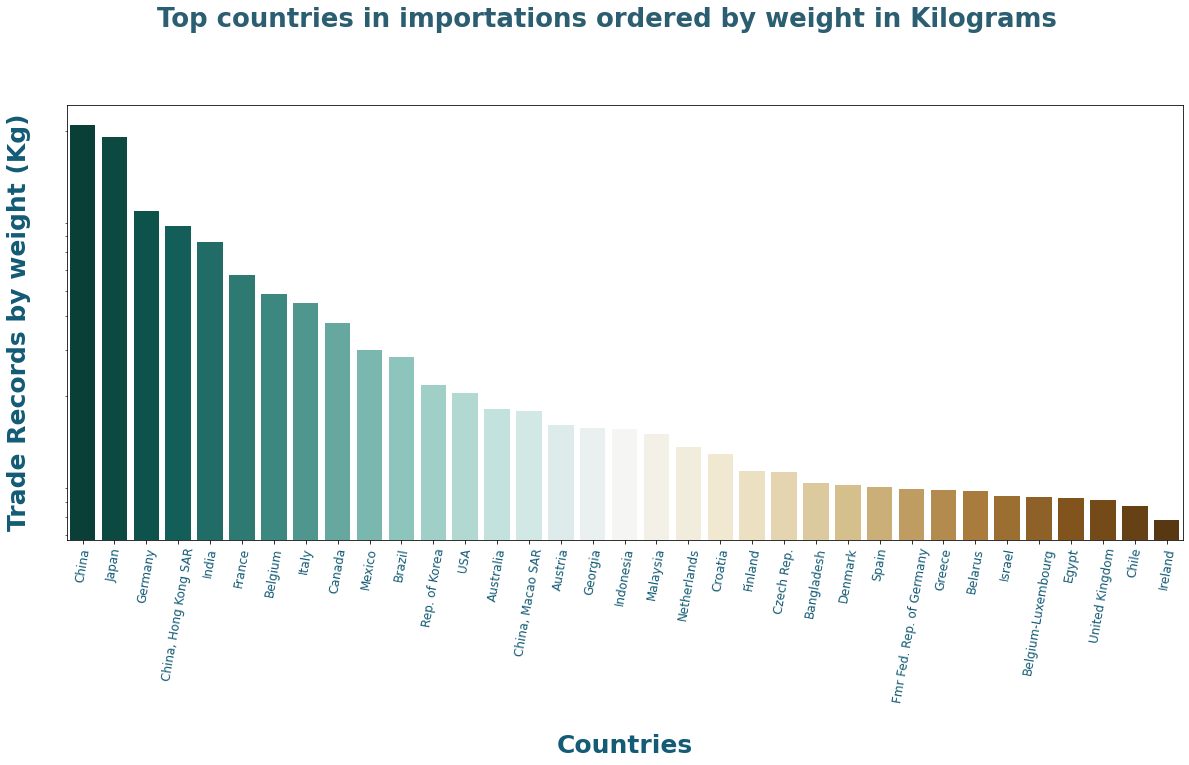

In [47]:
# Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfw_ims, x='country', y='weight_kg', palette='BrBG_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records by weight (Kg)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in importations ordered by weight in Kilograms",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

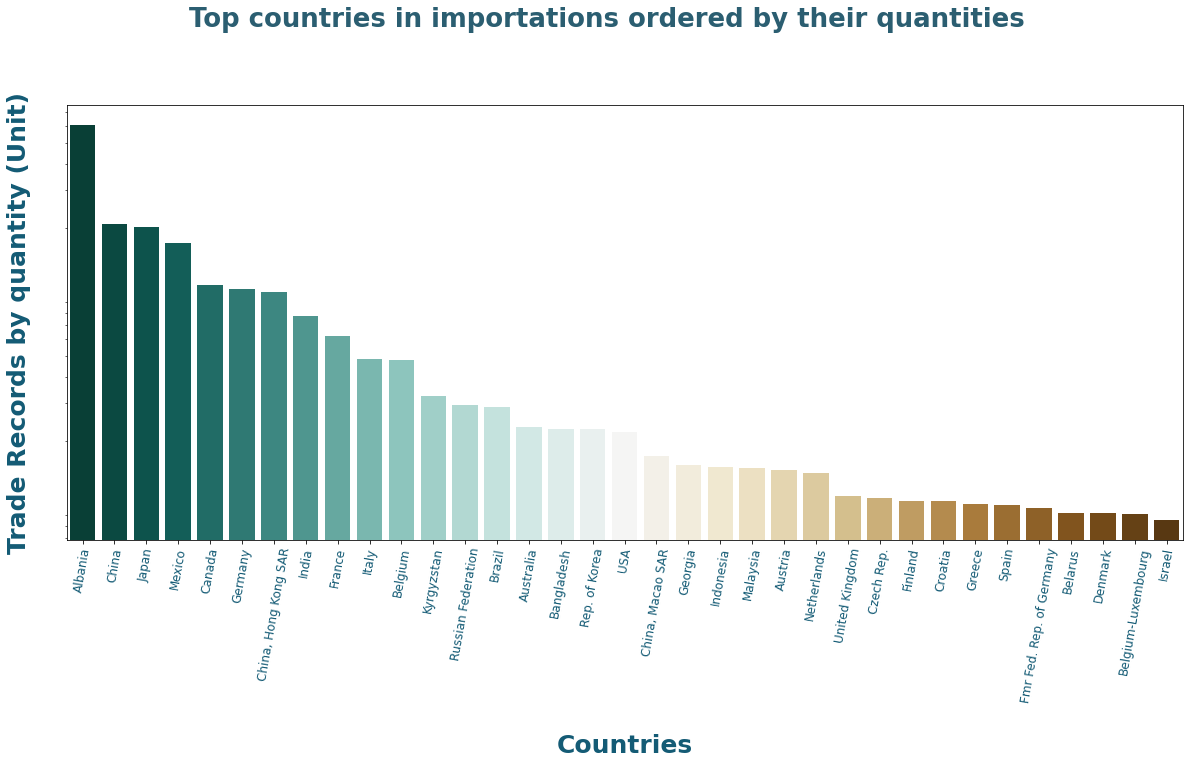

In [48]:
# Plotting countries in exportation segment by their trade values
plt.subplots(figsize=(20, 8))
sns.barplot(data=ctfq_ims, x='country', y='quantity', palette='BrBG_r')
plt.xticks(rotation=80, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=12)
plt.yscale('log')
plt.yticks([])

plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.ylabel('Trade Records by quantity (Unit)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in importations ordered by their quantities",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

# Which countries exported more than their importation?

### *In the first part of our analysis, we tried to answer the most commonly asked question about trades and economies by the public, which is what are the countries' ranks in trading? As I explained before it is a very relative subject and we need to understand that there isn't a straightforward answer to such questions.*

### *For example, we can classify countries by their exportation values, weights, quantities, or their importations in those scales as well.*
### *Also, we can classify countries when their exportation is higher than their importations, this specific question for answering some political and justicial doubts about governmental actions and even sometimes to uncover corruptions inside a governmental system, but that is for another notebook that I am going to dig deep about some countries and release some useful information that might help responsible organizations for verifying the fact of the existence of the corruption in their systems.*

### *But now in this section, we will focus on the top-tier exporters and importers. We want to know those countries with a high value of exportations, how much they paid for the importations in return.*


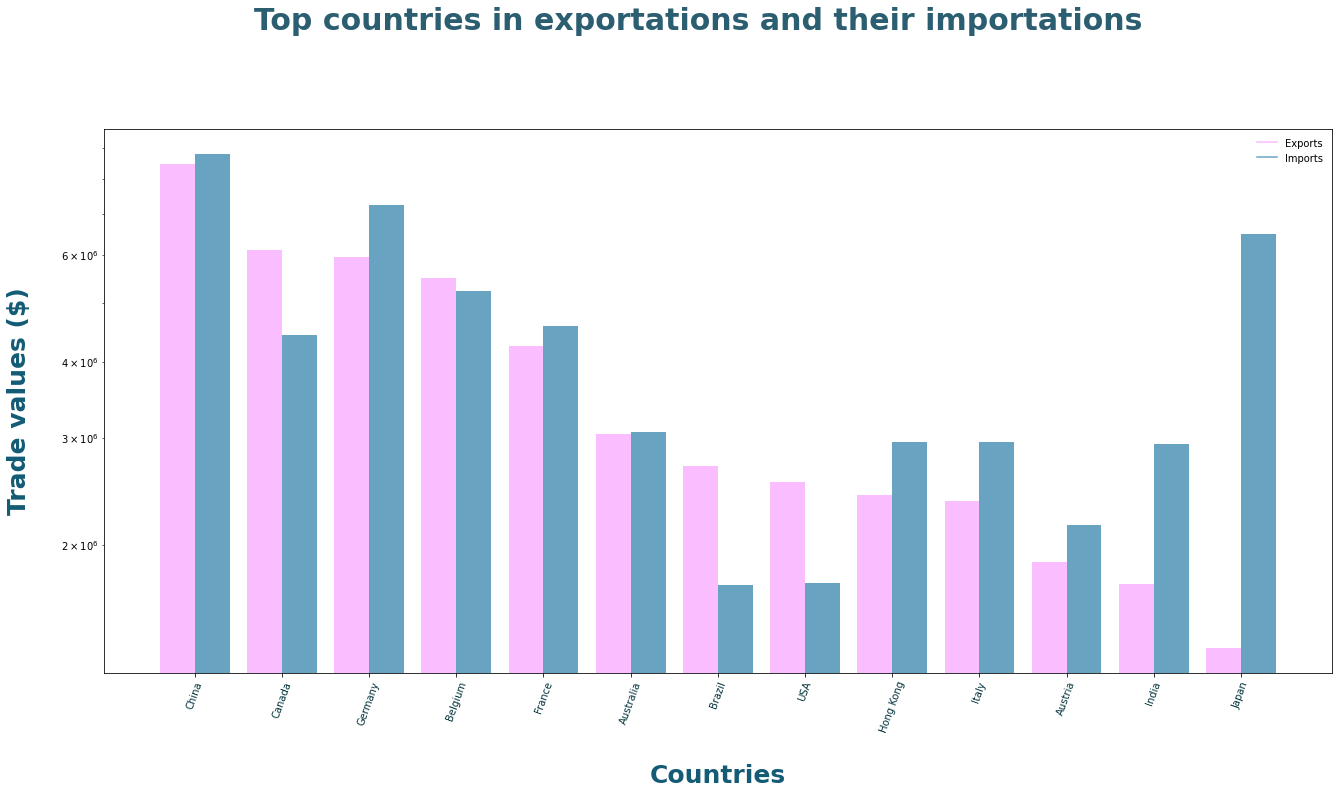

In [49]:
ctfv_dx=ctf_ex.sort_values(by='trade_usd', 
                           ascending=False).head(13)
ctfv_di=ctf_im.sort_values(by='trade_usd', 
                           ascending=False).head(13)
ctfv_ddi=ctfv_di.reindex([120,109,227,57,210,32,83,561,123,279,36,265,287]) 

# I will need the line2D for adding a custom legend
from matplotlib.lines import Line2D

bins = ['China','Canada','Germany','Belgium','France','Australia', 'Brazil', 'USA', 
        'Hong Kong','Italy','Austria','India','Japan']
exps = ctfv_dx['trade_usd']
imps = ctfv_ddi['trade_usd']
x_axis = np.arange(len(bins))

# Creating two plots for male and female victims together for comparison porpuses.
f, ax = plt.subplots(figsize = (22, 10))
plt.bar(x_axis -0.2, exps, width=0.4, label = 'Exports', color='#FABDFF')
plt.bar(x_axis +0.2, imps, width=0.4, label = 'Imports', color='#68A4C1')
plt.yscale('log')

# Rotating the labels for readability
plt.xticks(x_axis, bins, rotation=70, color='#01323A',fontfamily='DejaVu Sans')
plt.yticks([])
custom_lines = [Line2D([0],[0], color='#FABDFF'), Line2D([0],[0], color='#68A4C1')]

# Adding labels
plt.xlabel('Countries', 
           fontsize=25,
          fontweight='bold',
           fontfamily='DejaVu Sans',
           labelpad=30,
          color='#145B75')
plt.ylabel('Trade values ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top countries in exportations and their importations",
    fontsize=30,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

ax.legend(custom_lines, ['Exports', 'Imports'], frameon=False)
plt.show()

Interpreting this graph is something that needs a lot of time and effort since this data is aggregated at all times, however we can see those top exporters are not necessarily top importers. But interpreting it is not such a simple process, consuming rate and importation are relevant to so many elements such as population, industrial activities, modernization and so on which is not in the scale of this project.<br>
As an straightforward result, we can say that based on historical data, among top exporters only four countries exported more than their importation. These countries are:
<ol>
    <li>Canada</li>
    <li>Belgium</li>
    <li>Brazil</li>
    <li>United States</li>
</ol>
Again, this is not an absolute result and needs to be expressed in a more informative manner, such as per year, per commodity, and other factors that should be mentioned due to the question. We asked an overall question based on what we have on hand and tried to answer it in the most simplest way possible. So interpreting this figure as an answer to any specific question is not approved by me and surely is not valid. Now let's continue to the next question.</div>


# What countries are the exporters of top trading categories?</div>


### *After identifying the top trading exported categories in the question 4 we want to answer that which countries exported those categories more than others. Let's focus on top 5 categories, that the answer won't go too long.*

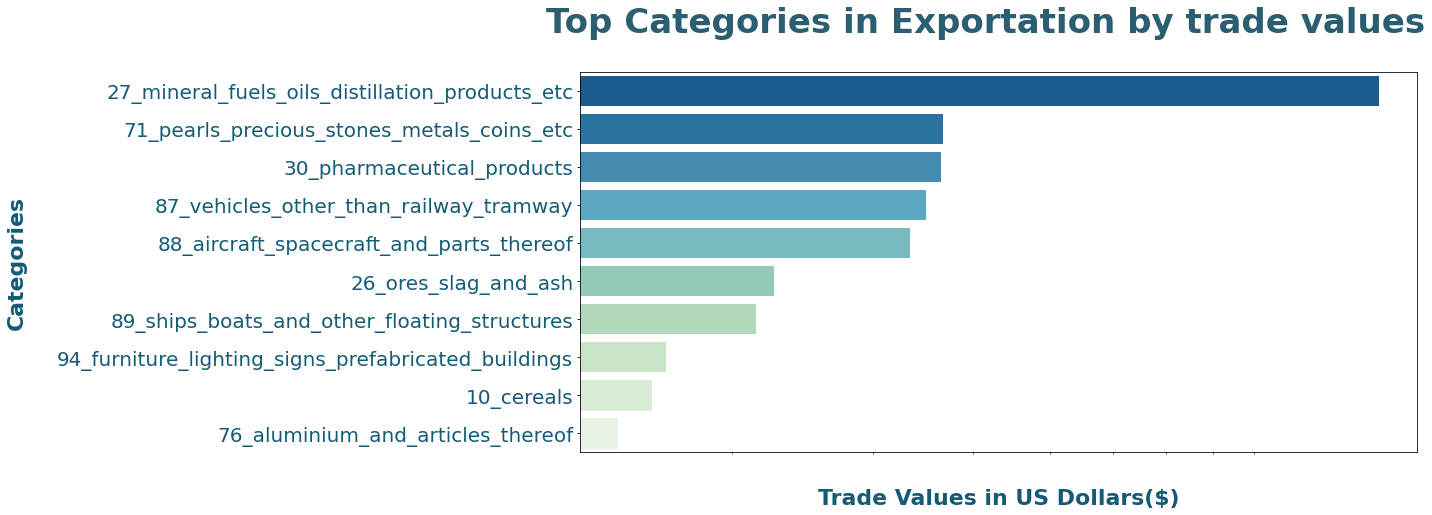

In [50]:
top5ctg_exp=ctf_exs.sort_values(by='trade_usd', ascending=False).head(10)
top5ctg_imp=ctf_ims.sort_values(by='trade_usd', ascending=False).head(10)

plt.subplots(figsize=(15,7))
sns.barplot(data=top5ctg_exp, x='trade_usd', y='category', palette='GnBu_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in Exportation by trade values",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

### *As a reminder, we plotted the top 10 categories, but now we will focus on the top five items for further analysis. We can clearly see how far is petroleum from the other categories, but does this mean that human beings consume petroleum more than other categories? What about the precious srones and metals?*
### *Actually, I think this section could tell us so many things, that maybe men now passed the necessity of feeding problem and survival era! Other than that we can use this plot for answering many more questions, but now let's focus on our main question. Which countries are exporting these categories more than the others?*
### *Does it mean that top countries in exportation such as China or Canada exported these products more than the others? Here we will see that.*


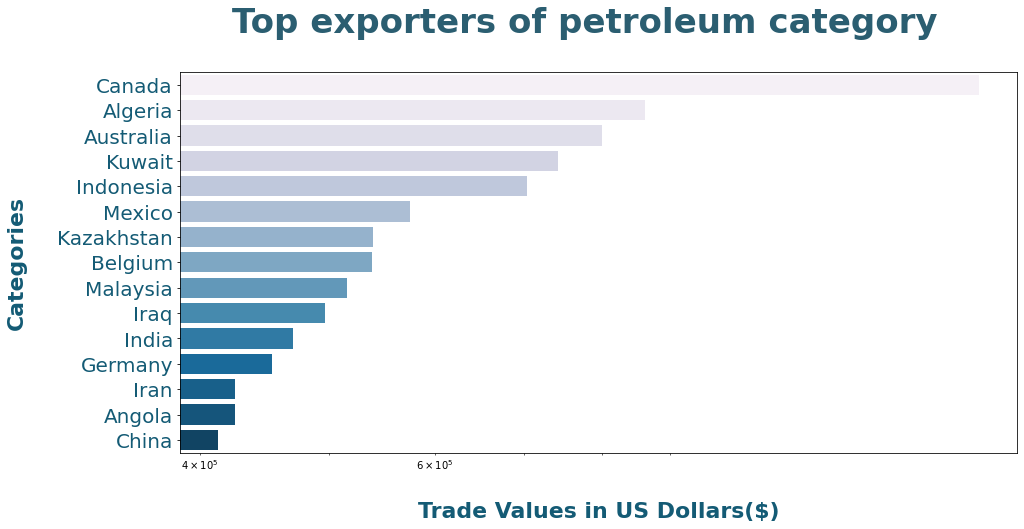

In [51]:
topc=df.groupby(['country','category','flow'], as_index=False).sum()

topc_ex=topc[(topc['flow']=='Export')]
topcv_exs=topc_ex.sort_values(by='trade_usd', ascending=False)
topcq_exs=topc_ex.sort_values(by='quantity', ascending=False).head(30)
topcw_exs=topc_ex.sort_values(by='weight_kg', ascending=False).head(30)

topc_im=topc[(topc['flow']=='Import')]
topcv_ims=topc_im.sort_values(by='trade_usd', ascending=False).head(30)
topcq_ims=topc_im.sort_values(by='quantity', ascending=False).head(30)
topcw_ims=topc_im.sort_values(by='weight_kg', ascending=False).head(30)

oil_ex=topcv_exs[topcv_exs['category'] == '27_mineral_fuels_oils_distillation_products_etc'].head(15)
pearl_ex=topcv_exs[topcv_exs['category'] == '71_pearls_precious_stones_metals_coins_etc'].head(15)
pharma_ex=topcv_exs[topcv_exs['category'] == '30_pharmaceutical_products'].head(15)
vhcl_ex=topcv_exs[topcv_exs['category'] == '87_vehicles_other_than_railway_tramway'].head(15)
airprt_ex=topcv_exs[topcv_exs['category'] == '88_aircraft_spacecraft_and_parts_thereof'].head(15)


##### Lets plot the first category

plt.subplots(figsize=(15,7))
sns.barplot(data=oil_ex, x='trade_usd', y='country', palette='PuBu')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top exporters of petroleum category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

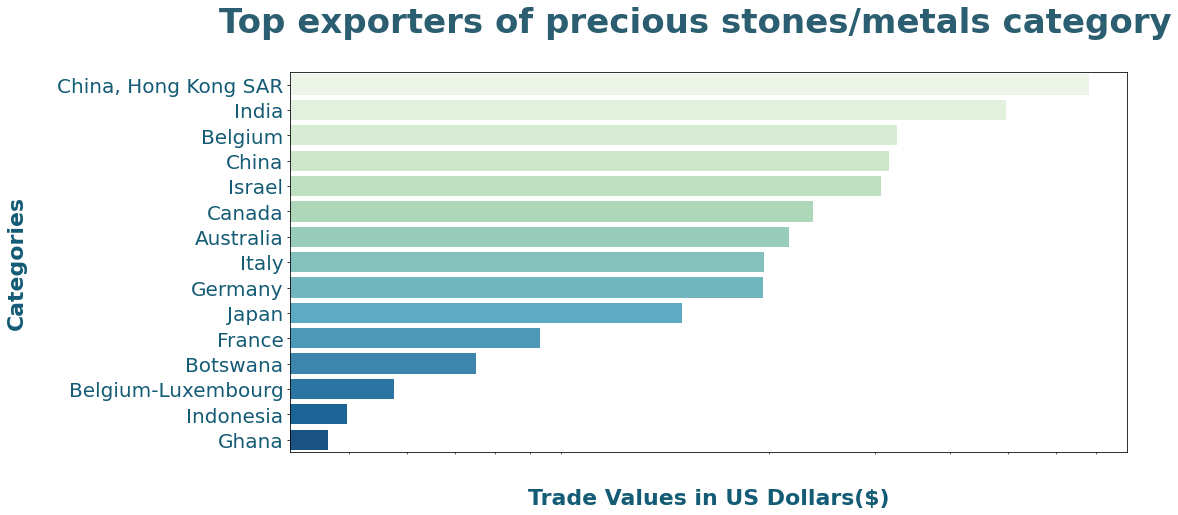

In [52]:
plt.subplots(figsize=(15,7))
sns.barplot(data=pearl_ex, x='trade_usd', y='country', palette='GnBu')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top exporters of precious stones/metals category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

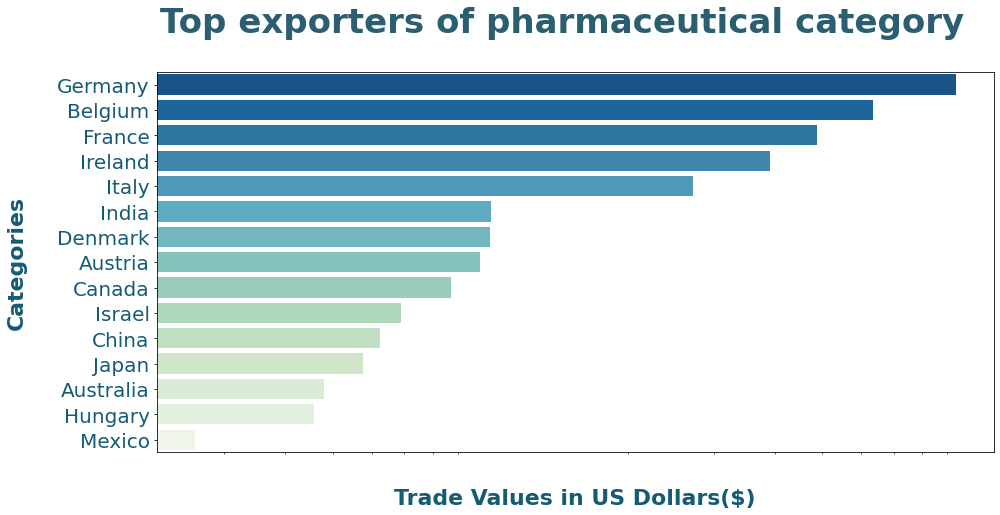

In [53]:
plt.subplots(figsize=(15,7))
sns.barplot(data=pharma_ex, x='trade_usd', y='country', palette='GnBu_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top exporters of pharmaceutical category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

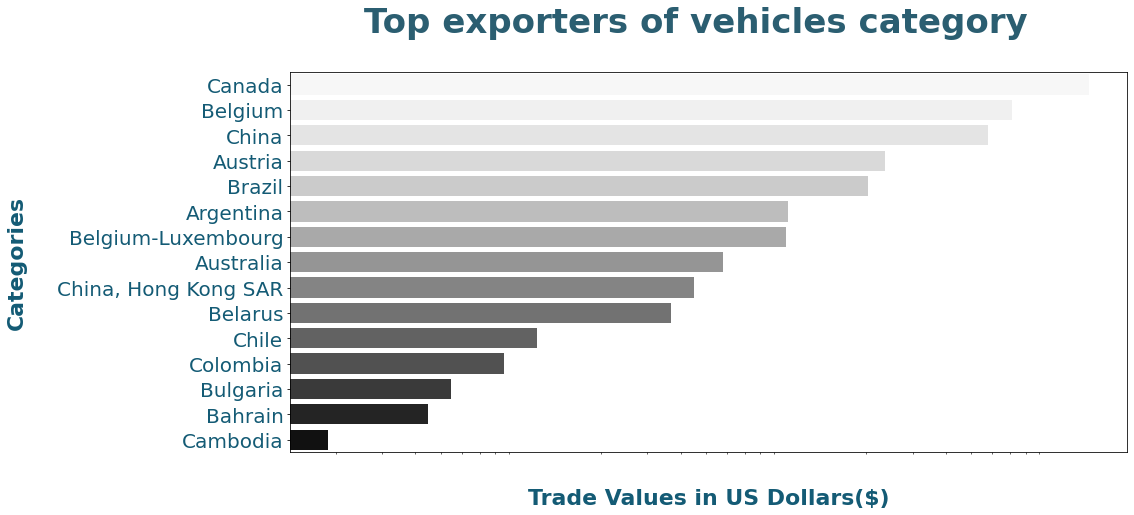

In [54]:
plt.subplots(figsize=(15,7))
sns.barplot(data=vhcl_ex, x='trade_usd', y='country', palette='Greys')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top exporters of vehicles category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

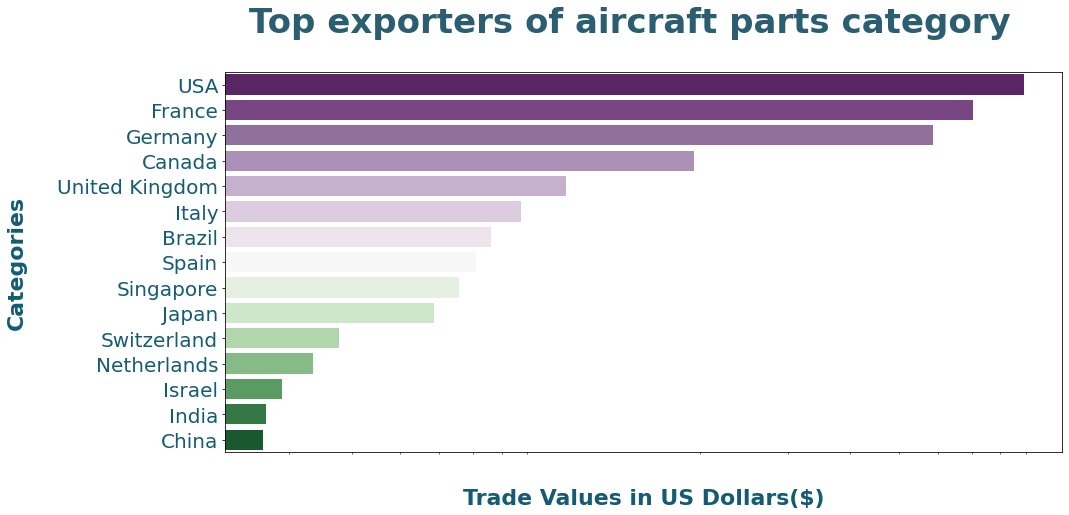

In [55]:
plt.subplots(figsize=(15,7))
sns.barplot(data=airprt_ex, x='trade_usd', y='country', palette='PRGn')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top exporters of aircraft parts category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

### *Now you can see that, right? Top exporters are not top exporters anymore! Also if we draw the table for the top exporters you can see that the quantity or weight is so different.<br>
We will plug a table only for the petroleum category just for an example, and show what I mean about the difference:*


In [56]:
oil_ex

country                                         category    flow  \
8359       Canada  27_mineral_fuels_oils_distillation_products_etc  Export   
467       Algeria  27_mineral_fuels_oils_distillation_products_etc  Export   
2369    Australia  27_mineral_fuels_oils_distillation_products_etc  Export   
20256      Kuwait  27_mineral_fuels_oils_distillation_products_etc  Export   
18490   Indonesia  27_mineral_fuels_oils_distillation_products_etc  Export   
22891      Mexico  27_mineral_fuels_oils_distillation_products_etc  Export   
19845  Kazakhstan  27_mineral_fuels_oils_distillation_products_etc  Export   
4424      Belgium  27_mineral_fuels_oils_distillation_products_etc  Export   
21855    Malaysia  27_mineral_fuels_oils_distillation_products_etc  Export   
18774        Iraq  27_mineral_fuels_oils_distillation_products_etc  Export   
18314       India  27_mineral_fuels_oils_distillation_products_etc  Export   
16171     Germany  27_mineral_fuels_oils_distillation_products_etc  Export   
18659        Iran  27_mineral_fuels_oils_distillation_products_etc  Export   
882        Angola  27_mineral_fuels_oils_distillation_products_etc  Export   
9201        China  27_mineral_fuels_oils_distillation_products_etc  Export   

        trade_usd     weight_kg      quantity  
8359   1532682.87  3.652186e+12  6.817445e+14  
467     862249.33  2.350760e+12  2.396695e+12  
2369    800788.75  7.079320e+12  7.094962e+12  
20256   741563.42  1.198338e+12  1.198338e+12  
18490   703070.57  5.952843e+12  6.022978e+12  
22891   575123.59  1.528599e+12  1.554229e+12  
19845   539551.22  1.642975e+12  1.643746e+12  
4424    538189.83  1.183221e+12  1.183512e+12  
21855   515179.40  1.347998e+12  1.399725e+12  
18774   496496.75  6.861029e+11  6.861029e+11  
18314   469645.45  7.316659e+11  7.316721e+11  
16171   452635.39  1.018660e+12  1.020612e+12  
18659   425197.86  1.365099e+12  1.420969e+12  
882     424893.47  7.968215e+11  7.968215e+11  
9201    412668.99  1.929857e+12  1.953323e+12

Here as we plotted before, we can see the top exporters of the petroleum category. This ranking is based on the trading value, but if you look at the weight or quantity column you can obviously see that for example Australia sold way more products than Canada, but still is in third place.<br>
China isn't even close to the top 10 and also in the other categories we can see the rankings are so different from each other, which will tell us that a country's rank in trading is not defined by an specific category or material; at least not in the top exporters of top importers. A mixture of trading activities is involved to make a country economically powerful and place them in the top rankings. 
So as I said before, for revealing some information about any complex field, we first need to improve our knowledge about that particular subject. For example, the price variation of petroleum depends on so many factors, such as type, quality, geographical points, logistics, market tensions, and so on.
So now let us jump into the next question.</div>


# What are the most imported products?</div>


### *he question here is: is it the most imported categories have the same ranking as the most exported ones? If yes, what countries are the most importers of those that are in the top 3 of the ranking?*
### *We already ranked the top imported categories, scaled by their values, weight, or quantities; but as I mentioned for other questions, we will only analyze our question by trade values, so in the end, we could have a unique conclusion.*
### *As a reminder, we will plot the top 10 imported commodities, and then will continue our analysis.*


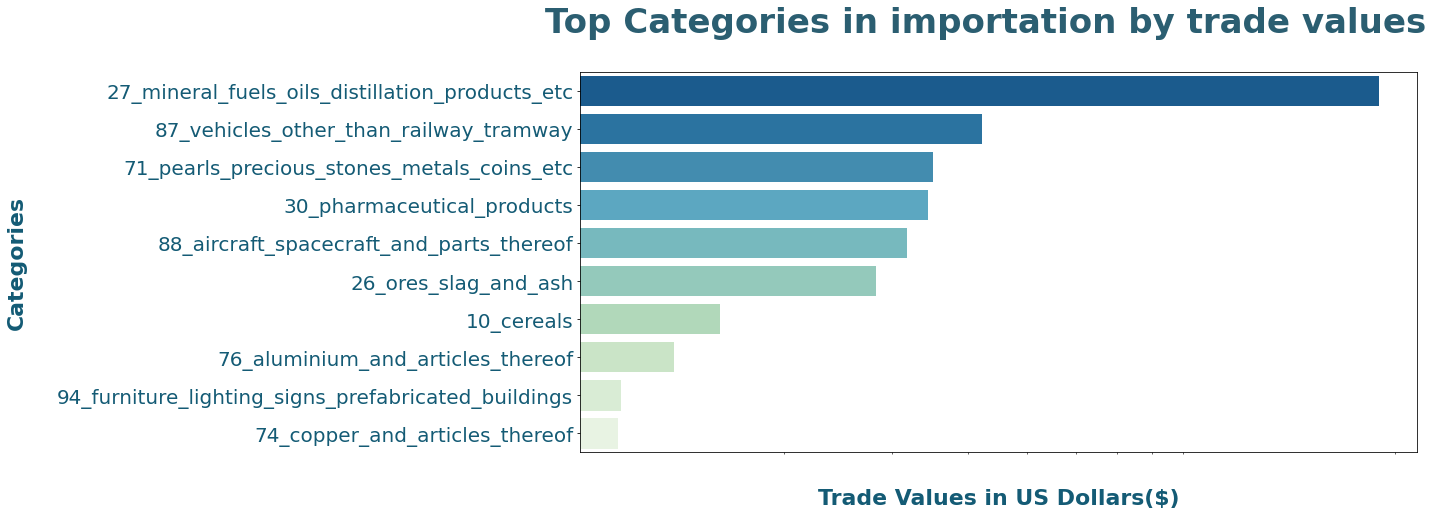

In [57]:
plt.subplots(figsize=(15,7))
sns.barplot(data=top5ctg_imp, x='trade_usd', y='category', palette='GnBu_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top Categories in importation by trade values",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

### *As we can see the petroleum category is still at the high top with a lot of distance from the rest of the categories. Vehicles are the highest demand and traded value after petroleum, and the rest are almost in the same order besides copper and articles which are in the 10th place.*
### *Now we want to know who imported the top 5 categories at most.*


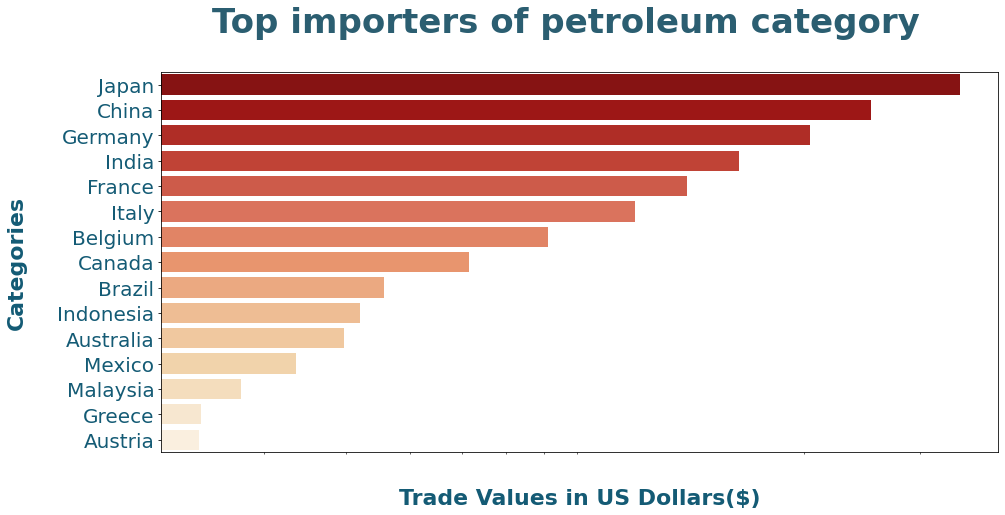

In [58]:
topcv_allims=topc_im.sort_values(by='trade_usd', ascending=False)
oil_im=topcv_allims[topcv_allims['category'] == '27_mineral_fuels_oils_distillation_products_etc'].head(15)
pearl_im=topcv_allims[topcv_allims['category'] == '71_pearls_precious_stones_metals_coins_etc'].head(15)
pharma_im=topcv_allims[topcv_allims['category'] == '30_pharmaceutical_products'].head(15)
vhcl_im=topcv_allims[topcv_allims['category'] == '87_vehicles_other_than_railway_tramway'].head(15)
airprt_im=topcv_allims[topcv_allims['category'] == '88_aircraft_spacecraft_and_parts_thereof'].head(15)


plt.subplots(figsize=(15,7))
sns.barplot(data=oil_im, x='trade_usd', y='country', palette='OrRd_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top importers of petroleum category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

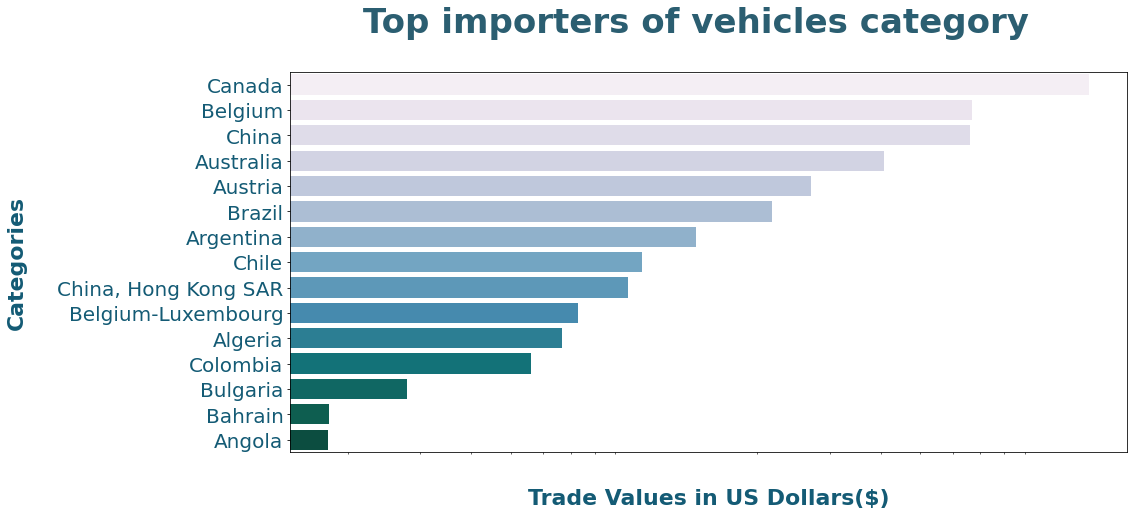

In [59]:
plt.subplots(figsize=(15,7))
sns.barplot(data=vhcl_im, x='trade_usd', y='country', palette='PuBuGn')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top importers of vehicles category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

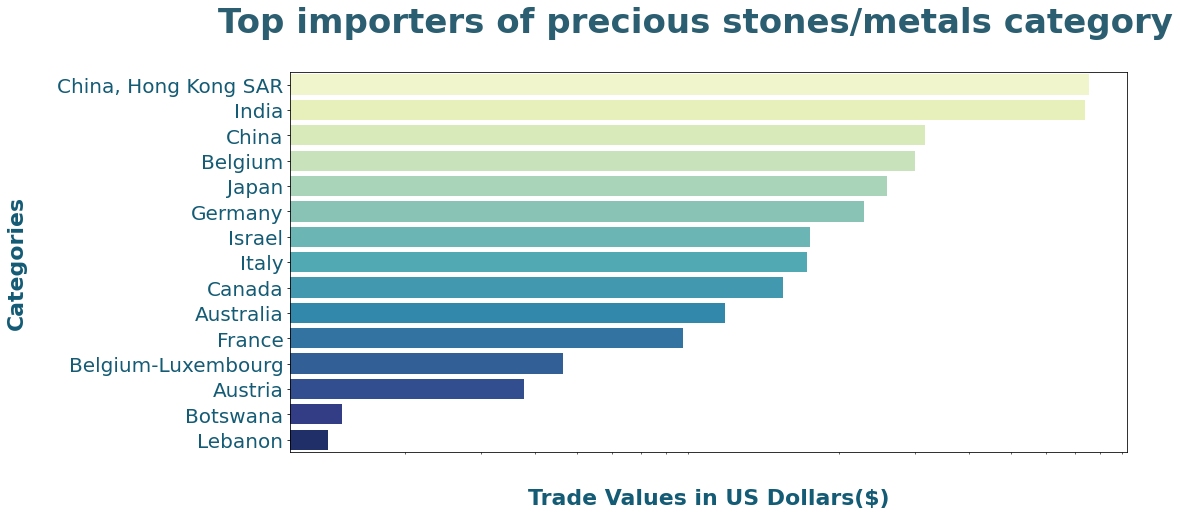

In [60]:
plt.subplots(figsize=(15,7))
sns.barplot(data=pearl_im, x='trade_usd', y='country', palette='YlGnBu')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top importers of precious stones/metals category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

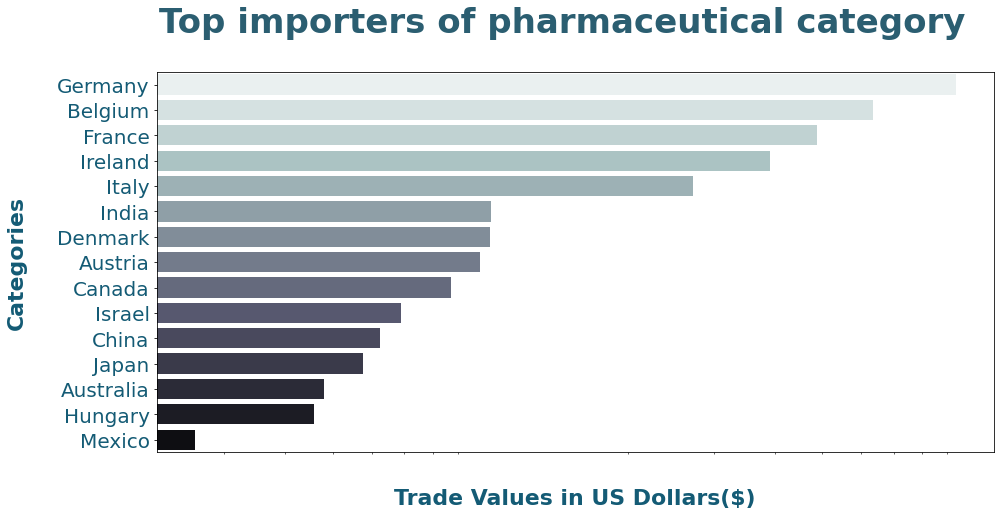

In [61]:
plt.subplots(figsize=(15,7))
sns.barplot(data=pharma_ex, x='trade_usd', y='country', palette='bone_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top importers of pharmaceutical category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

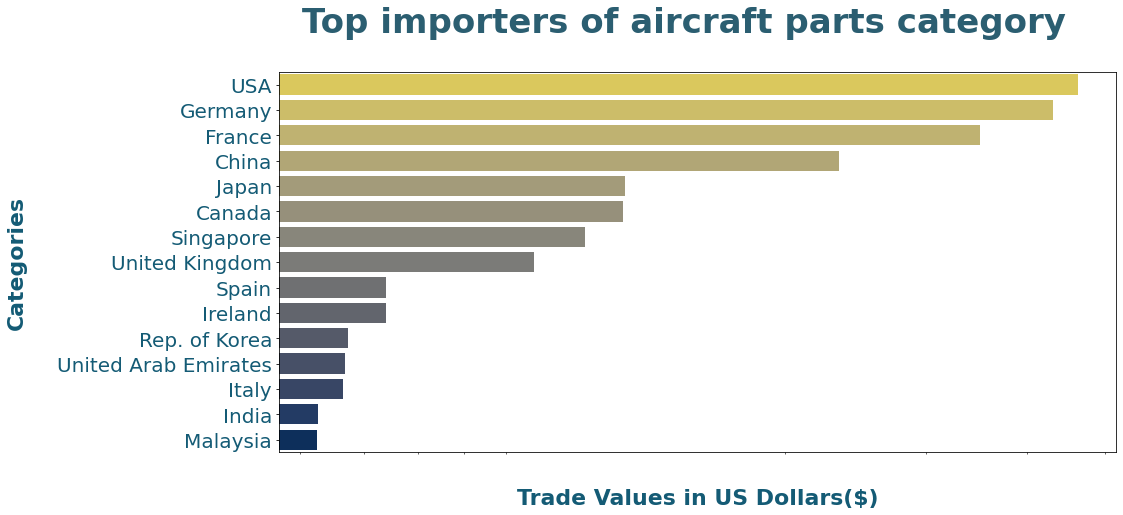

In [62]:
plt.subplots(figsize=(15,7))
sns.barplot(data=airprt_im, x='trade_usd', y='country', palette='cividis_r')
plt.xscale('log')
plt.yticks(rotation=0, color='#145B75', ticks=None,fontfamily='DejaVu Sans', fontsize=20)
plt.xticks([])

plt.xlabel('Trade Values in US Dollars($)', 
           fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Categories',
          fontsize=22,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Top importers of aircraft parts category",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.01,
    color='#2B5E71')

plt.show()

### *Again we gained such wonderful results from these graphs. for example, did you know that the US is both the top exporter and the top importer of aircraft parts? And that Belgium is one of the top exporters and also importers of petroleum? Or who would imagine that Botswana is one of the top importers of precious stones/metals in the world?*
### *After knowing such a piece of good information, we will proceed to the next question.*


# Which products are the most exported products by the top 3 exporters?</div>


### *This particular question was asked by so many people from some of my friends who were wondering, which countries are the top exporters of all time and what products they are exporting at most. So now I'm going to answer this question in the simplest way possible.*
### *We already identified the top exporters in all segments and of all time (recorded in UN), Now we will list the top three exporters by trade values, and observe the top products they sold at most. As a reminder let's see the top 10 countries in a plot.*


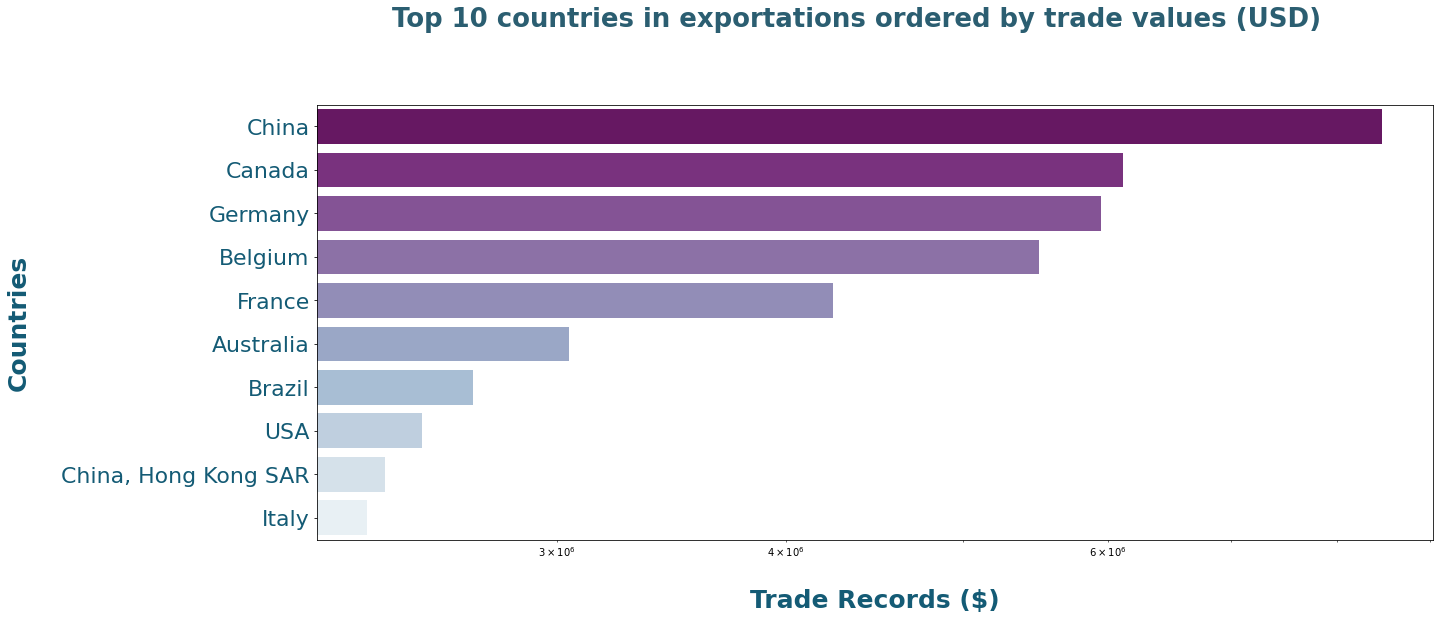

In [63]:
top10_ex=ctf_ex.sort_values(by='trade_usd', ascending=False).head(10)

plt.subplots(figsize=(20, 8))
sns.barplot(data=top10_ex, x='trade_usd', y='country', palette='BuPu_r')
plt.yticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=22)
plt.xscale('log')
plt.xticks([])

plt.ylabel('Countries', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.xlabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top 10 countries in exportations ordered by trade values (USD)",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

### *I should mention that I will choose the top 3 countries because this study won't be too long and boring to study for the public eyes.*
### *So as we can see the top three are China, Canada, and Germany. Now let's see what specific commodity line they mostly exported that made them the top exporters of all time.*


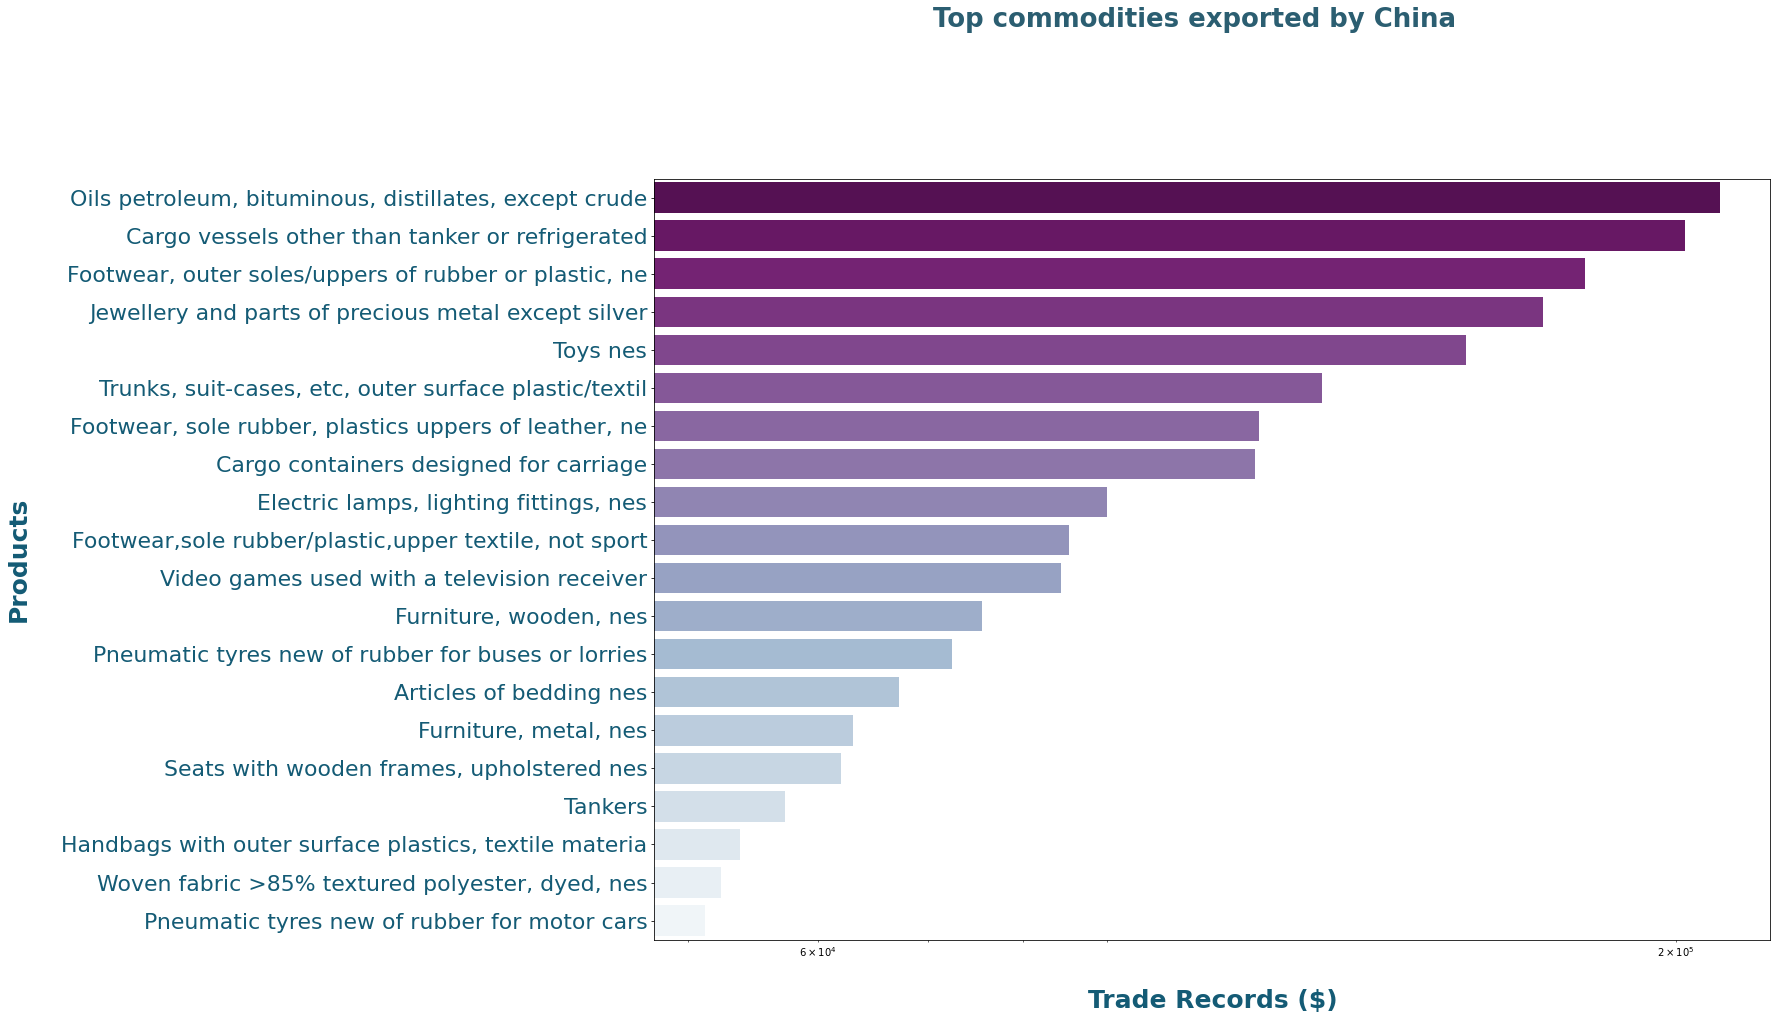

In [64]:
selctg=df.groupby(['country','category','commodity','flow'], as_index=False).sum()
exporters=selctg[(selctg['flow']=='Export')].sort_values(by='trade_usd', ascending=False)
china_top=exporters[exporters['country'] == 'China'].head(20)
canada_top=exporters[exporters['country'] == 'Canada'].head(20)
germany_top=exporters[exporters['country'] == 'Germany'].head(20)


plt.subplots(figsize=(20, 14))
sns.barplot(data=china_top, x='trade_usd', y='commodity', palette='BuPu_r')
plt.yticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=22)
plt.xscale('log')
plt.xticks([])

plt.ylabel('Products', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.xlabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top commodities exported by China",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

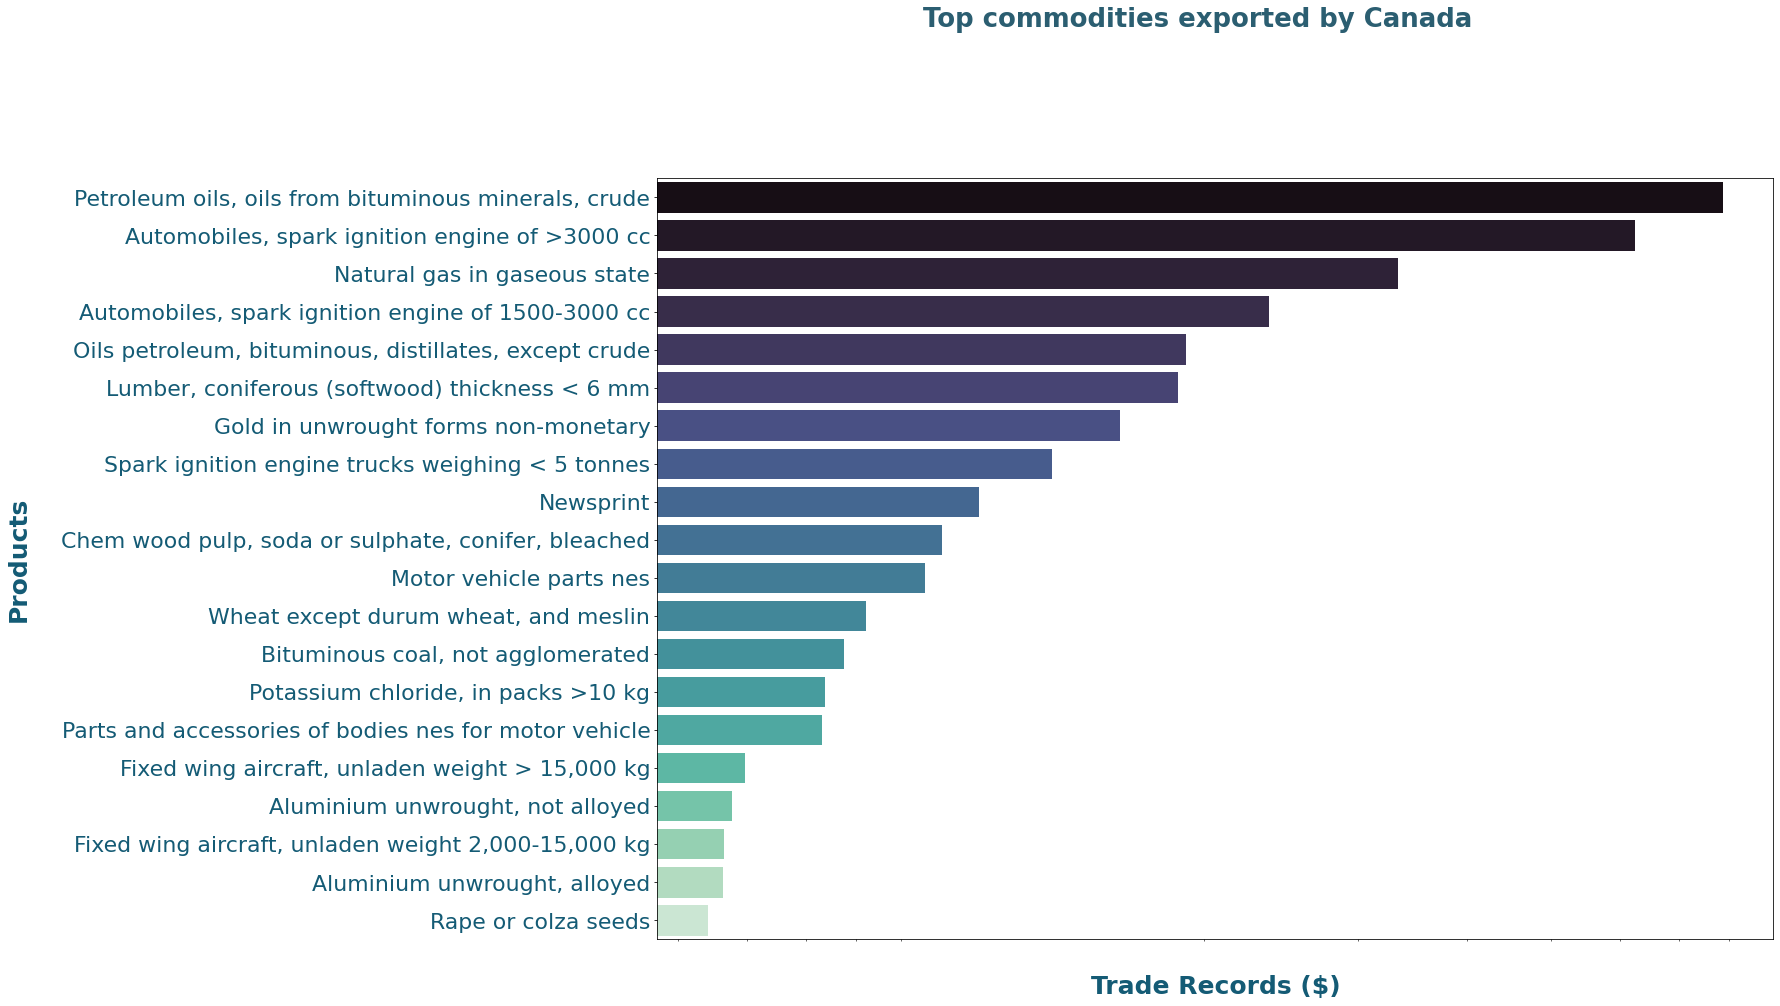

In [65]:
plt.subplots(figsize=(20, 14))
sns.barplot(data=canada_top, x='trade_usd', y='commodity', palette='mako')
plt.yticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=22)
plt.xscale('log')
plt.xticks([])

plt.ylabel('Products', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.xlabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top commodities exported by Canada",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

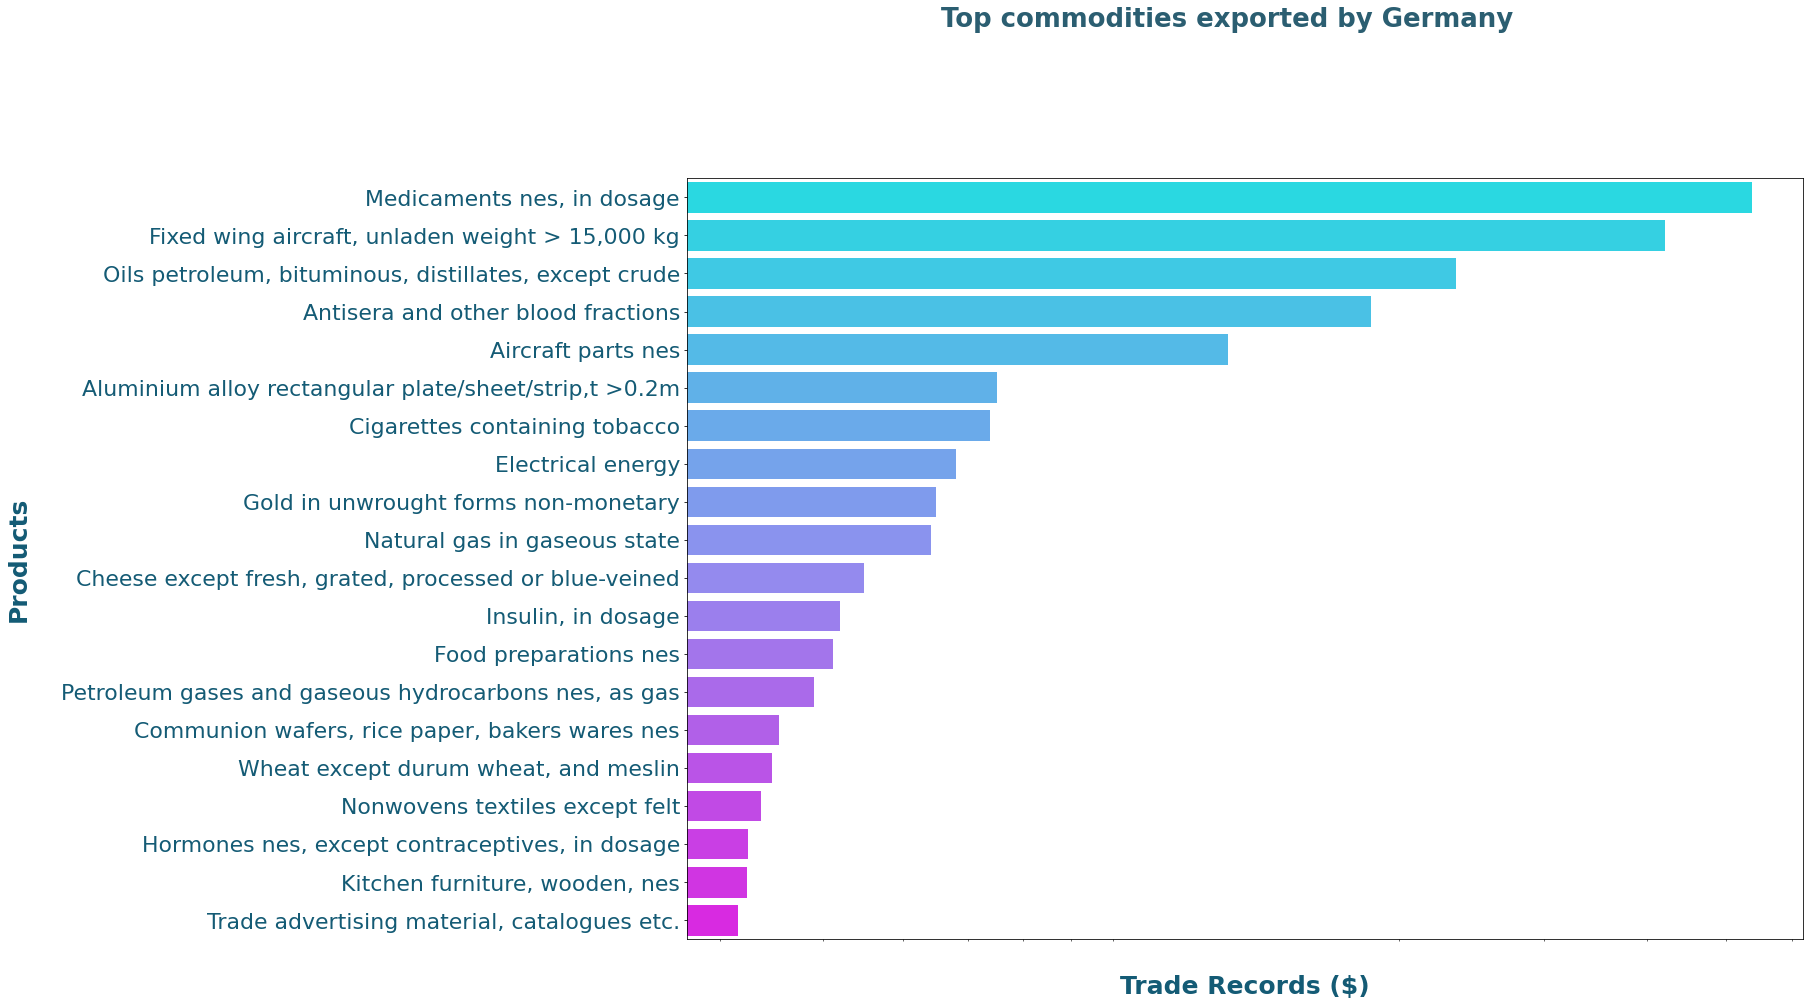

In [66]:
plt.subplots(figsize=(20, 14))
sns.barplot(data=germany_top, x='trade_usd', y='commodity', palette='cool')
plt.yticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=22)
plt.xscale('log')
plt.xticks([])

plt.ylabel('Products', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.xlabel('Trade Records ($)',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top commodities exported by Germany",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

### *Every single plot is interesting by itself since it says how different those countries are in the trading fields, however they are close in the outcomes. Now we could jump into our next question.*

# Which year has the most and the least trading flows?

### *There are a couple of simple ways to answer this question, but we will choose two. First, we will see the numerical result in a tabular shape, and then we will see the trend in a graph.*

In [67]:
yrmnx=df.groupby(['year'], as_index=False).sum()
yr_mx=yrmnx.sort_values(by='trade_usd', ascending=False).head(1)
yr_mn=yrmnx.sort_values(by='trade_usd', ascending=True).head(1)
yr_wmx=yrmnx.sort_values(by='weight_kg', ascending=False).head(1)
yr_wmn=yrmnx.sort_values(by='weight_kg', ascending=True).head(1)
yrmnxs=yr_mx.merge(yr_mn, how = 'outer' ,indicator=False)
yr_wmnx=yr_wmx.merge(yr_wmn, how = 'outer' ,indicator=False)
yrmnxs

year    trade_usd     weight_kg      quantity
0 2013-01-01  11773331.88  1.611972e+13  1.779320e+13
1 1988-01-01    431791.99  1.448208e+12  1.651939e+12

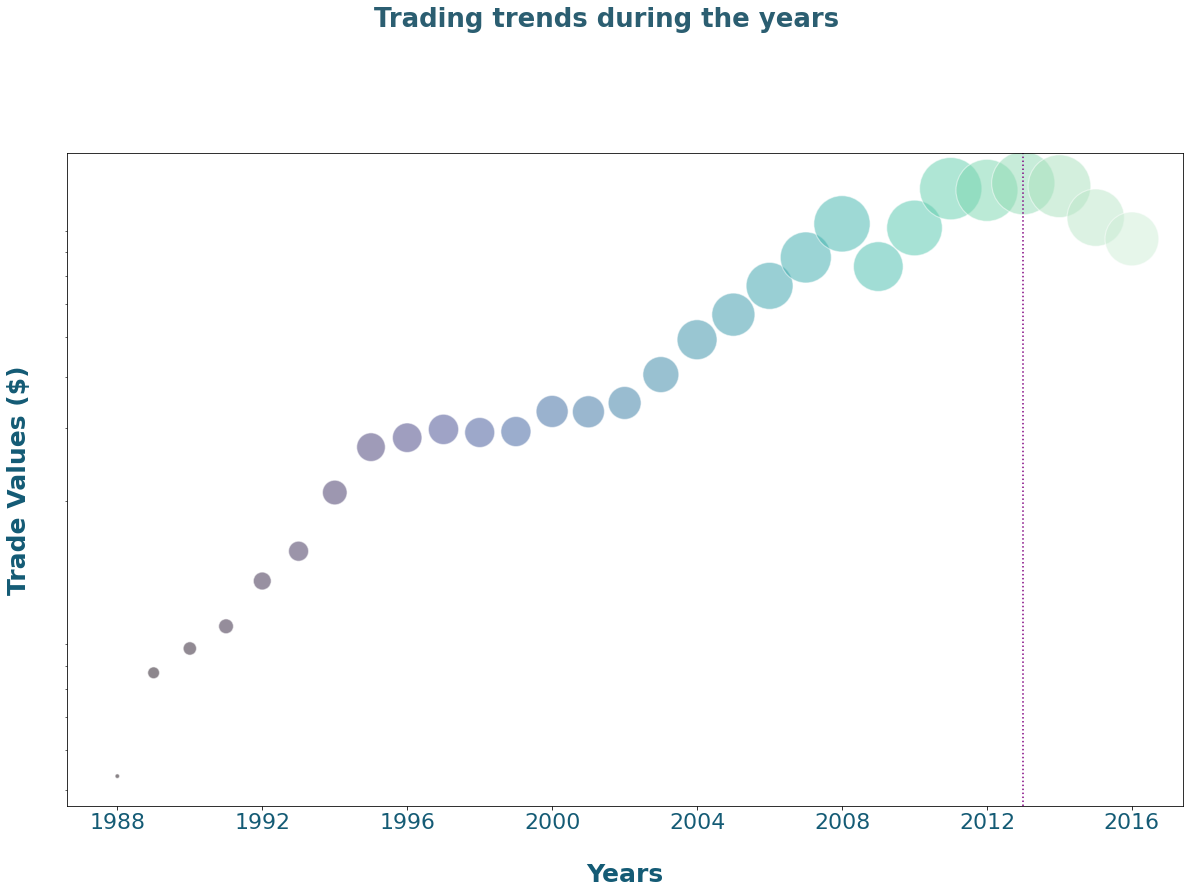

In [68]:
plt.subplots(figsize=(20, 12))
sns.scatterplot(data=yrmnx, x="year", y="trade_usd", size="trade_usd", 
                alpha=0.5, sizes=(20, 4000), palette='mako', hue='year')
plt.xticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=22)
plt.yscale('log')
plt.yticks([])

plt.axvline(pd.Timestamp('2013, 01 ,01'), color='purple', linestyle=':', label='max')


plt.ylabel('Trade Values ($)', 
           fontsize=25,
          fontweight='bold',
           labelpad=30,
          color='#145B75', fontfamily='DejaVu Sans')
plt.xlabel('Years',
          fontsize=25,
           fontfamily='DejaVu Sans',
           labelpad=30,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Trading trends during the years",
    fontsize=26,
    fontfamily='DejaVu Sans',
    fontweight='bold',
    ha="center",
    y=1.05,
    color='#2B5E71')
plt.legend('', frameon=False)
plt.show()

### *This is telling us that 1988 and 2013 were the min and max of the trade values, but we can understand that this is not the case, since the minimum value is determined by the beginning of the recorded data in the dataset and there are probably more dates in history with lower values.*
### *But for now, let us consider that we need to consider only the interval of this dataset, then can we say the same thing about the years considering the quantities and weights?*

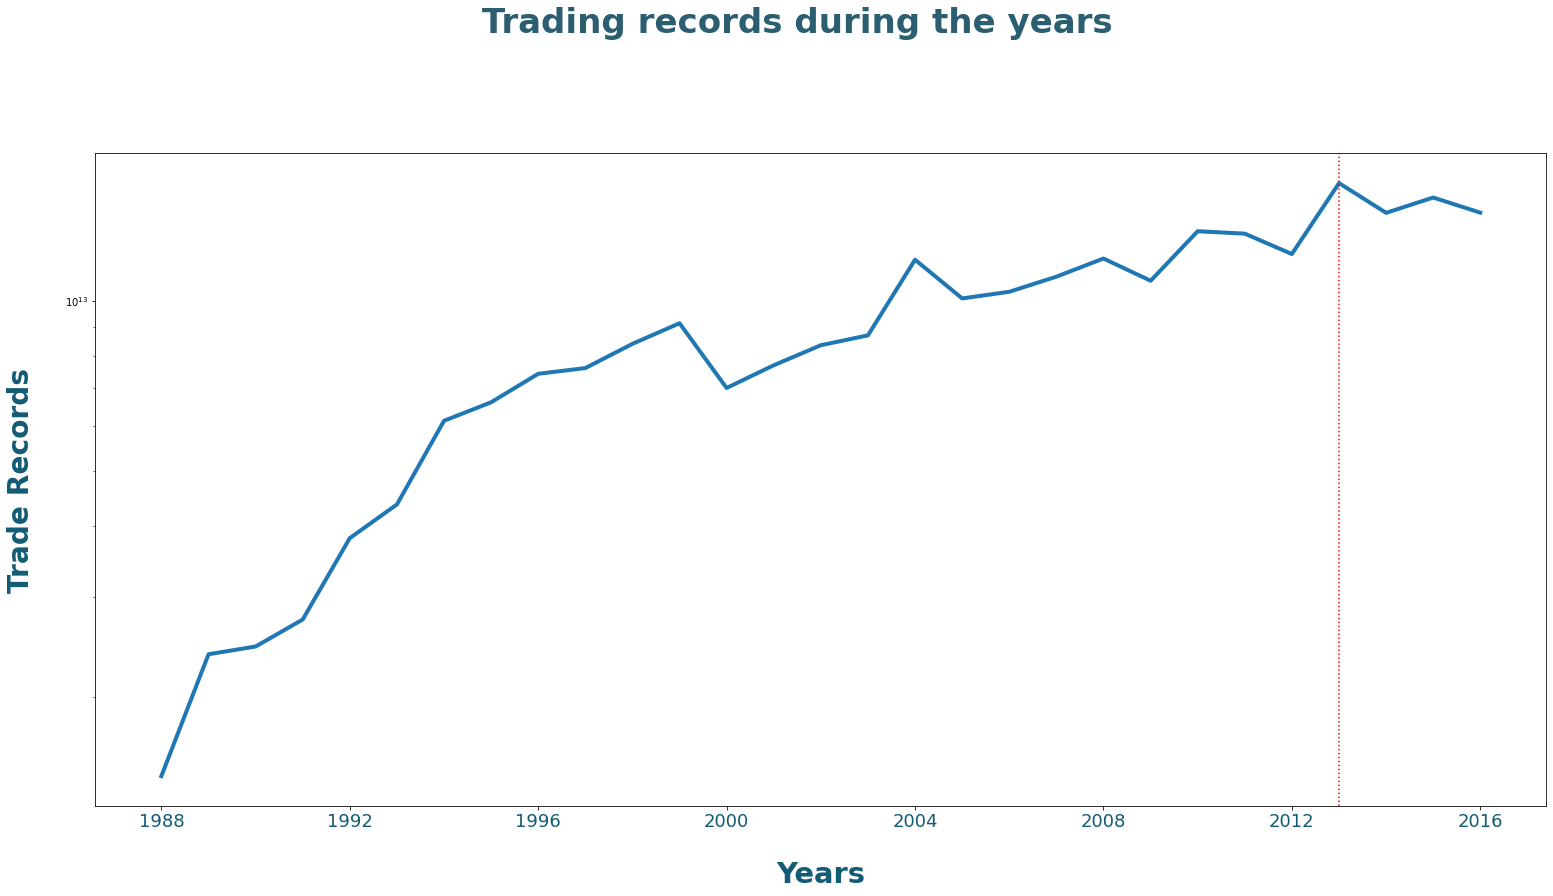

In [69]:
plt.subplots(figsize=(26, 12))
sns.lineplot(data=yrmnx, x='year', y='weight_kg',linewidth=4, palette='mako')
plt.xticks(rotation=0, color='#145B75', ticks=None, fontfamily='DejaVu Sans', fontsize=18)
plt.yticks([])
plt.yscale('log')

plt.axvline(pd.Timestamp('2013, 01 ,01'), color='red', linestyle=':', label='max')

plt.xlabel('Years', 
           fontsize=29,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=28,
           fontfamily='DejaVu Sans',
          fontweight='bold',
           labelpad=30,
          color='#145B75')

plt.suptitle(
    "Trading records during the years",
    fontsize=34,
    fontweight='bold',
    fontfamily='DejaVu Sans',
    ha="center",
    y=1.05,
    color='#2B5E71')

plt.show()

In [70]:
yr_wmnx

year    trade_usd     weight_kg      quantity
0 2013-01-01  11773331.88  1.611972e+13  1.779320e+13
1 1988-01-01    431791.99  1.448208e+12  1.651939e+12

### *So yes, the inflation and other pricing factors didn't affect the trend that much to change the min and max points in 1988 and 2013.*

# Conclusion</div>

### *Where does someone want to go with this study?  Well, it completely depends on every single person and what they want to learn and what exactly is their objective of looking for specific information.*
### *This dataset however contains so much data about global trading movements, but it has its own limitations such as historical limits and updates. Later in another notebook, I will use the world bank dataset which is more specific and has a wider historical range. I will update the project link in this notebook and will investigate more specific problems in it with dedicated data for that subject.*

### *For this project we observed so many factors and presented them in the most simple and practical manner, we learned how different would be expressing economical situations with the scale we can use.*
### *We also saw countries rank in the global trading trends and the most traded products and categories scaled by values, weight and their quantities.*

# Global economic growth and trading trends

### *Now we want to know what is the effect of global economic growth on trading trends. But first, we need to learn how we can define economic growth.*
### *Growth in an economy is measured by the change in the volume of its output or in the real expenditure or income of its residents. The 2008 <a href="https://unstats.un.org/unsd/nationalaccount/sna.asp">System of National Accounts</a> offers three approaches for estimating GDP: a production approach to finding gross value added; an expenditure approach; and an income approach (no data in the WDI database use the income approach). In theory, all should give the same estimate.*

# What are the basic indicators of economic activity?</div>



Measuring economic activity in a country or region provides insights into the economic well-being of its residents.
<b>Gross Domestic Product (GDP)</b>, a widely used indicator, refers to the total gross value added by all resident producers in the economy. Growth in the economy is measured by the change in GDP at a constant price. Many WDI indicators use GDP or GDP per capita as a denominator to enable cross-country comparisons of socioeconomic and other data.<br>

Also widely used in assessing a country’s wealth and capacity to provide for its people is  <b>Gross National Income (GNI) per capita</b> - the sum of total domestic and foreign value added by residents divided by the total population. Furthermore, GNI per capita is normally in U.S. dollars, converted from local currency using the Atlas method, is used to classify countries for operational purposes - lending eligibility and repayment terms. It is also used to classify economies into four main income groups for analytical purposes: low-income, lower-middle-income, upper-middle-income, and high-income. Further information on the operational and analytical classifications is available here.<br>

GNI per capita data are published every year in July for the previous year—data for 2017 will be published during the July 2018 update of the World Development Indicators (WDI) database in World Bank which is the primary World Bank collection of development indicators, compiled from officially recognized international sources.<br>
However, some national data do not become available until later in the year.
Major updates for national accounts data occur every July and December.

</div>

# Prices and Terms of Trade effects



### *Price inflation is the average rise in the price of goods and services within an economy. A commonly used measure of inflation is the consumer price index, which measures the prices of a representative basket of goods and services purchased by a typical household. Data on prices are collected at periodic intervals and appropriate weights are derived from household expenditure surveys. The Laspeyres formula<sup>[16]</sup> for calculating price indices is generally used which measures the basket of goods at current prices using base year quantities.*

### *Other price indices include the export price index which interprets the change in prices received by exporters, and the import price index which shows the change in prices paid by the importers. The terms of trade index measure the relative prices of a country’s exports and imports.*

# Labor Productivity

### *Labor productivity assesses a country's economic ability to create and sustain decent employment opportunities with fair and equitable remuneration. Productivity increases obtained through investment, trade, technological progress, or changes in work organization can increase social protection and reduce poverty, which in turn minimize vulnerable employment (contributing family workers and own-account workers) and working poverty.*
### *Productivity increases do not guarantee these improvements, but without them—and the economic growth they bring—improvements are highly unlikely.*